# Treamid - AlphaFold

## Filter Data

Seperating `summary_new.csv` file to different `Recursion Step Done`!

In [1]:
import pandas as pd

def merge_data(tsv_file_path, csv_file_path, output_file_path):
    # Load the TSV file
    tsv_data = pd.read_csv(tsv_file_path, sep='\t')  # Ensure that the separator matches your TSV file structure

    # Load the CSV file
    csv_data = pd.read_csv(csv_file_path)

    # Merge the two dataframes on the 'af_id' column from the TSV and 'Protein ID' column from the CSV
    merged_data = pd.merge(tsv_data, csv_data, left_on='af_id', right_on='Protein ID')

    # Save the merged data to a new CSV file
    merged_data.to_csv(output_file_path, index=False)

    print(f"Merged data saved to: {output_file_path}")


# File paths
tsv_file_path = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/table-af_id-gene_name.tsv'
csv_file_path = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/summary_new.csv'
output_file_path = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/summary_with_gene_id.csv'

# Calling the function to perform the merge
merge_data(tsv_file_path, csv_file_path, output_file_path)


Merged data saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/summary_with_gene_id.csv


In [2]:
import pandas as pd

def merge_data(file1_path, file2_path, output_file_path):
    # Load the first CSV file
    data1 = pd.read_csv(file1_path)

    # Check and preprocess 'gene_name' in the first data file
    if 'gene_name' not in data1.columns:
        print("Warning: 'gene_name' column not found in the first file.")
    else:
        data1['gene_name'] = data1['gene_name'].astype(str).str.strip().str.lower()

    # Load the second CSV file
    data2 = pd.read_csv(file2_path)

    # Check and preprocess 'GeneID' in the second data file
    if 'GeneID' not in data2.columns:
        print("Warning: 'GeneID' column not found in the second file.")
    else:
        data2['GeneID'] = data2['GeneID'].astype(str).str.strip().str.lower()

    # Proceed with merging only if both columns are found
    if 'gene_name' in data1.columns and 'GeneID' in data2.columns:
        # Merge the two dataframes on the 'interpro_id' from data1 and 'GeneID' from data2
        merged_data = pd.merge(data1, data2, left_on='gene_name', right_on='GeneID')

        # Check if the merge produced any results
        if merged_data.empty:
            print("No matching data found to merge.")
        else:
            # Save the merged data to a new CSV file
            merged_data.to_csv(output_file_path, index=False)
            print(f"Merged data saved to: {output_file_path}")
    else:
        print("Skipping merge due to missing columns.")

# File paths
file1_path = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/summary_with_gene_id.csv'
file2_path = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/20240312_LiP_compound_AllPeptideR2_forVedrane.csv'
output_file_path = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/summary_gene_id_lip_ms.csv'

# Calling the function to perform the merge
merge_data(file1_path, file2_path, output_file_path)


Merged data saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/summary_gene_id_lip_ms.csv


In [3]:
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Function to filter the CSV file
def filter_csv(input_file_path, output_file_path, recursion_step='1/5'):
    """
    Filters rows in a CSV file where 'Recursion Step Done' equals a specific value.

    Parameters:
    - input_file_path: Path to the input CSV file.
    - output_file_path: Path where the filtered CSV file will be saved.
    - recursion_step: The recursion step value to filter by (default is '1/5').
    """
    # Load the CSV file
    data = pd.read_csv(input_file_path)

    # Filter the dataframe
    filtered_data = data[
        (data['Recursion Step Done'] == recursion_step) &
        (data['Binding Affinity (kcal/mol)'] < 20) &
        (data['Number of clashes'] < 20) &
        (data['Strain Energy'] < 20) &
        (data['Confidence Score'] > -10) &
        (data['correlation index'] >= 0.6)
    ]

    # Save the filtered data to a new CSV file
    filtered_data.to_csv(output_file_path, index=False)
    print(f"Filtered data for recursion step {recursion_step} saved to: {output_file_path}")


In [4]:
# Base directory and filename patterns
base_dir = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/'
input_filename = 'summary_gene_id_lip_ms.csv'
output_filename_pattern = 'filtered_summary_gene_id_lip_ms_rec_{}.csv'

# Full input file path
input_file_path = base_dir + input_filename

# Loop over the recursion steps
for step in range(1, 6):
    recursion_step = f'{step}/5'
    output_file_path = base_dir + output_filename_pattern.format(step)
    filter_csv(input_file_path, output_file_path, recursion_step=recursion_step)


Filtered data for recursion step 1/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/filtered_summary_gene_id_lip_ms_rec_1.csv
Filtered data for recursion step 2/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/filtered_summary_gene_id_lip_ms_rec_2.csv
Filtered data for recursion step 3/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/filtered_summary_gene_id_lip_ms_rec_3.csv
Filtered data for recursion step 4/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/filtered_summary_gene_id_lip_ms_rec_4.csv
Filtered data for recursion step 5/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/filtered_summary_gene_id_lip_ms_rec_5.csv


## Read Each Seperated Files

In [5]:
# Loop over the recursion steps and read each file
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}' 
    data = pd.read_csv(file_path) 
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    print(f'First few rows of the dataframe for recursion step {step}/5:')
    display(data.head()) 
    

Total number of data points for recursion step 1/5: 373
First few rows of the dataframe for recursion step 1/5:


gene_name interpro_id                  af_id             Protein ID  \
0      gart      P22102  AF-P22102-F1-model_v3  AF-P22102-F1-model_v3   
1      tjp1      Q07157  AF-Q07157-F1-model_v3  AF-Q07157-F1-model_v3   
2      tjp1      Q07157  AF-Q07157-F1-model_v3  AF-Q07157-F1-model_v3   
3     wdr81      Q562E7  AF-Q562E7-F1-model_v3  AF-Q562E7-F1-model_v3   
4    cep170      Q5SW79  AF-Q5SW79-F1-model_v3  AF-Q5SW79-F1-model_v3   

  Recursion Step Done  Ligand Description  Binding Affinity (kcal/mol)  \
0                 1/5                 NaN                    -6.138487   
1                 1/5                 NaN                    -5.108705   
2                 1/5                 NaN                    -5.108705   
3                 1/5                 NaN                    -0.341801   
4                 1/5                 NaN                    -1.603826   

   Number of clashes  Strain Energy  Confidence Score  ...  GeneID  \
0                  5       7.357311             -0.83  ...    gart   
1                 13       8.237501             -1.25  ...    tjp1   
2                 13       8.237501             -1.25  ...    tjp1   
3                 17       6.496763             -1.98  ...   wdr81   
4                  2       7.562231             -2.36  ...  cep170   

                                 Protein description  Protein name  \
0  Trifunctional purine biosynthetic protein aden...    PUR2_HUMAN   
1                        Tight junction protein ZO-1     ZO1_HUMAN   
2                        Tight junction protein ZO-1     ZO1_HUMAN   
3                    WD repeat-containing protein 81   WDR81_HUMAN   
4                     Centrosomal protein of 170 kDa   CE170_HUMAN   

                               GO.Cellular.Component  \
0                      cytosol,extracellular exosome   
1  podosome,cytoplasm,cytosol,plasma membrane,cel...   
2  podosome,cytoplasm,cytosol,plasma membrane,cel...   
3  autophagosome membrane,mitochondrion,lysosomal...   
4  centrosome,centriole,spindle,cytosol,microtubu...   

                               GO.Molecular.Function  \
0  phosphoribosylamine-glycine ligase activity,ph...   
1  protein binding,calmodulin binding,cadherin bi...   
2  protein binding,calmodulin binding,cadherin bi...   
3  protein binding,phosphatidylinositol 3-kinase ...   
4                                    protein binding   

                               GO.Biological.Process  sequence coverage  \
0  brainstem development,'de novo' IMP biosynthet...             57.50%   
1  cell-cell junction assembly,hippo signaling,es...             43.70%   
2  cell-cell junction assembly,hippo signaling,es...             45.30%   
3  ubiquitin-dependent protein catabolic process,...             10.50%   
4                                                NaN             27.20%   

       Peptide sequence correlation index    EC50 (uM)  
0       _TVAPMPPAQDHKR_          0.667693  5658.594235  
1         _PEGVEQEIYFK_          0.710724  8409.992916  
2          _RVVDTLYNGK_          0.652197  2325.119991  
3  _QLAPAPGGTHVVALVPAR_          0.641973   184.918998  
4           _TAHREEIAR_          0.617450    33.526318  

[5 rows x 27 columns]

Total number of data points for recursion step 2/5: 52
First few rows of the dataframe for recursion step 2/5:


gene_name interpro_id                  af_id             Protein ID  \
0      gart      P22102  AF-P22102-F1-model_v3  AF-P22102-F1-model_v3   
1     psmc4      P43686  AF-P43686-F1-model_v3  AF-P43686-F1-model_v3   
2     actn4      O43707  AF-O43707-F1-model_v3  AF-O43707-F1-model_v3   
3      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
4      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   

  Recursion Step Done                                 Ligand Description  \
0                 2/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1                 2/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2                 2/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3                 2/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4                 2/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -6.709472                  1       8.155688   
1                    -4.532168                  7       5.945877   
2                    -5.072013                 14       7.119517   
3                    -5.739118                  8       8.009741   
4                    -5.739118                  8       8.009741   

   Confidence Score  ... GeneID  \
0             -0.66  ...   gart   
1             -1.23  ...  psmc4   
2             -1.32  ...  actn4   
3             -0.83  ...   ldha   
4             -0.83  ...   ldha   

                                 Protein description  Protein name  \
0  Trifunctional purine biosynthetic protein aden...    PUR2_HUMAN   
1               26S proteasome regulatory subunit 6B   PRS6B_HUMAN   
2                                    Alpha-actinin-4   ACTN4_HUMAN   
3  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
4  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   

                               GO.Cellular.Component  \
0                      cytosol,extracellular exosome   
1  proteasome complex,nucleus,nucleoplasm,cytosol...   
2  stress fiber,extracellular region,extracellula...   
3    nucleus,cytosol,membrane,extracellular exosome;   
4    nucleus,cytosol,membrane,extracellular exosome;   

                               GO.Molecular.Function  \
0  phosphoribosylamine-glycine ligase activity,ph...   
1  protein binding,ATP binding,ATPase activity,TB...   
2  RNA polymerase II regulatory region sequence-s...   
3  L-lactate dehydrogenase activity,protein bindi...   
4  L-lactate dehydrogenase activity,protein bindi...   

                               GO.Biological.Process  sequence coverage  \
0  brainstem development,'de novo' IMP biosynthet...             57.50%   
1  MAPK cascade,protein polyubiquitination,blasto...             82.10%   
2  response to hypoxia,platelet degranulation,pro...             84.30%   
3  response to hypoxia,lactate metabolic process,...          88%;88%-3   
4  response to hypoxia,lactate metabolic process,...          88%;88%-3   

                       Peptide sequence correlation index     EC50 (uM)  
0                       _TVAPMPPAQDHKR_          0.667693   5658.594235  
1                   _AQDEIPALSVSRPQTGL_          0.637536    944.351025  
2  _ELPPDQAEYC[Carbamidomethyl (C)]IAR_          0.756515  18296.573190  
3                           _KFIIPNVVK_          0.790959   1212.566989  
4                    _KDLADELALVDVIEDK_          0.623764    903.772487  

[5 rows x 27 columns]

Total number of data points for recursion step 3/5: 24
First few rows of the dataframe for recursion step 3/5:


gene_name interpro_id                  af_id             Protein ID  \
0      gart      P22102  AF-P22102-F1-model_v3  AF-P22102-F1-model_v3   
1     psmc4      P43686  AF-P43686-F1-model_v3  AF-P43686-F1-model_v3   
2      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
3      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
4    ahnak2      Q8IVF2  AF-Q8IVF2-F1-model_v3  AF-Q8IVF2-F1-model_v3   

  Recursion Step Done                                 Ligand Description  \
0                 3/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1                 3/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2                 3/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3                 3/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4                 3/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -6.852191                  4       7.804225   
1                    -3.893650                 10       5.320226   
2                    -4.882176                  4       5.883193   
3                    -4.882176                  4       5.883193   
4                    -4.192303                  5       7.226460   

   Confidence Score  ...  GeneID  \
0             -0.61  ...    gart   
1             -1.43  ...   psmc4   
2             -0.80  ...    ldha   
3             -0.80  ...    ldha   
4             -1.79  ...  ahnak2   

                                 Protein description  Protein name  \
0  Trifunctional purine biosynthetic protein aden...    PUR2_HUMAN   
1               26S proteasome regulatory subunit 6B   PRS6B_HUMAN   
2  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
3  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
4                                     Protein AHNAK2   AHNK2_HUMAN   

                               GO.Cellular.Component  \
0                      cytosol,extracellular exosome   
1  proteasome complex,nucleus,nucleoplasm,cytosol...   
2    nucleus,cytosol,membrane,extracellular exosome;   
3    nucleus,cytosol,membrane,extracellular exosome;   
4  nucleus,cytoplasm,cytosol,plasma membrane,Z di...   

                               GO.Molecular.Function  \
0  phosphoribosylamine-glycine ligase activity,ph...   
1  protein binding,ATP binding,ATPase activity,TB...   
2  L-lactate dehydrogenase activity,protein bindi...   
3  L-lactate dehydrogenase activity,protein bindi...   
4                        protein binding,RNA binding   

                               GO.Biological.Process  sequence coverage  \
0  brainstem development,'de novo' IMP biosynthet...             57.50%   
1  MAPK cascade,protein polyubiquitination,blasto...             82.10%   
2  response to hypoxia,lactate metabolic process,...          88%;88%-3   
3  response to hypoxia,lactate metabolic process,...          88%;88%-3   
4  plasma membrane repair,peripheral nervous syst...             47.80%   

            Peptide sequence correlation index    EC50 (uM)  
0            _TVAPMPPAQDHKR_          0.667693  5658.594235  
1        _AQDEIPALSVSRPQTGL_          0.637536   944.351025  
2                _KFIIPNVVK_          0.790959  1212.566989  
3         _KDLADELALVDVIEDK_          0.623764   903.772487  
4  _AESHSGPLNSMIPVSLGQVSFPK_          0.646105   158.000911  

[5 rows x 27 columns]

Total number of data points for recursion step 4/5: 13
First few rows of the dataframe for recursion step 4/5:


gene_name interpro_id                  af_id             Protein ID  \
0      gart      P22102  AF-P22102-F1-model_v3  AF-P22102-F1-model_v3   
1     psmc4      P43686  AF-P43686-F1-model_v3  AF-P43686-F1-model_v3   
2      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
3      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
4      blmh      Q13867  AF-Q13867-F1-model_v3  AF-Q13867-F1-model_v3   

  Recursion Step Done                                 Ligand Description  \
0                 4/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1                 4/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2                 4/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3                 4/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4                 4/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -5.712033                 13      13.327568   
1                    -3.339355                 14      11.440816   
2                    -6.571077                 12      10.095067   
3                    -6.571077                 12      10.095067   
4                    -4.807071                  0       4.670639   

   Confidence Score  ... GeneID  \
0             -0.33  ...   gart   
1             -1.12  ...  psmc4   
2             -1.08  ...   ldha   
3             -1.08  ...   ldha   
4             -1.11  ...   blmh   

                                 Protein description  Protein name  \
0  Trifunctional purine biosynthetic protein aden...    PUR2_HUMAN   
1               26S proteasome regulatory subunit 6B   PRS6B_HUMAN   
2  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
3  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
4                                Bleomycin hydrolase    BLMH_HUMAN   

                               GO.Cellular.Component  \
0                      cytosol,extracellular exosome   
1  proteasome complex,nucleus,nucleoplasm,cytosol...   
2    nucleus,cytosol,membrane,extracellular exosome;   
3    nucleus,cytosol,membrane,extracellular exosome;   
4    nucleus,cytoplasm,cytosol,extracellular exosome   

                               GO.Molecular.Function  \
0  phosphoribosylamine-glycine ligase activity,ph...   
1  protein binding,ATP binding,ATPase activity,TB...   
2  L-lactate dehydrogenase activity,protein bindi...   
3  L-lactate dehydrogenase activity,protein bindi...   
4  aminopeptidase activity,carboxypeptidase activ...   

                               GO.Biological.Process  sequence coverage  \
0  brainstem development,'de novo' IMP biosynthet...             57.50%   
1  MAPK cascade,protein polyubiquitination,blasto...             82.10%   
2  response to hypoxia,lactate metabolic process,...          88%;88%-3   
3  response to hypoxia,lactate metabolic process,...          88%;88%-3   
4  protein polyubiquitination,proteolysis,respons...             53.20%   

                      Peptide sequence correlation index    EC50 (uM)  
0                      _TVAPMPPAQDHKR_          0.667693  5658.594235  
1                  _AQDEIPALSVSRPQTGL_          0.637536   944.351025  
2                          _KFIIPNVVK_          0.790959  1212.566989  
3                   _KDLADELALVDVIEDK_          0.623764   903.772487  
4  _C[Carbamidomethyl (C)]FPESYTTEATR_          0.617063    19.238628  

[5 rows x 27 columns]

Total number of data points for recursion step 5/5: 7
First few rows of the dataframe for recursion step 5/5:


gene_name interpro_id                  af_id             Protein ID  \
0       ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
1       ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
2       blmh      Q13867  AF-Q13867-F1-model_v3  AF-Q13867-F1-model_v3   
3  gabarapl2      P60520  AF-P60520-F1-model_v3  AF-P60520-F1-model_v3   
4       pura      Q00577  AF-Q00577-F1-model_v3  AF-Q00577-F1-model_v3   

  Recursion Step Done                                 Ligand Description  \
0                 5/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1                 5/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2                 5/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3                 5/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4                 5/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -5.626810                  1       8.968754   
1                    -5.626810                  1       8.968754   
2                    -5.714722                  3       6.187218   
3                    -3.724941                  2       9.557886   
4                    -2.599394                  4       4.593292   

   Confidence Score  ...     GeneID  \
0             -0.71  ...       ldha   
1             -0.71  ...       ldha   
2             -1.29  ...       blmh   
3             -1.01  ...  gabarapl2   
4             -1.11  ...       pura   

                                 Protein description  Protein name  \
0  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
1  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
2                                Bleomycin hydrolase    BLMH_HUMAN   
3  Gamma-aminobutyric acid receptor-associated pr...   GBRL2_HUMAN   
4        Transcriptional activator protein Pur-alpha    PURA_HUMAN   

                               GO.Cellular.Component  \
0    nucleus,cytosol,membrane,extracellular exosome;   
1    nucleus,cytosol,membrane,extracellular exosome;   
2    nucleus,cytoplasm,cytosol,extracellular exosome   
3  Golgi membrane,autophagosome membrane,intracel...   
4  nuclear chromosome, telomeric region,nucleus,D...   

                               GO.Molecular.Function  \
0  L-lactate dehydrogenase activity,protein bindi...   
1  L-lactate dehydrogenase activity,protein bindi...   
2  aminopeptidase activity,carboxypeptidase activ...   
3  SNARE binding,protein binding,microtubule bind...   
4  translation repressor activity, nucleic acid b...   

                               GO.Biological.Process  sequence coverage  \
0  response to hypoxia,lactate metabolic process,...          88%;88%-3   
1  response to hypoxia,lactate metabolic process,...          88%;88%-3   
2  protein polyubiquitination,proteolysis,respons...             53.20%   
3  autophagosome assembly,mitophagy,intra-Golgi v...                47%   
4  DNA unwinding involved in DNA replication,DNA ...             51.20%   

                      Peptide sequence correlation index    EC50 (uM)  
0                          _KFIIPNVVK_          0.790959  1212.566989  
1                   _KDLADELALVDVIEDK_          0.623764   903.772487  
2  _C[Carbamidomethyl (C)]FPESYTTEATR_          0.617063    19.238628  
3                        _VSGSQIVDIDK_          0.753842  1274.128504  
4                            _RFYLDVK_          0.624731  1743.256482  

[5 rows x 27 columns]

## Data Distributions

Total number of data points for recursion step 1/5: 373


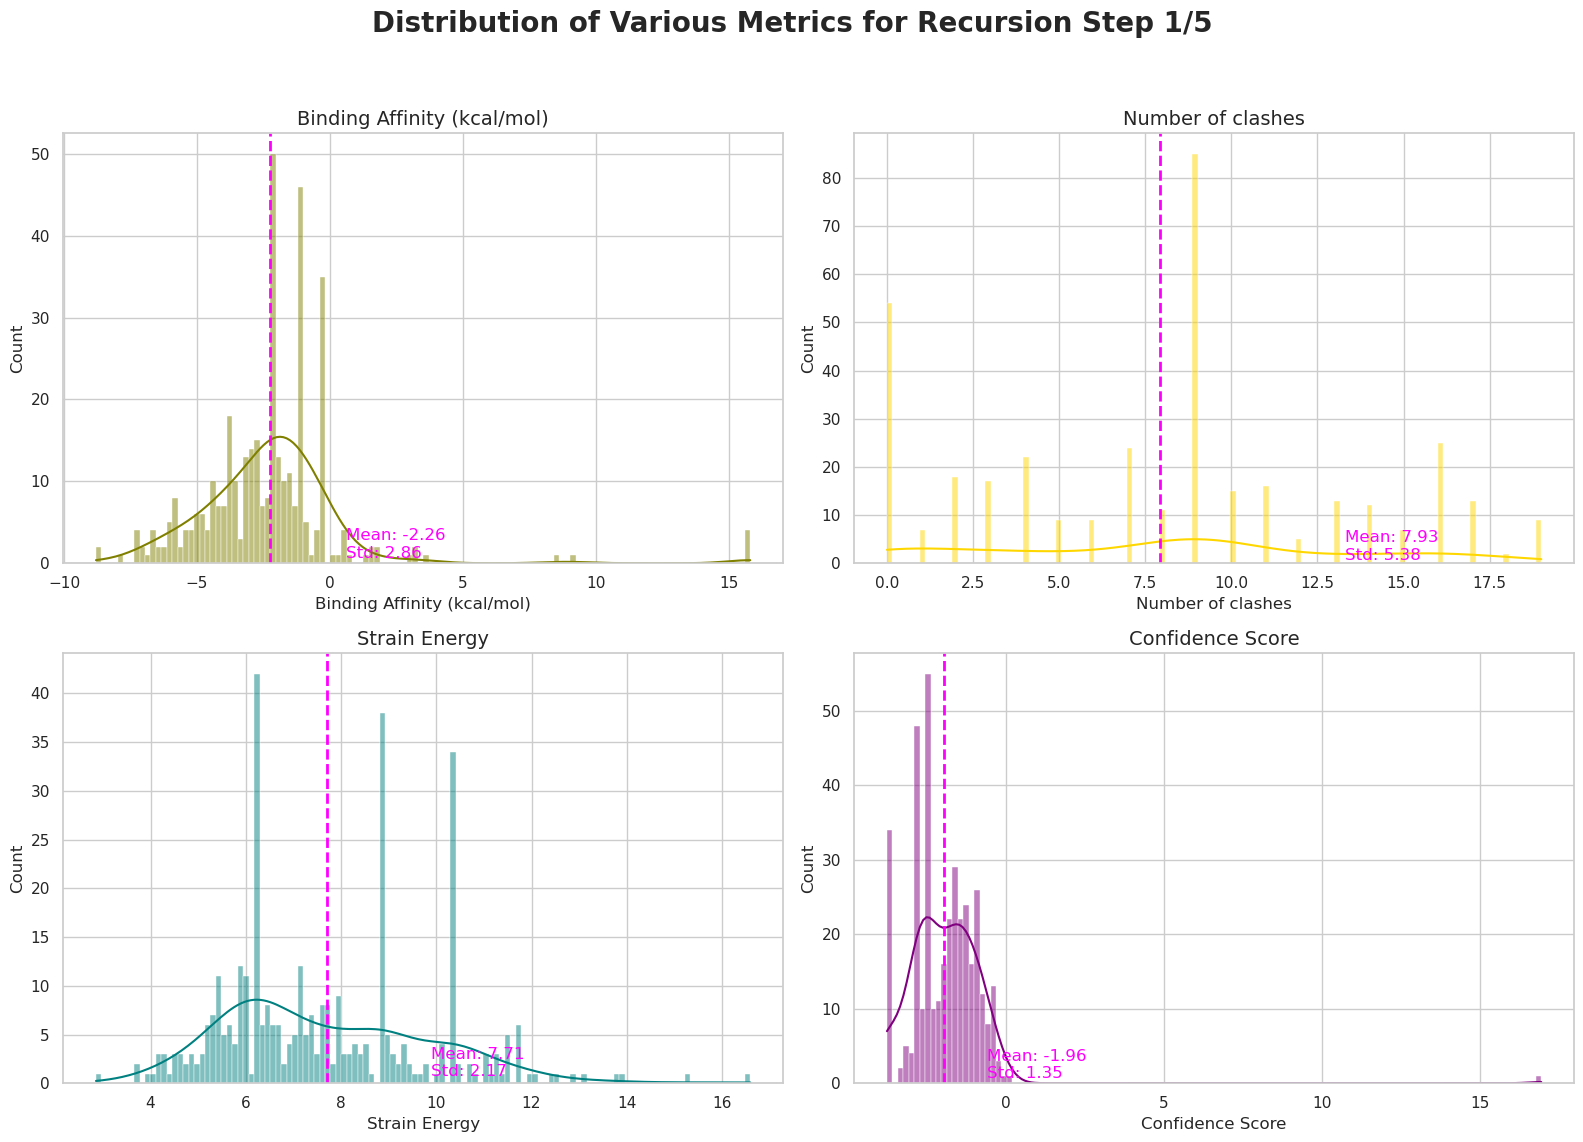

Total number of data points for recursion step 2/5: 52


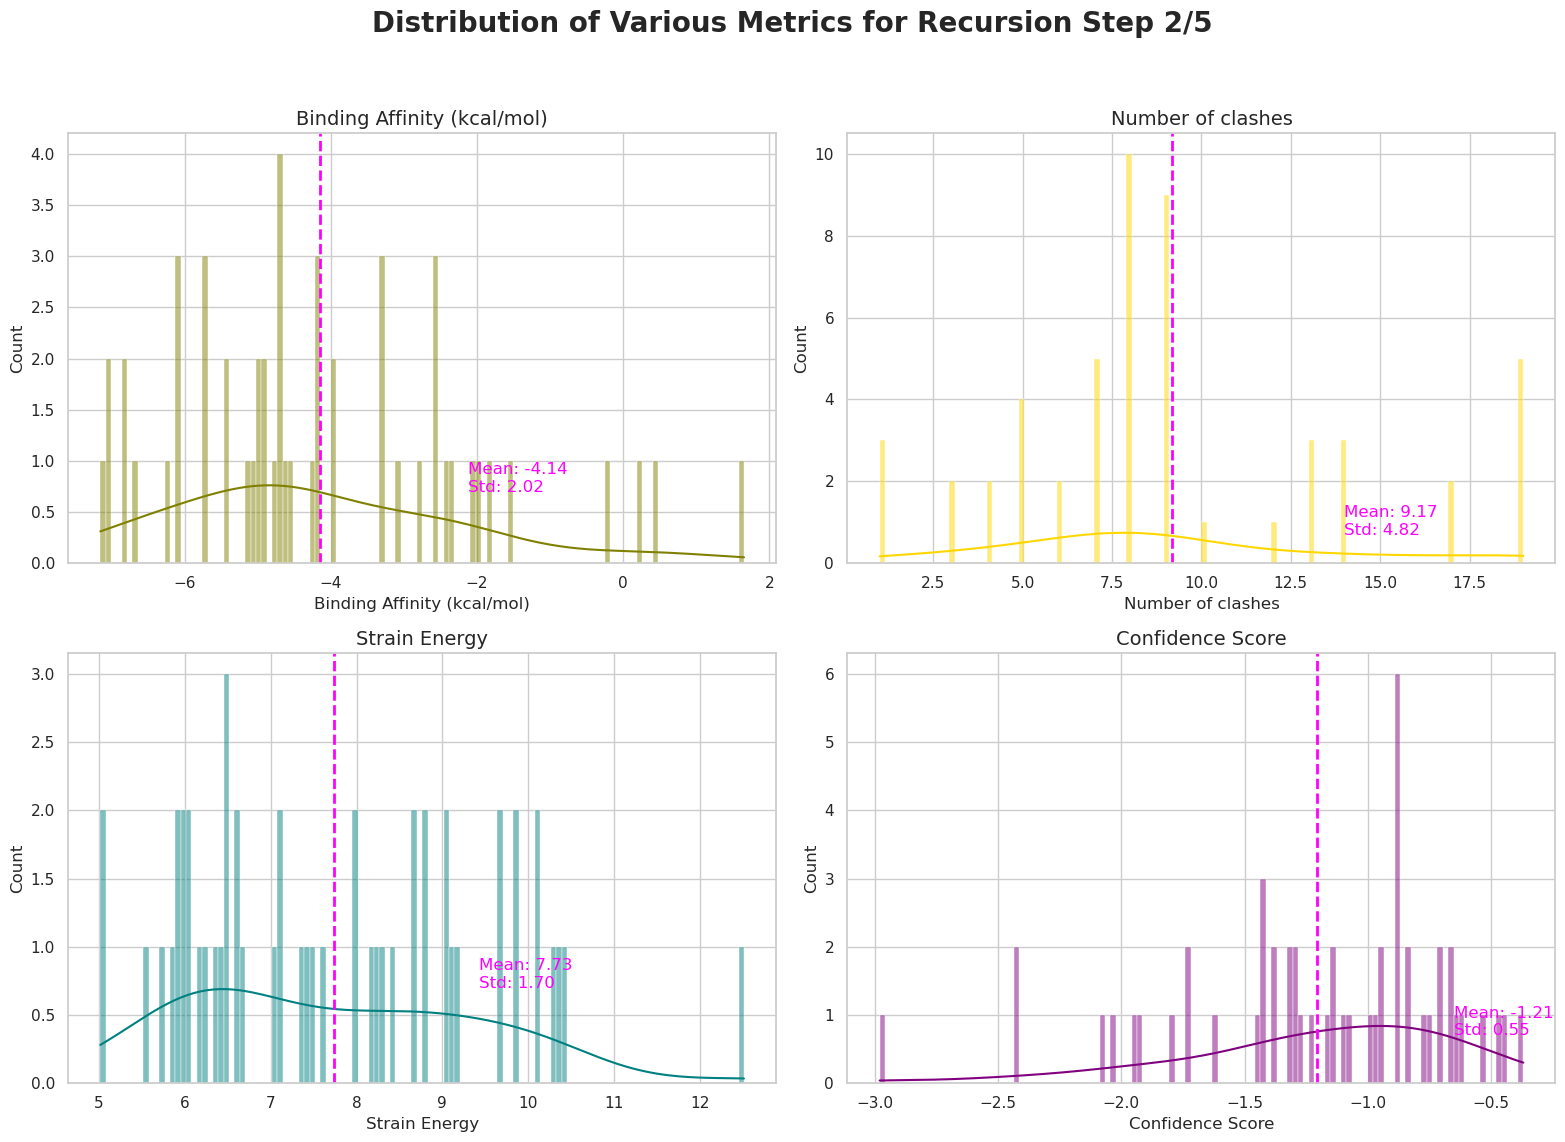

Total number of data points for recursion step 3/5: 24


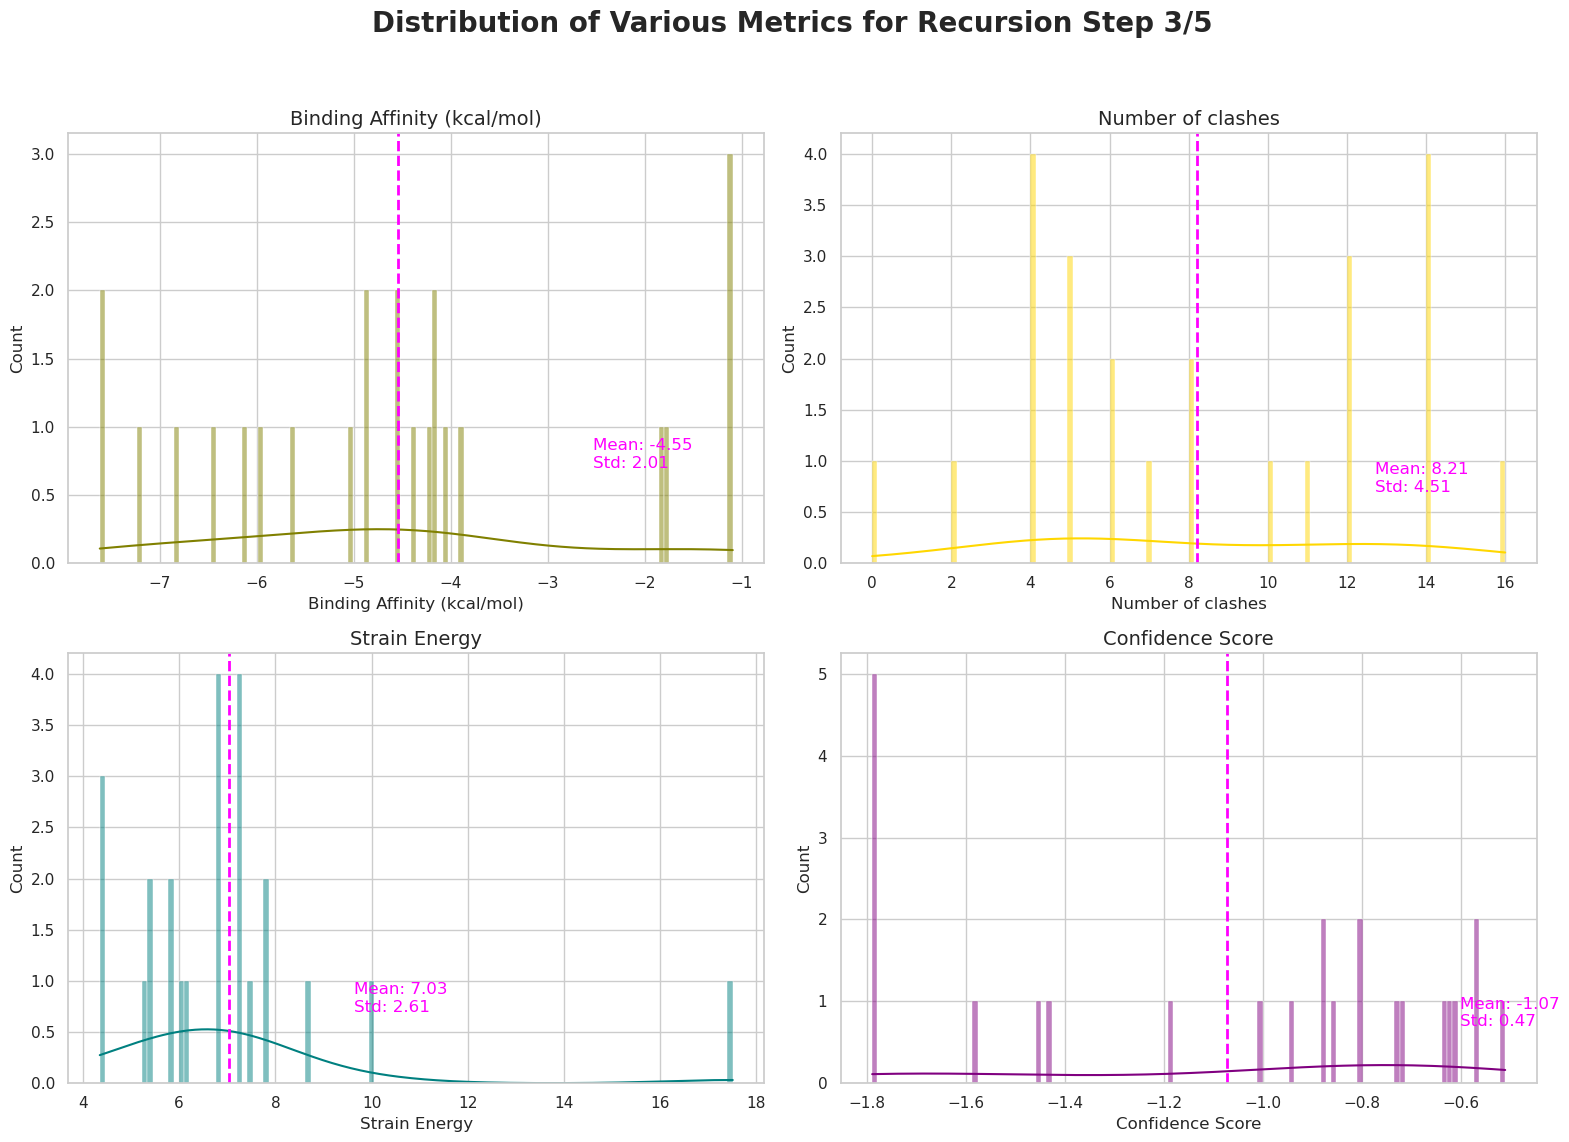

Total number of data points for recursion step 4/5: 13


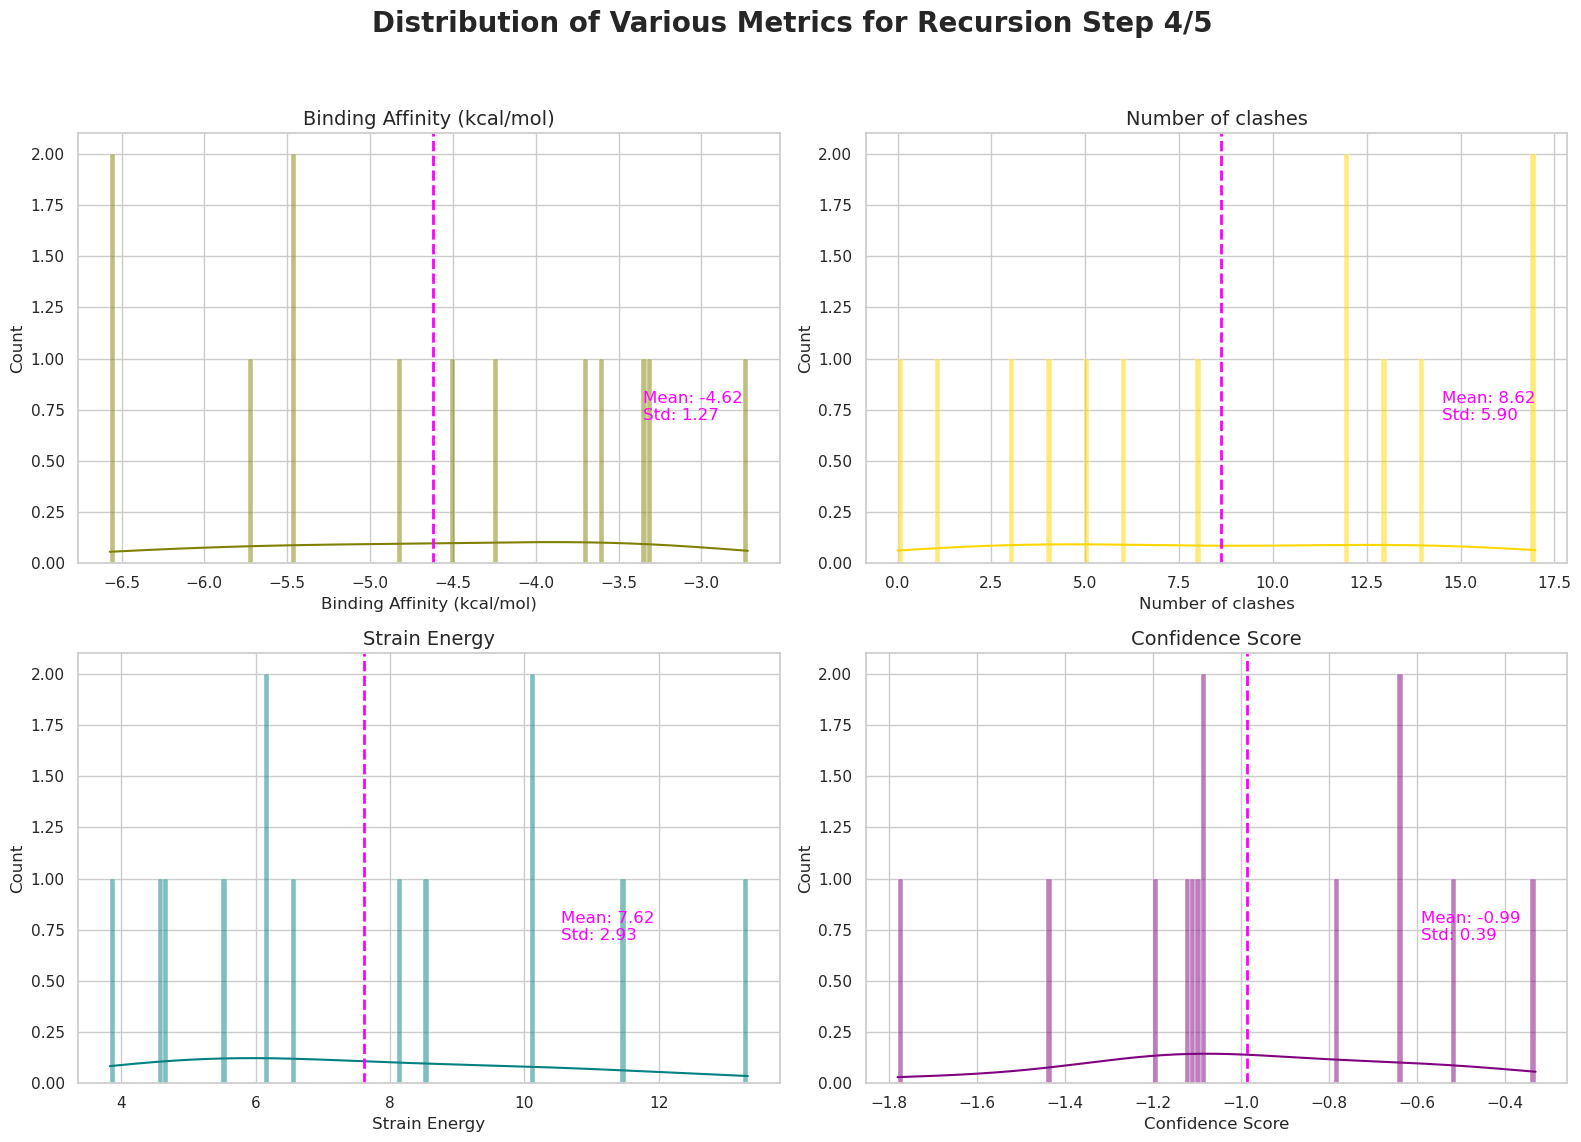

Total number of data points for recursion step 5/5: 7


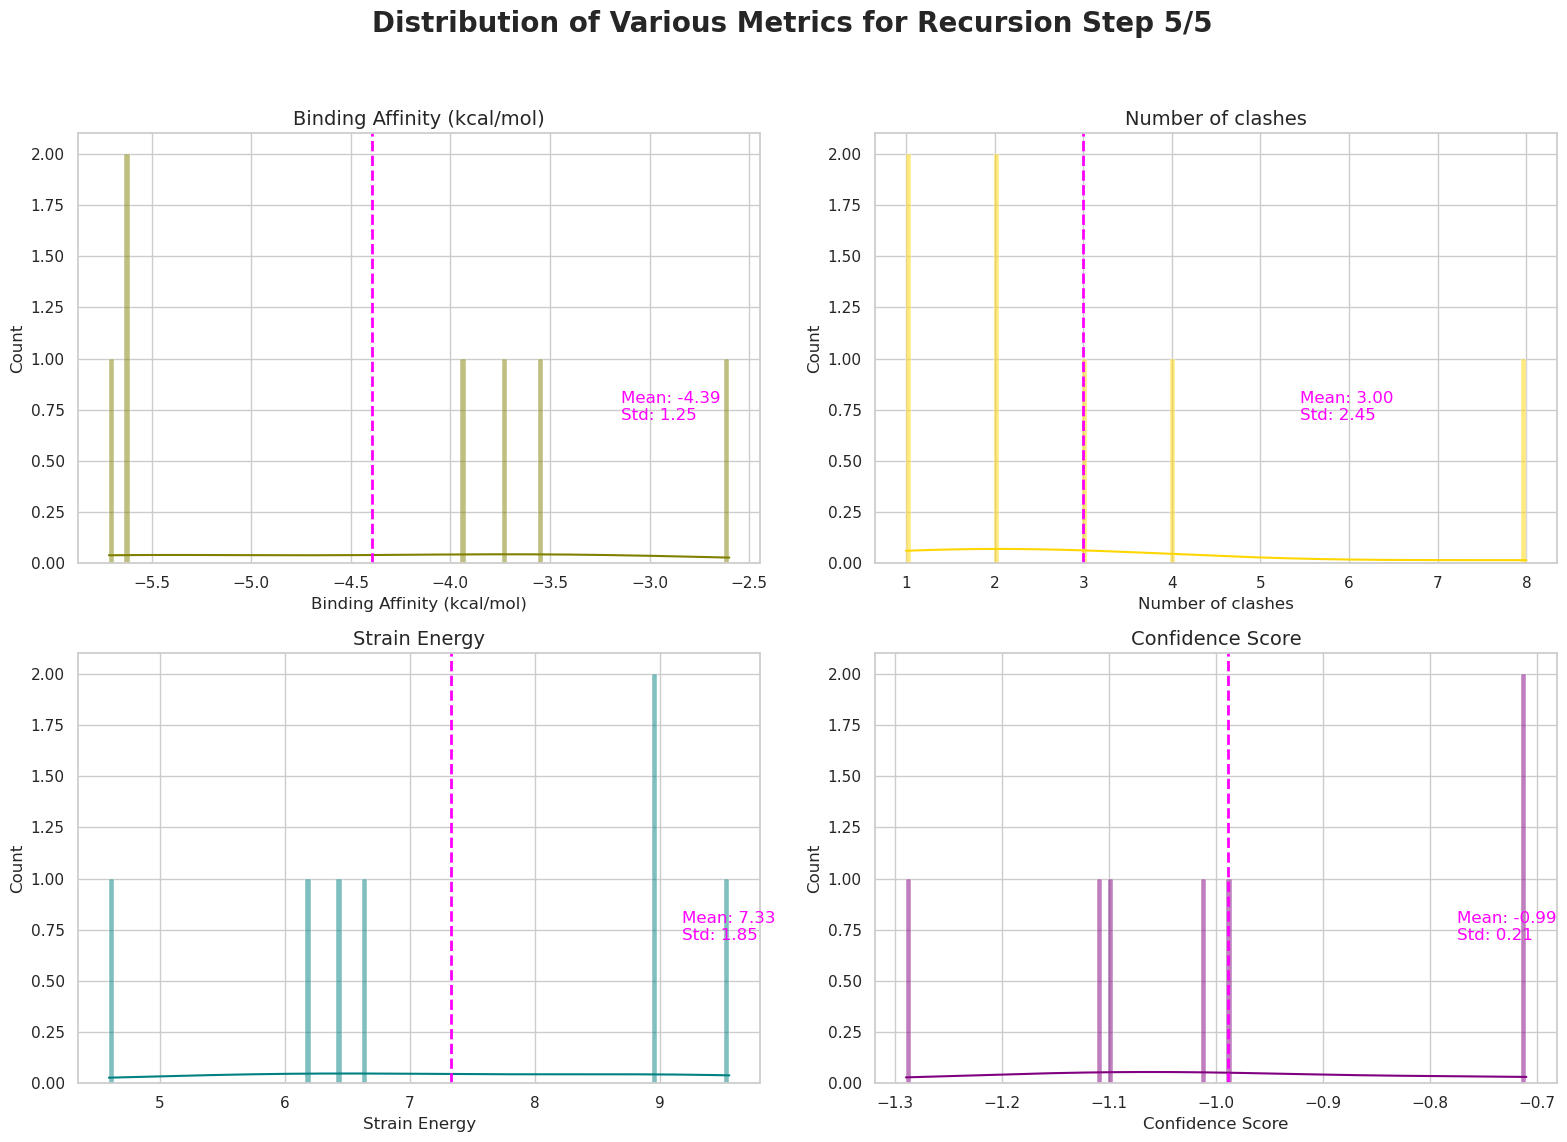

In [6]:
# Function to plot distributions of metrics from a given dataset
def plot_metrics_distributions(data, figure_title):
    # Set the overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Prepare the figure with a larger size for better readability
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Increased figure size for better legibility
    fig.suptitle(figure_title, fontsize=20, fontweight='bold')

    # Define a common bin size for comparable scales
    common_bins = 120  # Example bin size, adjust based on data distribution

    # List of metrics to plot
    metrics = ['Binding Affinity (kcal/mol)', 'Number of clashes', 'Strain Energy', 'Confidence Score']
    colors = ['olive', 'gold', 'teal', 'purple']

    # Plotting distributions
    for i, metric in enumerate(metrics):
        ax = axes.flat[i]
        sns.histplot(data=data, x=metric, kde=True, ax=ax, color=colors[i], bins=common_bins)
        ax.set_title(metric, fontsize=14)
        ax.grid(True)

        # Calculate mean and std, and annotate on the plots
        mean_value = data[metric].mean()
        std_value = data[metric].std()
        ax.axvline(mean_value, color='magenta', linestyle='dashed', linewidth=2)
        ax.text(mean_value + std_value, 0.7, f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}', color='magenta', ha='left')

    # Adjust layout for a clean look and ensure the titles and labels don't overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show plot
    plt.show()


# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_metrics_distributions(data, f'Distribution of Various Metrics for Recursion Step {step}/5')


## Data Distribution Ranges

Total number of data points for recursion step 1/5: 373


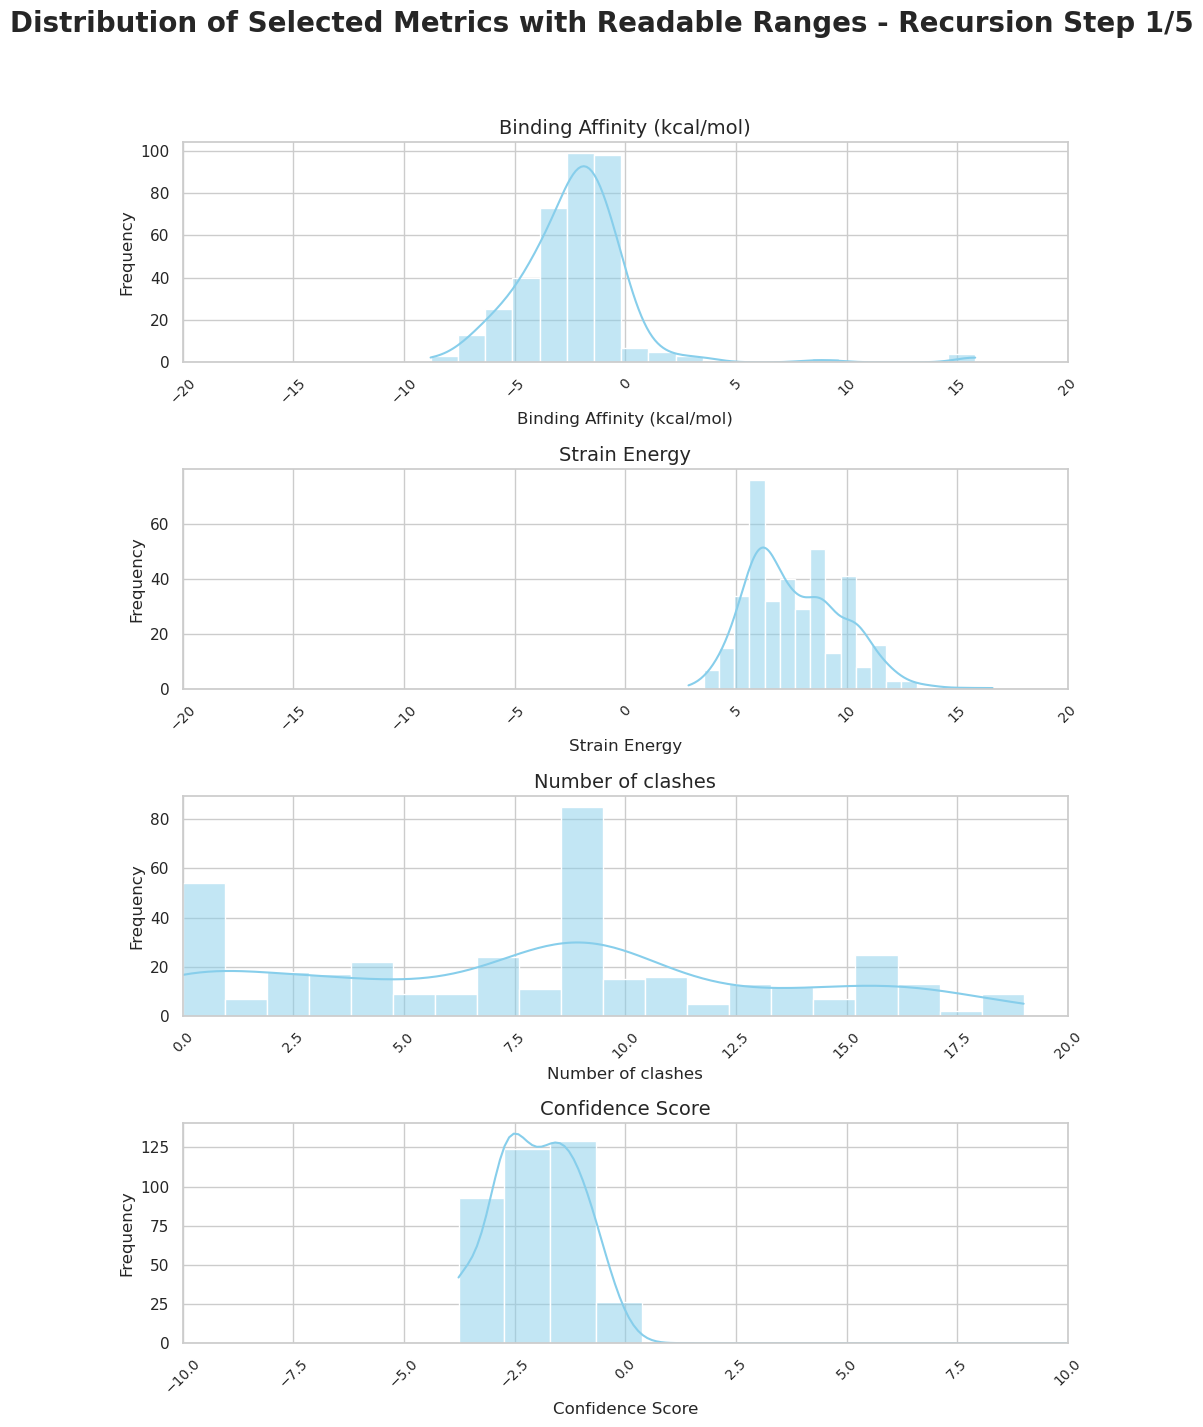

Total number of data points for recursion step 2/5: 52


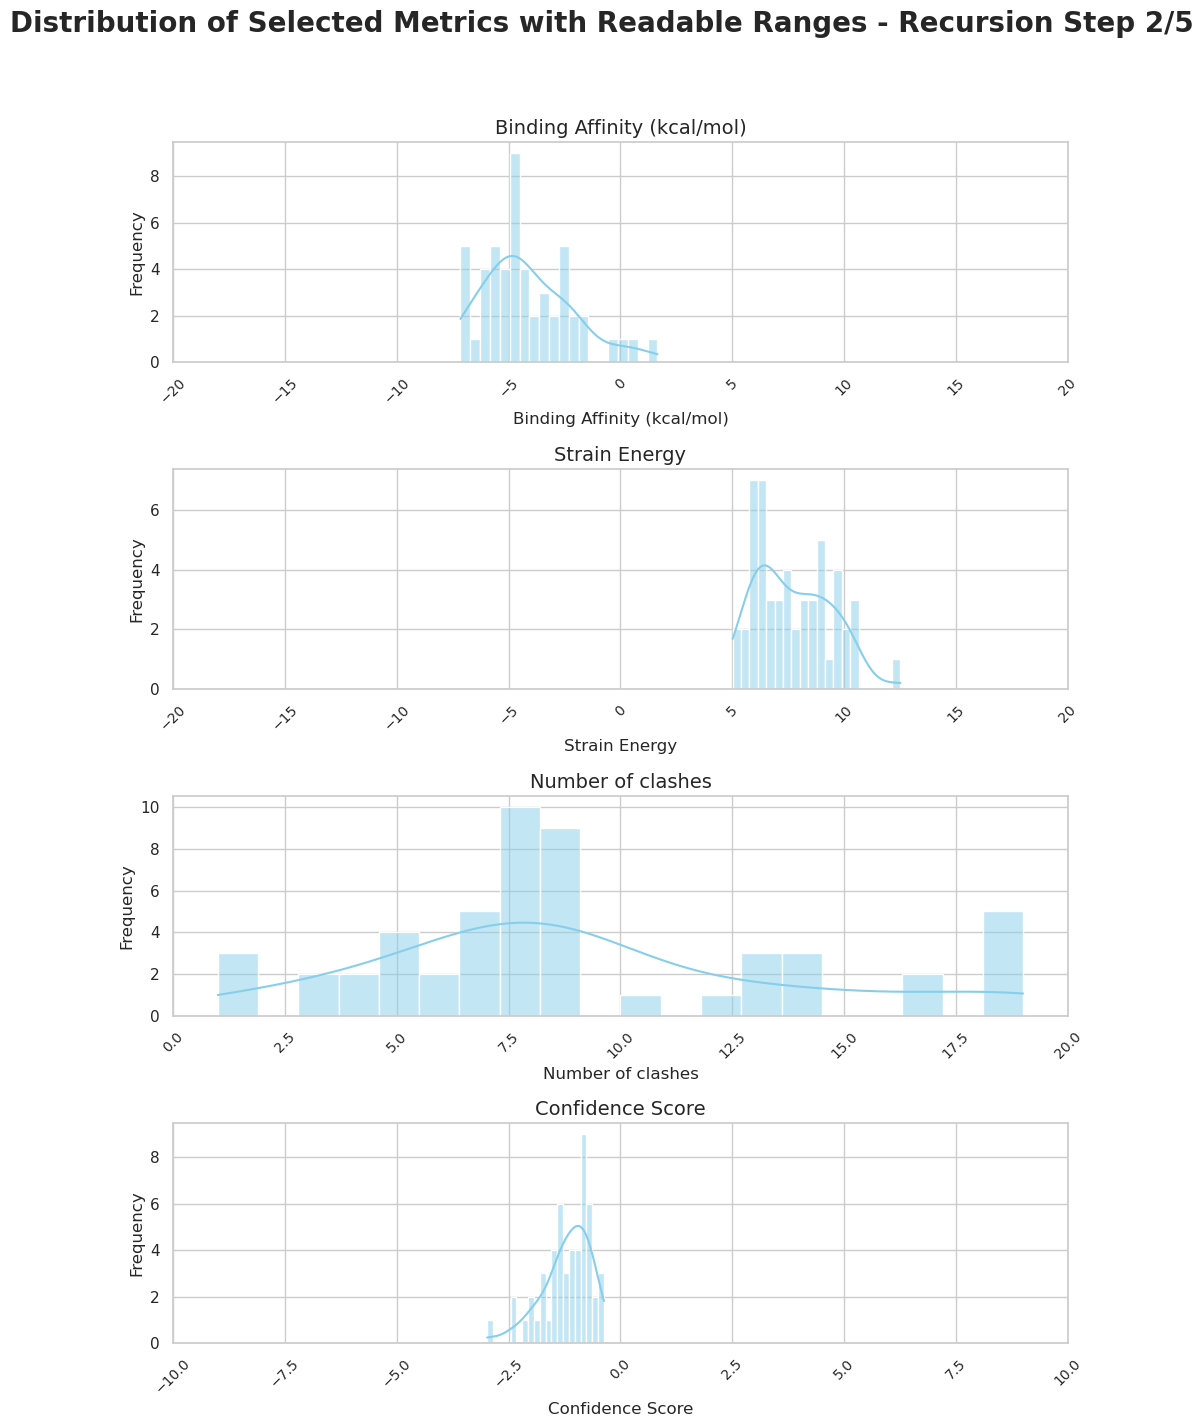

Total number of data points for recursion step 3/5: 24


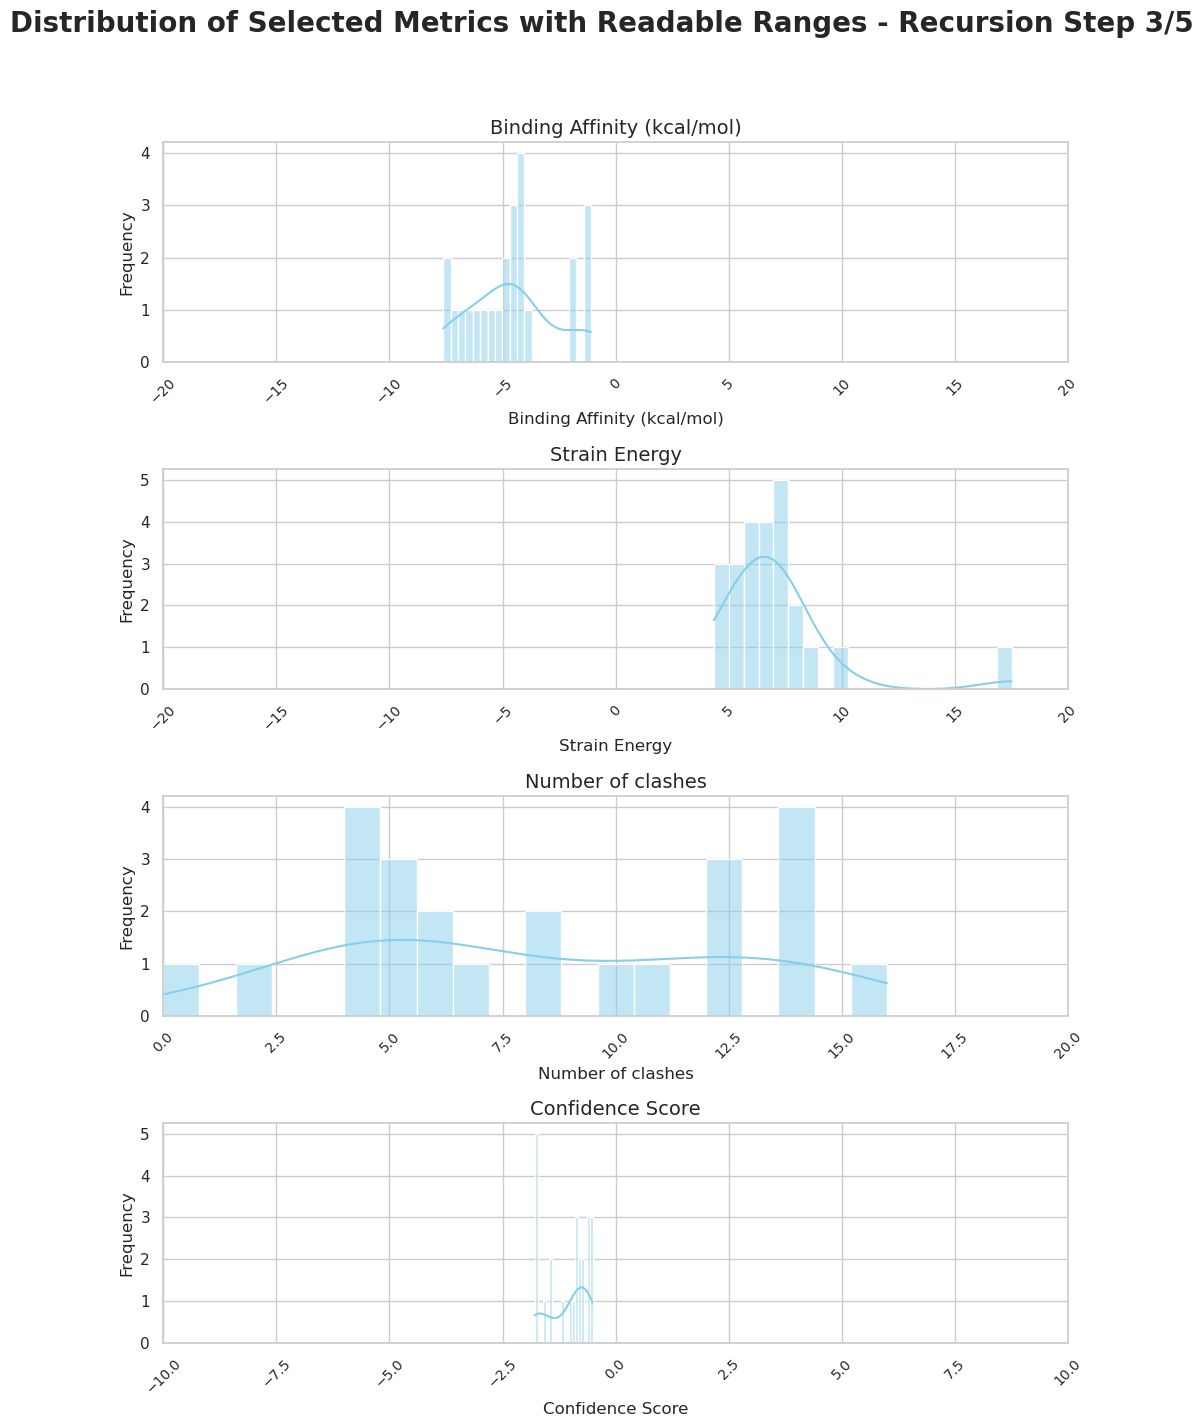

Total number of data points for recursion step 4/5: 13


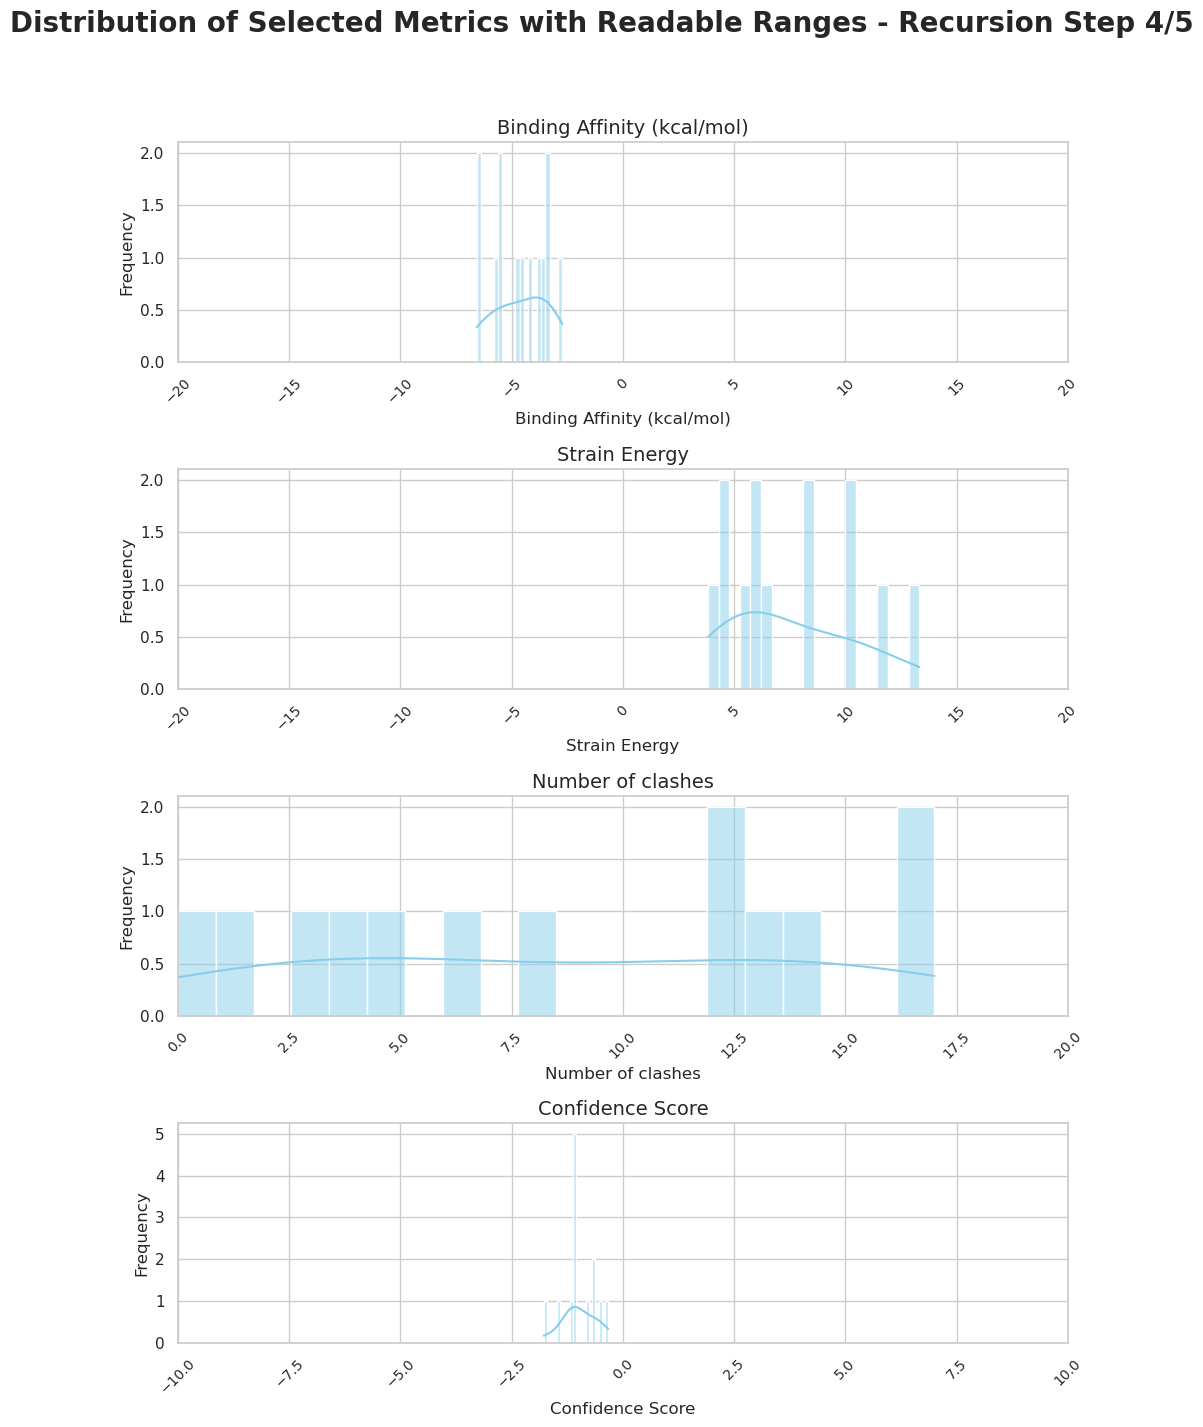

Total number of data points for recursion step 5/5: 7


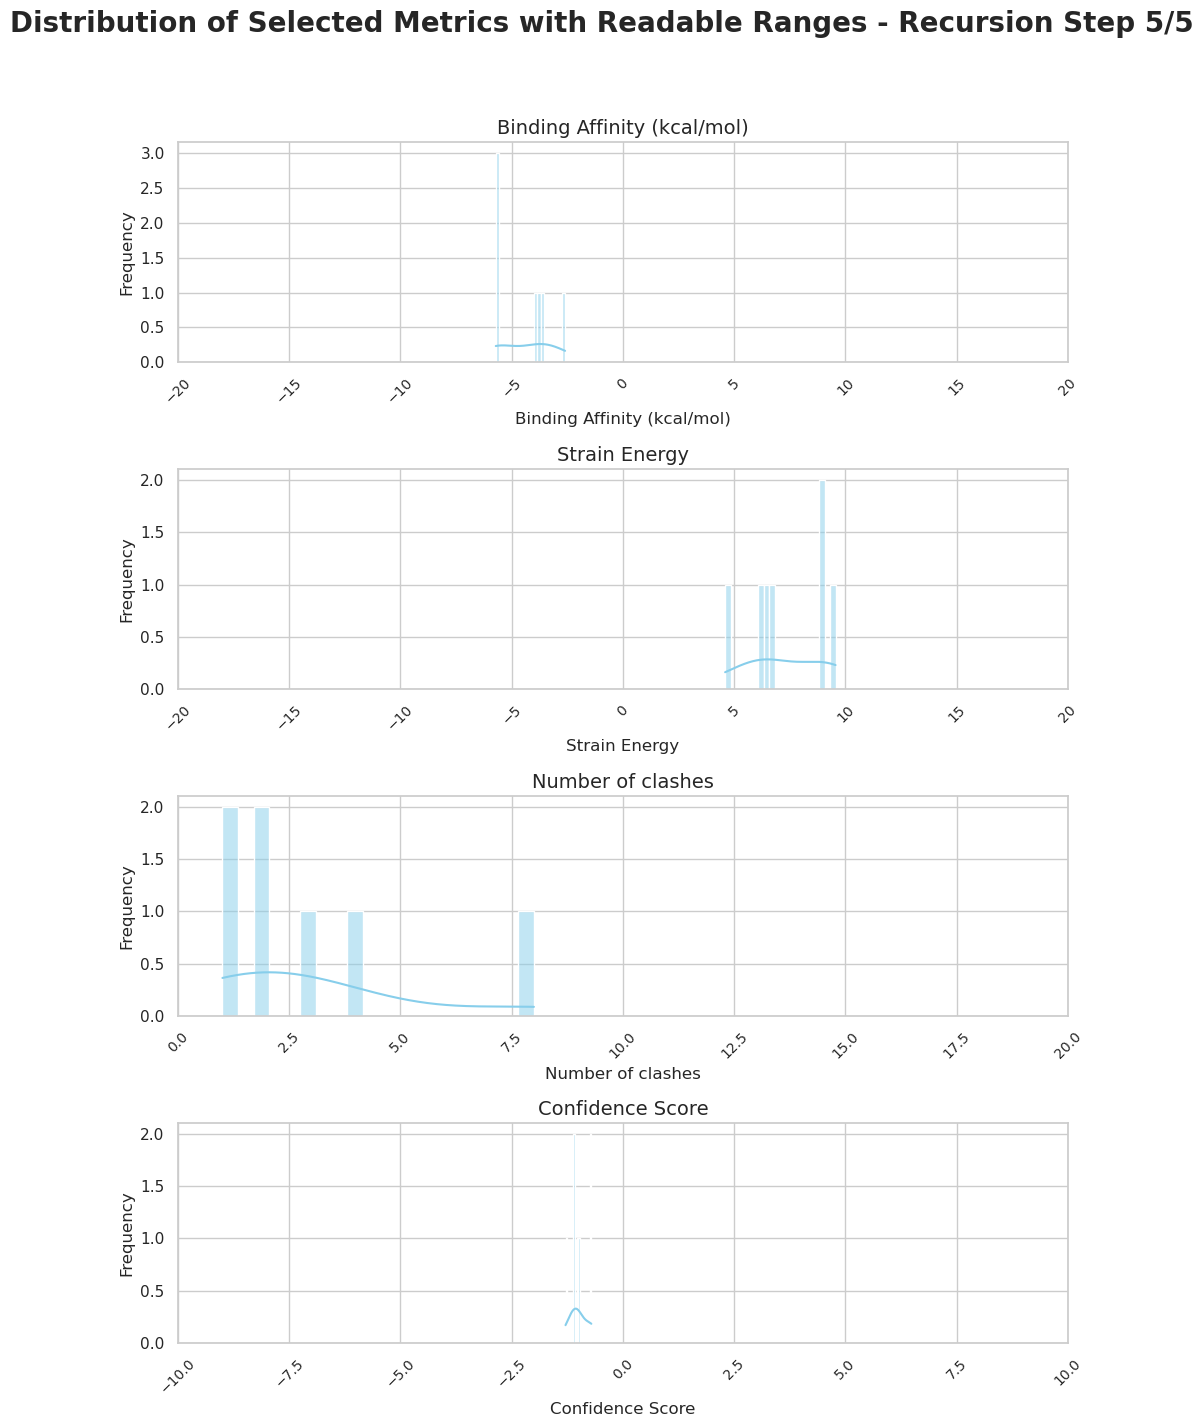

In [7]:
# Function to plot histograms with readable ranges for a given dataset
def plot_histograms_with_readable_ranges(data, title_suffix):
    # Enhancing overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Initializing a larger figure for clearer detail
    fig, axes = plt.subplots(4, 1, figsize=(10, 15))  # Using a vertical layout for better x-axis label readability

    # Titles and customization for improved readability
    fig.suptitle(f'Distribution of Selected Metrics with Readable Ranges - {title_suffix}', fontsize=20, fontweight='bold')

    # Adjusting bin sizes and x-axis limits for clarity
    metrics_info = {
        'Binding Affinity (kcal/mol)': {'bins': 20, 'ax': axes[0], 'xlim': (-20, 20)},
        'Strain Energy': {'bins': 20, 'ax': axes[1], 'xlim': (-20, 20)},
        'Number of clashes': {'bins': 20, 'ax': axes[2], 'xlim': (0, 20)},
        'Confidence Score': {'bins': 20, 'ax': axes[3], 'xlim': (-10, 10)}
    }

    for metric, info in metrics_info.items():
        sns.histplot(data=data, x=metric, kde=True, ax=info['ax'], bins=info['bins'], color='skyblue')
        info['ax'].set_title(metric, fontsize=14)
        info['ax'].set_xlabel(metric, fontsize=12)
        info['ax'].set_ylabel('Frequency', fontsize=12)
        info['ax'].set_xlim(info['xlim'])  # Adjusting x-axis limits for focusing on interesting ranges
        info['ax'].tick_params(axis='x', labelsize=10, rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_histograms_with_readable_ranges(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) 

- This is all data without selecting range values

Total number of data points for recursion step 1/5: 373


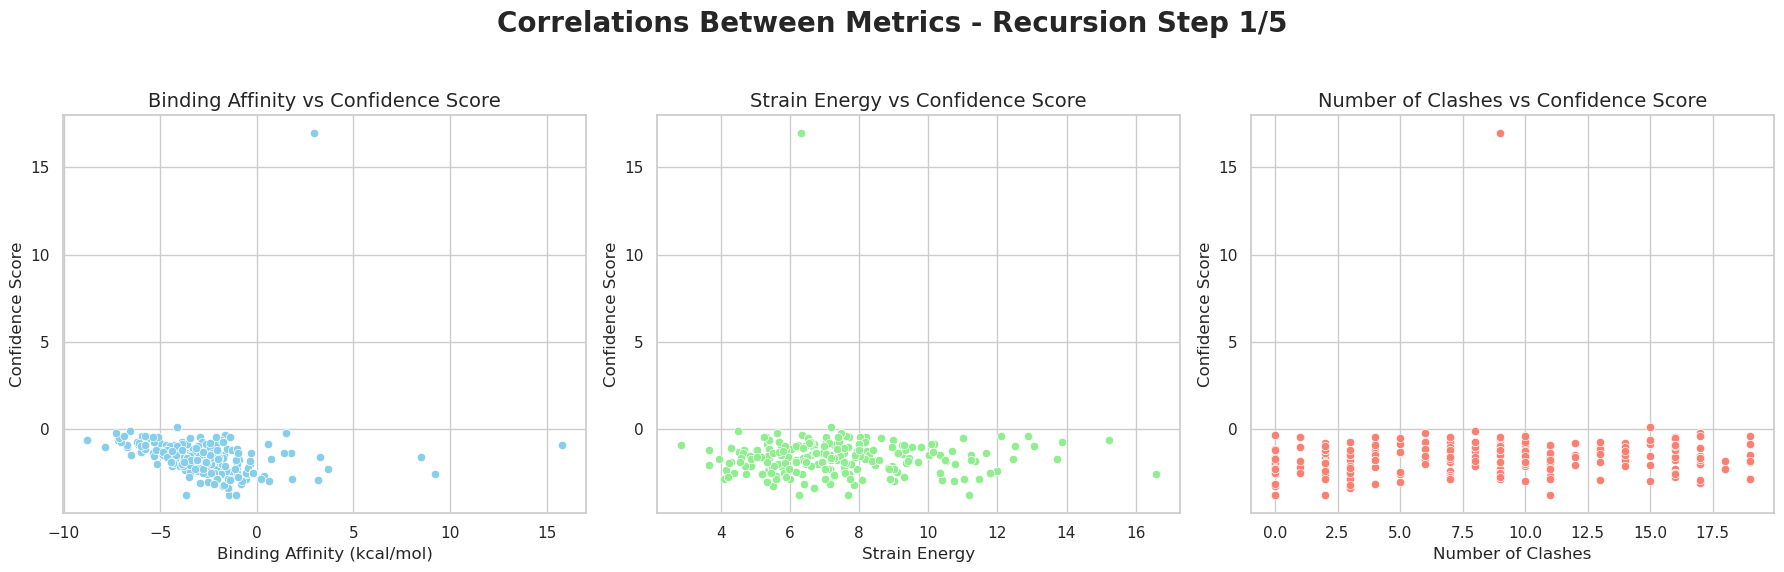

Total number of data points for recursion step 2/5: 52


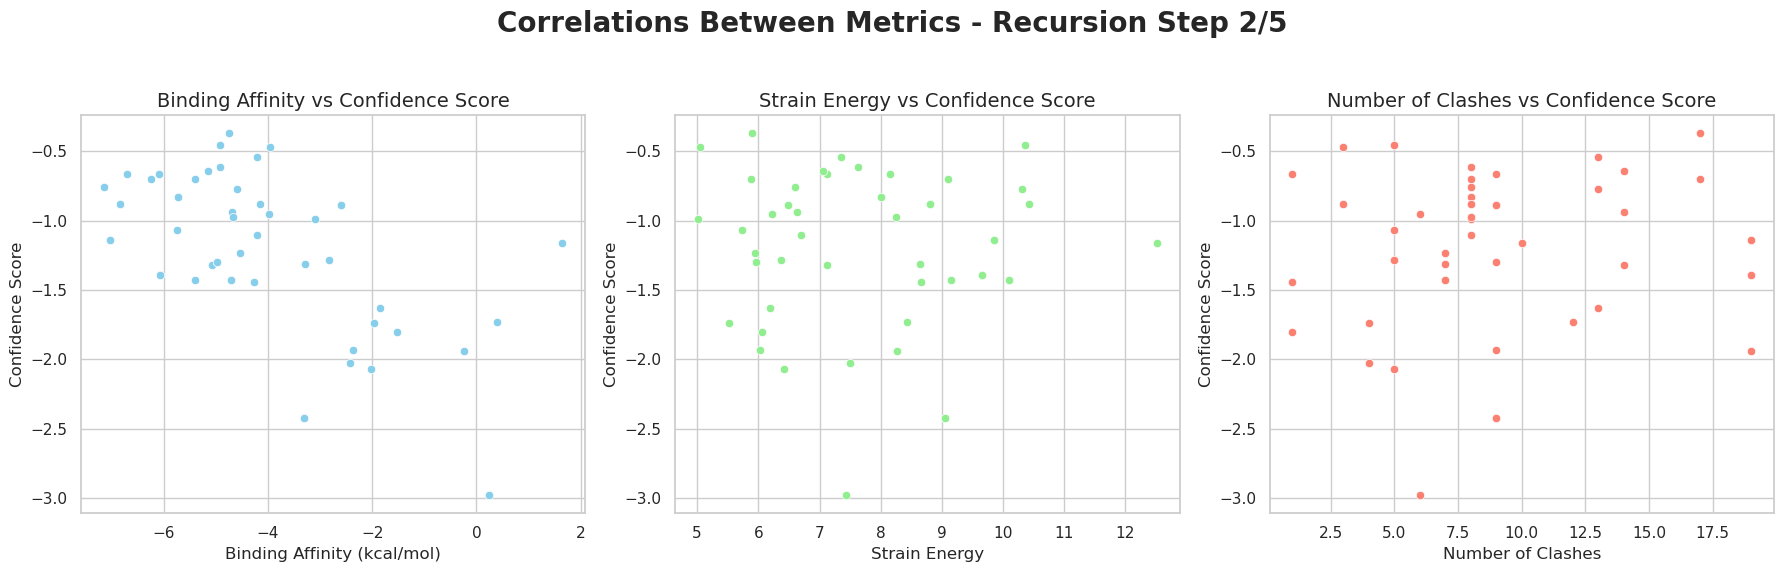

Total number of data points for recursion step 3/5: 24


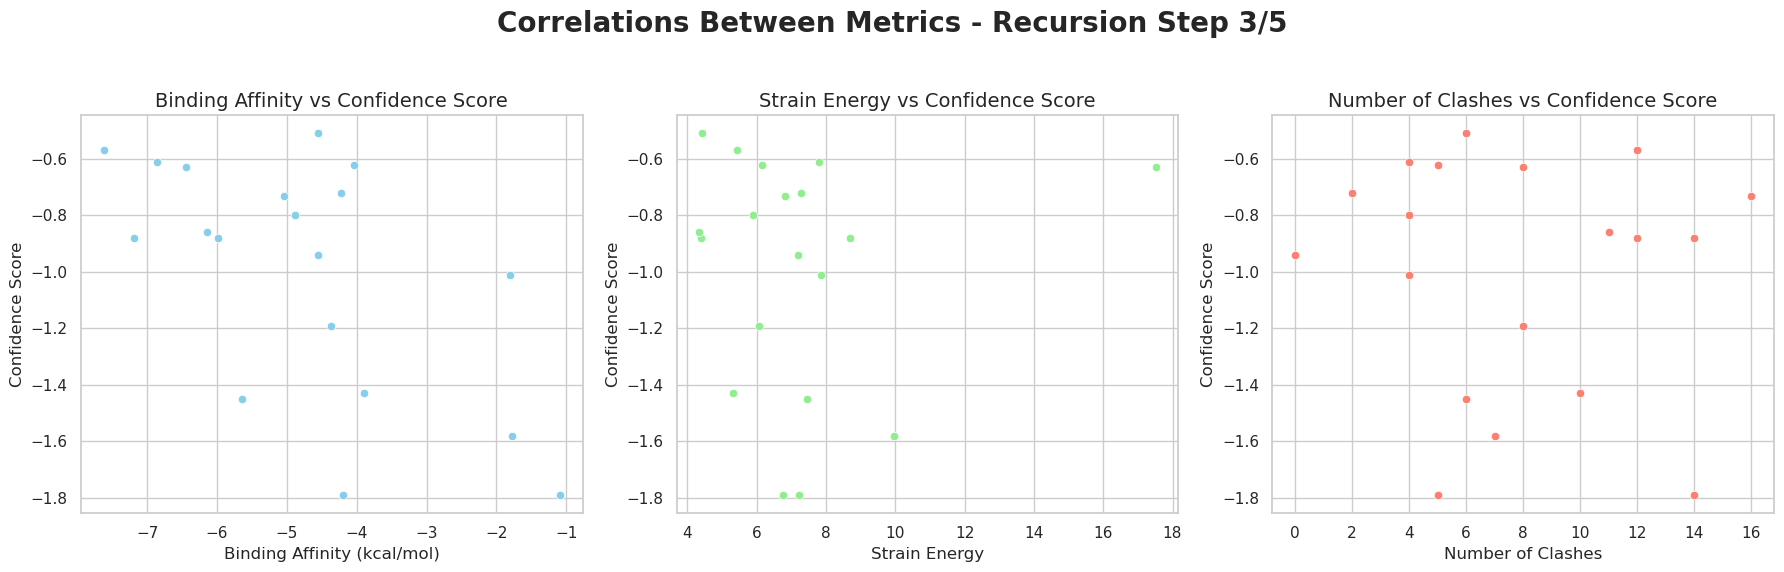

Total number of data points for recursion step 4/5: 13


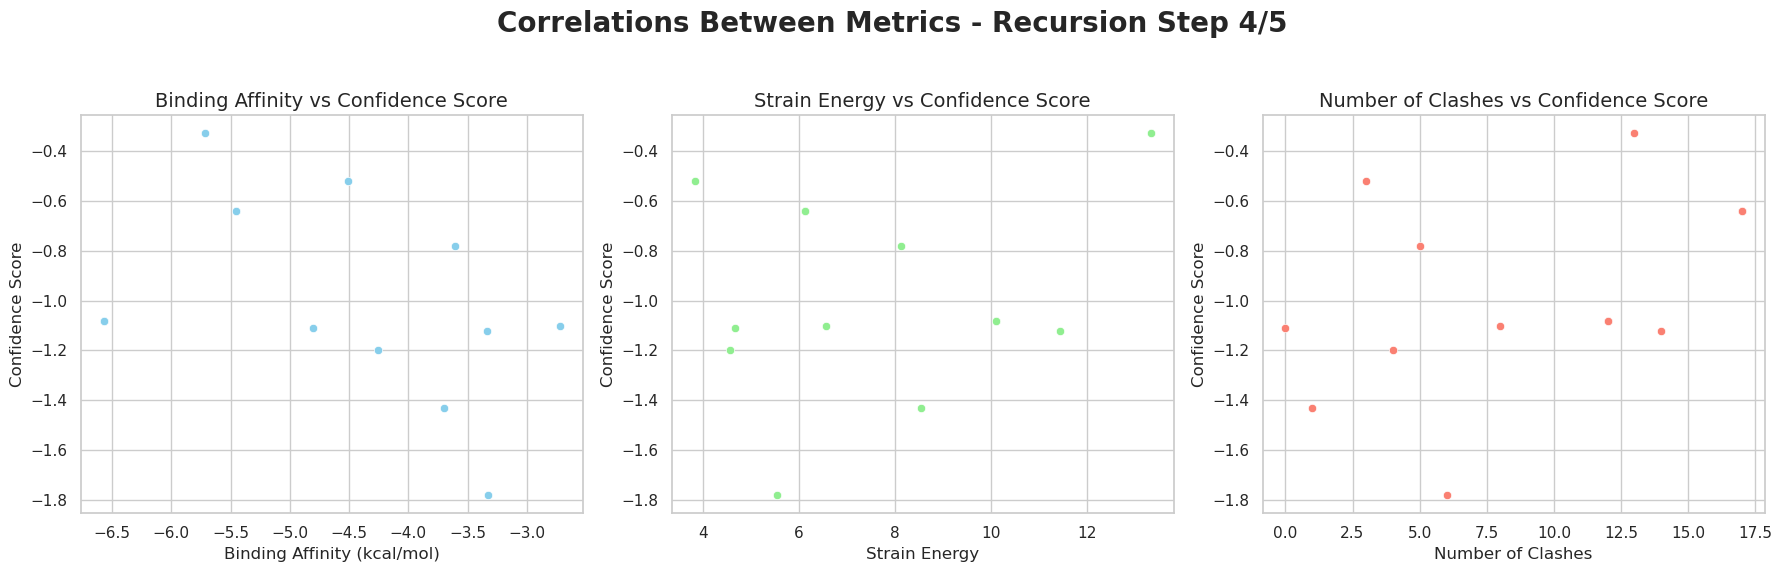

Total number of data points for recursion step 5/5: 7


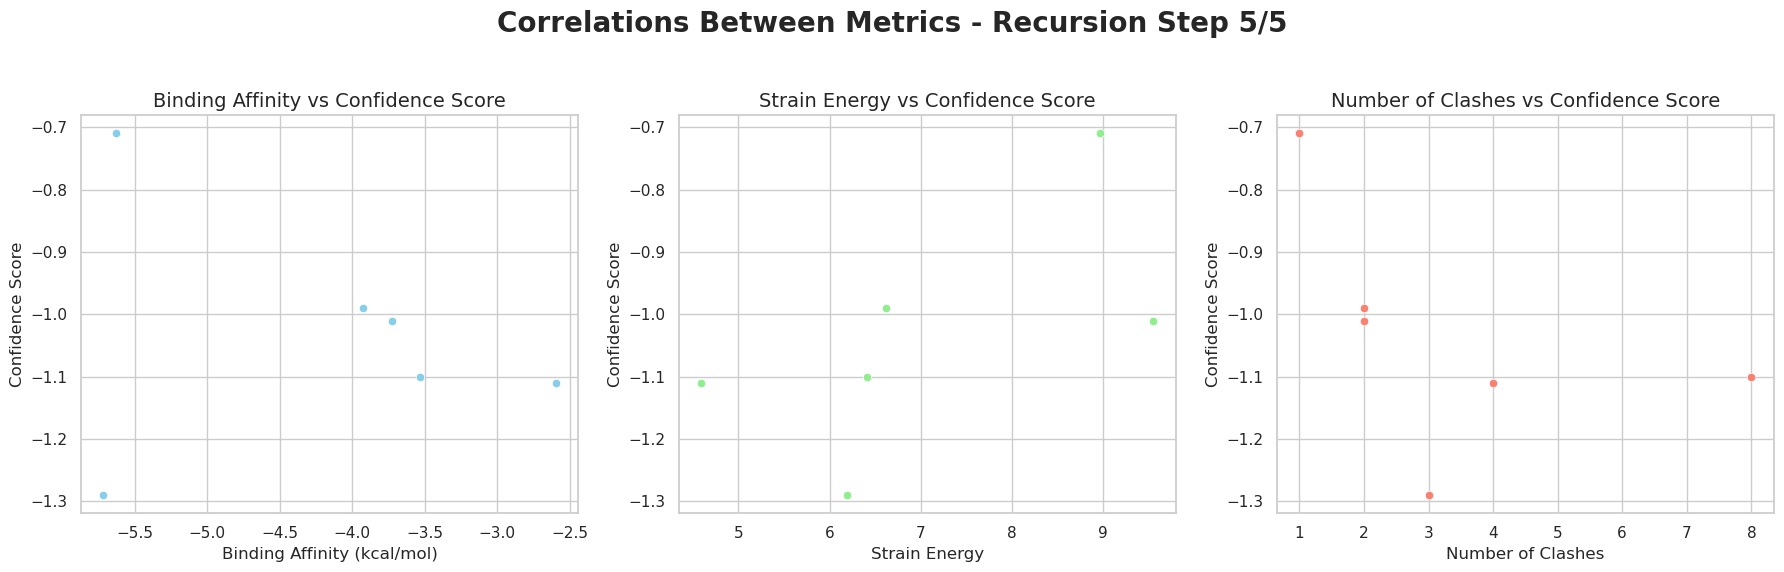

In [8]:
def plot_correlations(data, title_suffix):
    # Plotting correlations for the specified pairs of metrics
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations Between Metrics - {title_suffix}', fontsize=20, fontweight='bold')

    # Binding Affinity (kcal/mol) vs Confidence Score
    sns.scatterplot(data=data, x='Binding Affinity (kcal/mol)', y='Confidence Score', ax=axes[0], color='skyblue')
    axes[0].set_title('Binding Affinity vs Confidence Score', fontsize=14)
    axes[0].set_xlabel('Binding Affinity (kcal/mol)', fontsize=12)
    axes[0].set_ylabel('Confidence Score', fontsize=12)

    # Strain Energy vs Confidence Score
    sns.scatterplot(data=data, x='Strain Energy', y='Confidence Score', ax=axes[1], color='lightgreen')
    axes[1].set_title('Strain Energy vs Confidence Score', fontsize=14)
    axes[1].set_xlabel('Strain Energy', fontsize=12)
    axes[1].set_ylabel('Confidence Score', fontsize=12)

    # Number of clashes vs Confidence Score
    sns.scatterplot(data=data, x='Number of clashes', y='Confidence Score', ax=axes[2], color='salmon')
    axes[2].set_title('Number of Clashes vs Confidence Score', fontsize=14)
    axes[2].set_xlabel('Number of Clashes', fontsize=12)
    axes[2].set_ylabel('Confidence Score', fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and plot correlations for each step
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_correlations(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) 

- This is all data with selecting range values

Total number of data points for recursion step 1/5: 373


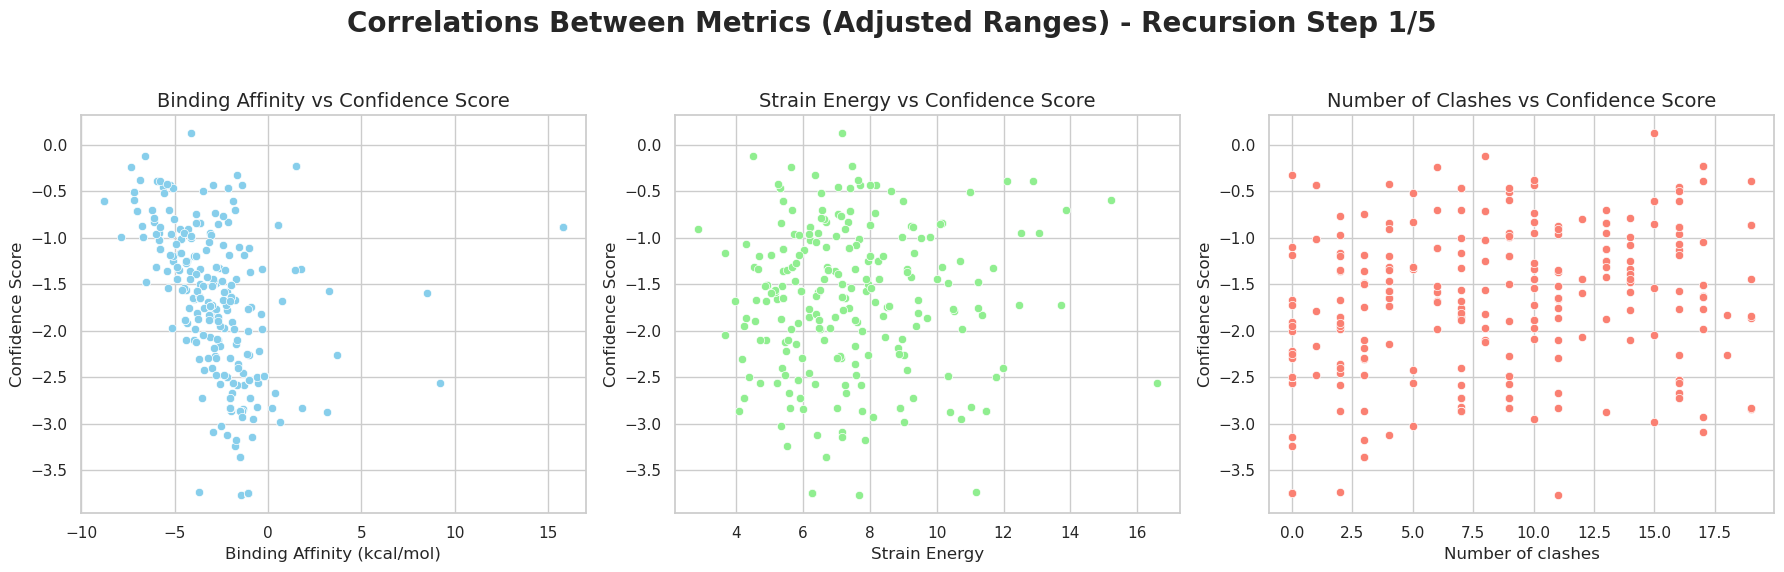

Total number of data points for recursion step 2/5: 52


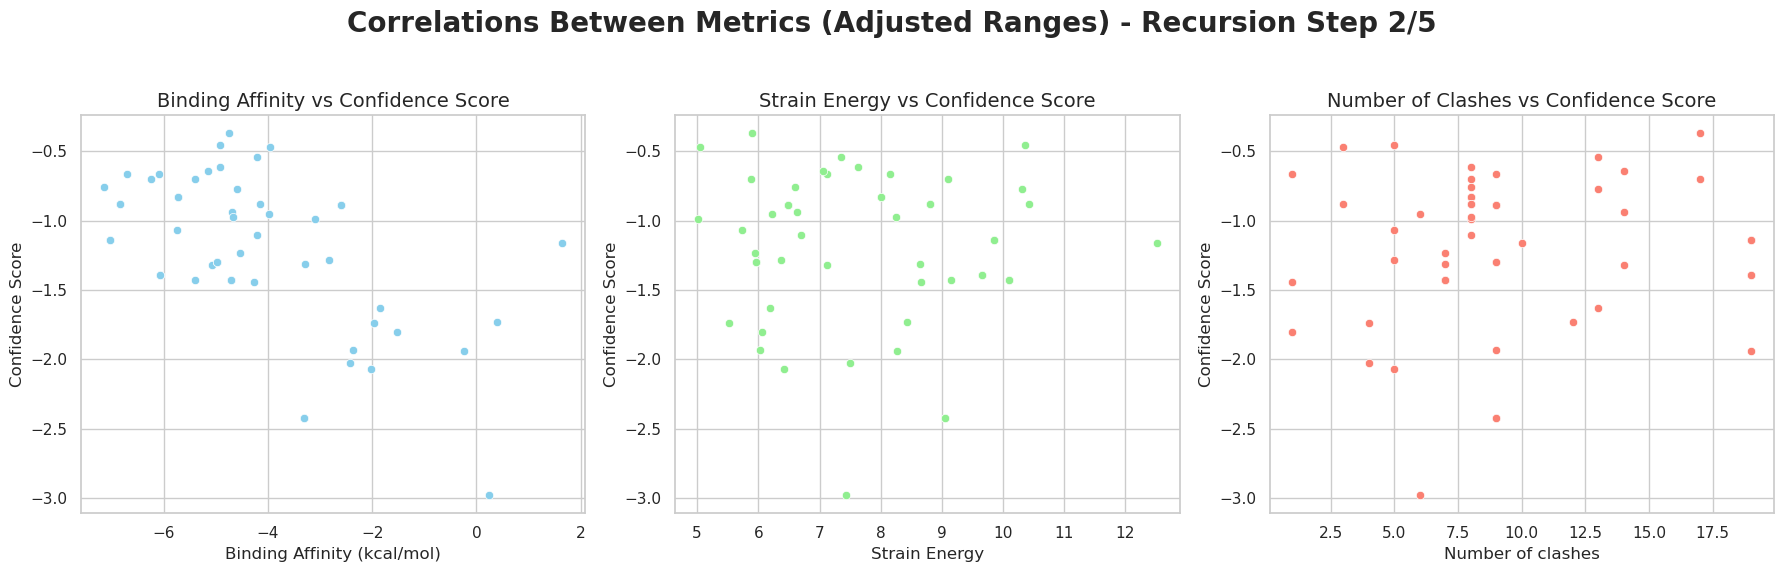

Total number of data points for recursion step 3/5: 24


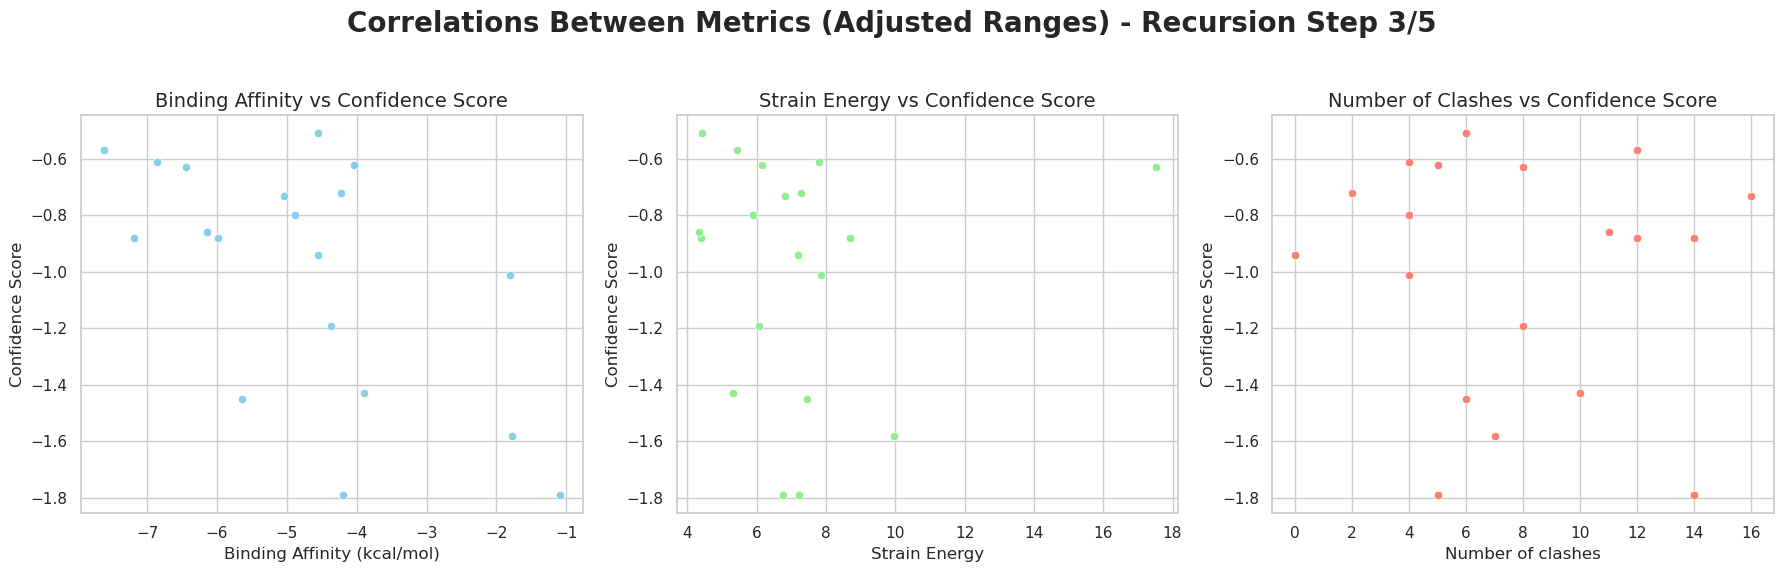

Total number of data points for recursion step 4/5: 13


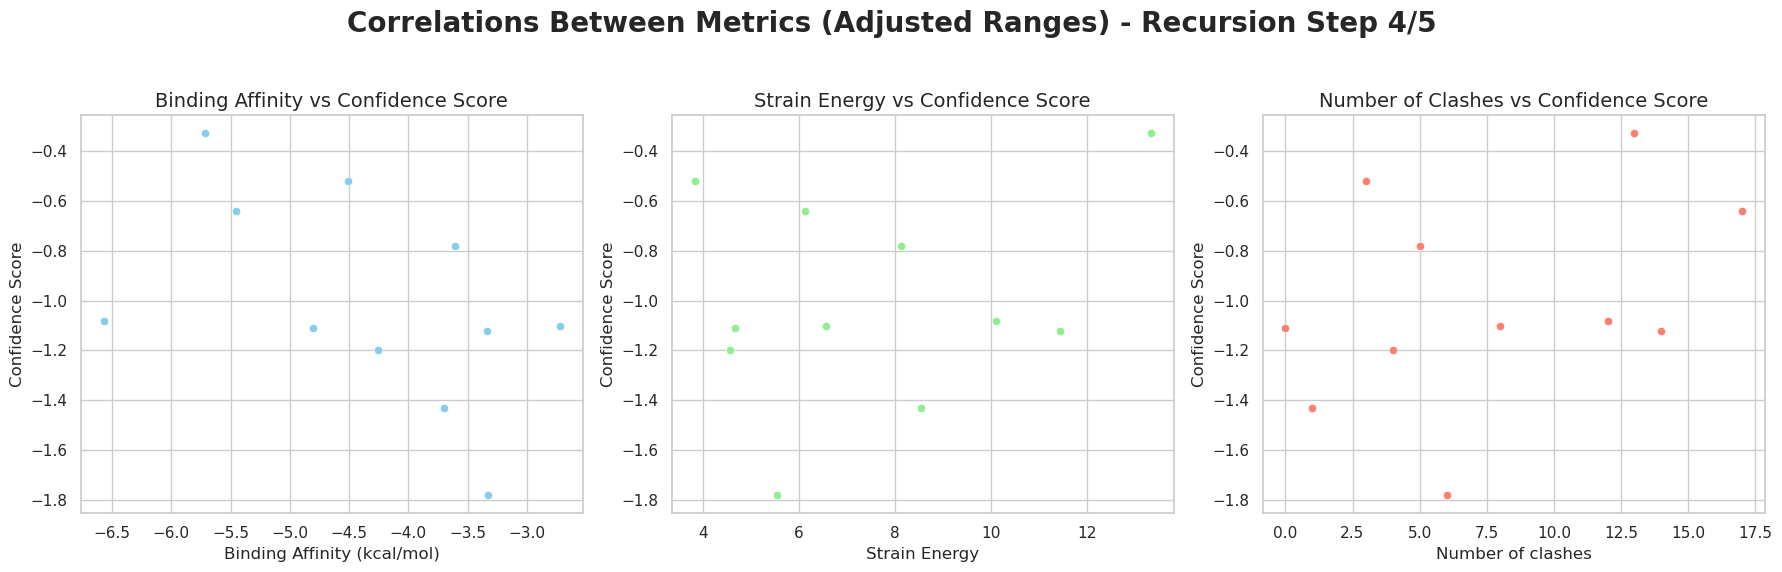

Total number of data points for recursion step 5/5: 7


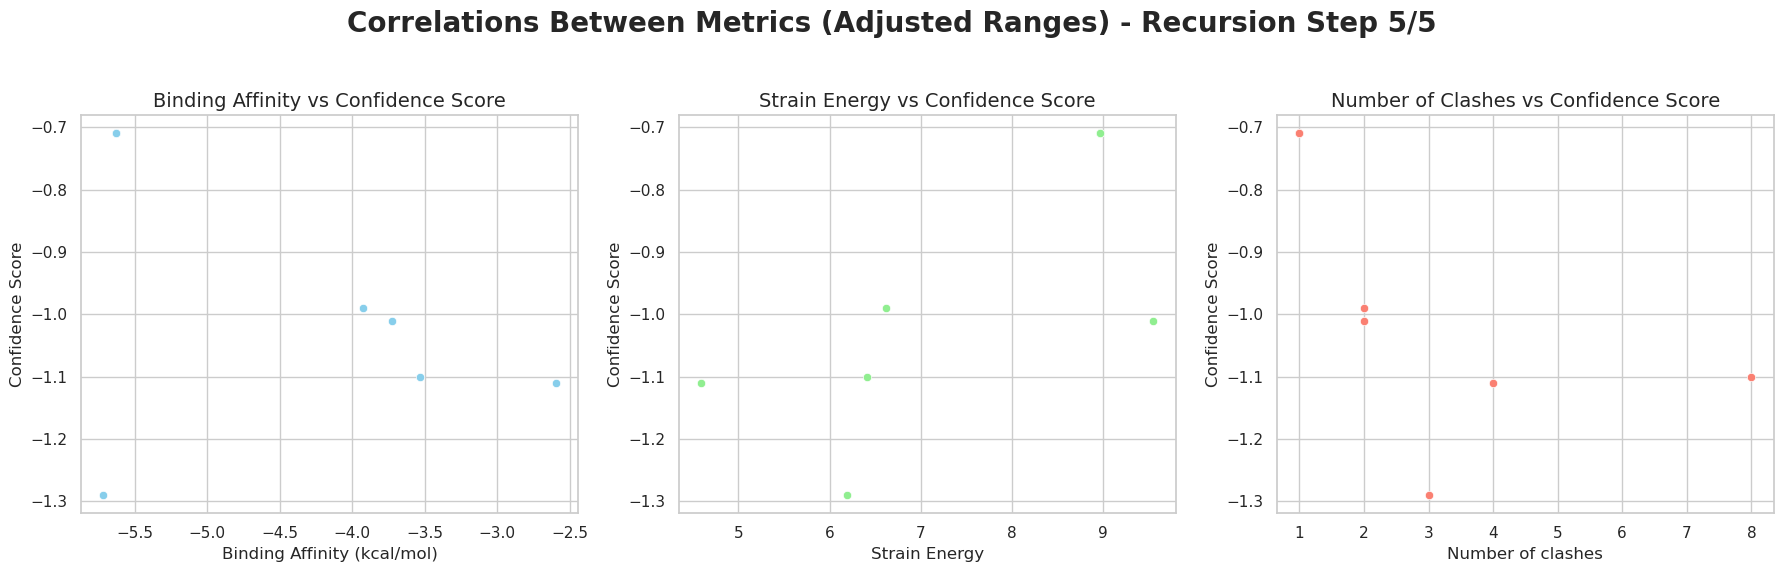

In [9]:

def filter_and_plot_correlations(data, title_suffix):
    # Filter the data for the given ranges
    filtered_data = data[
        (data['Confidence Score'] >= -5) & (data['Confidence Score'] <= 5) &
        (data['Binding Affinity (kcal/mol)'] >= -20) & (data['Binding Affinity (kcal/mol)'] <= 20) &
        (data['Strain Energy'] >= -20) & (data['Strain Energy'] <= 20)
    ]

    # Plotting correlations for the specified pairs of metrics with all adjusted ranges
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations Between Metrics (Adjusted Ranges) - {title_suffix}', fontsize=20, fontweight='bold')

    # Binding Affinity (kcal/mol) vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Binding Affinity (kcal/mol)', y='Confidence Score', ax=axes[0], color='skyblue')
    axes[0].set_title('Binding Affinity vs Confidence Score', fontsize=14)

    # Strain Energy vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Strain Energy', y='Confidence Score', ax=axes[1], color='lightgreen')
    axes[1].set_title('Strain Energy vs Confidence Score', fontsize=14)

    # Number of clashes vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Number of clashes', y='Confidence Score', ax=axes[2], color='salmon')
    axes[2].set_title('Number of Clashes vs Confidence Score', fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and apply the filter and plotting function
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    filter_and_plot_correlations(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) 

- This is all data with selecting range values 
- Best lines with `R^2` values

Total number of data points for recursion step 1/5: 373


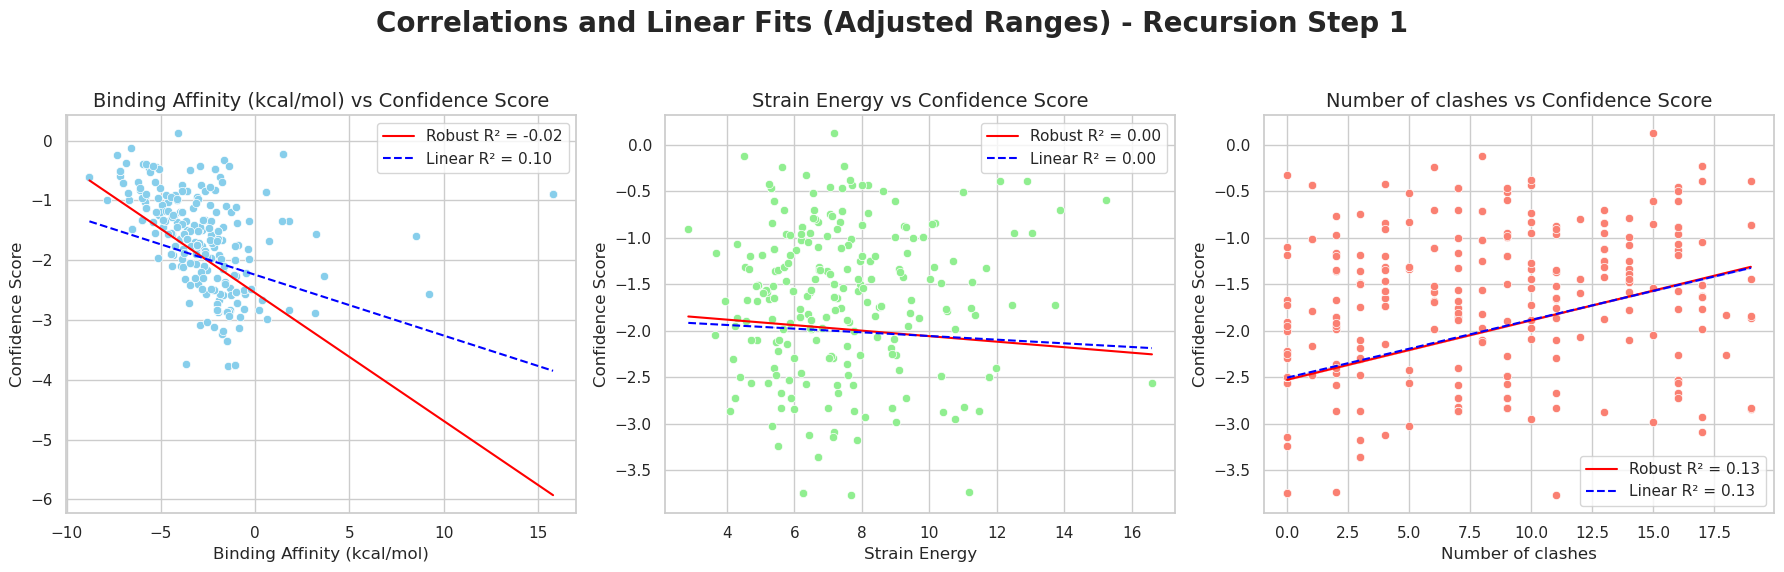

Total number of data points for recursion step 2/5: 52


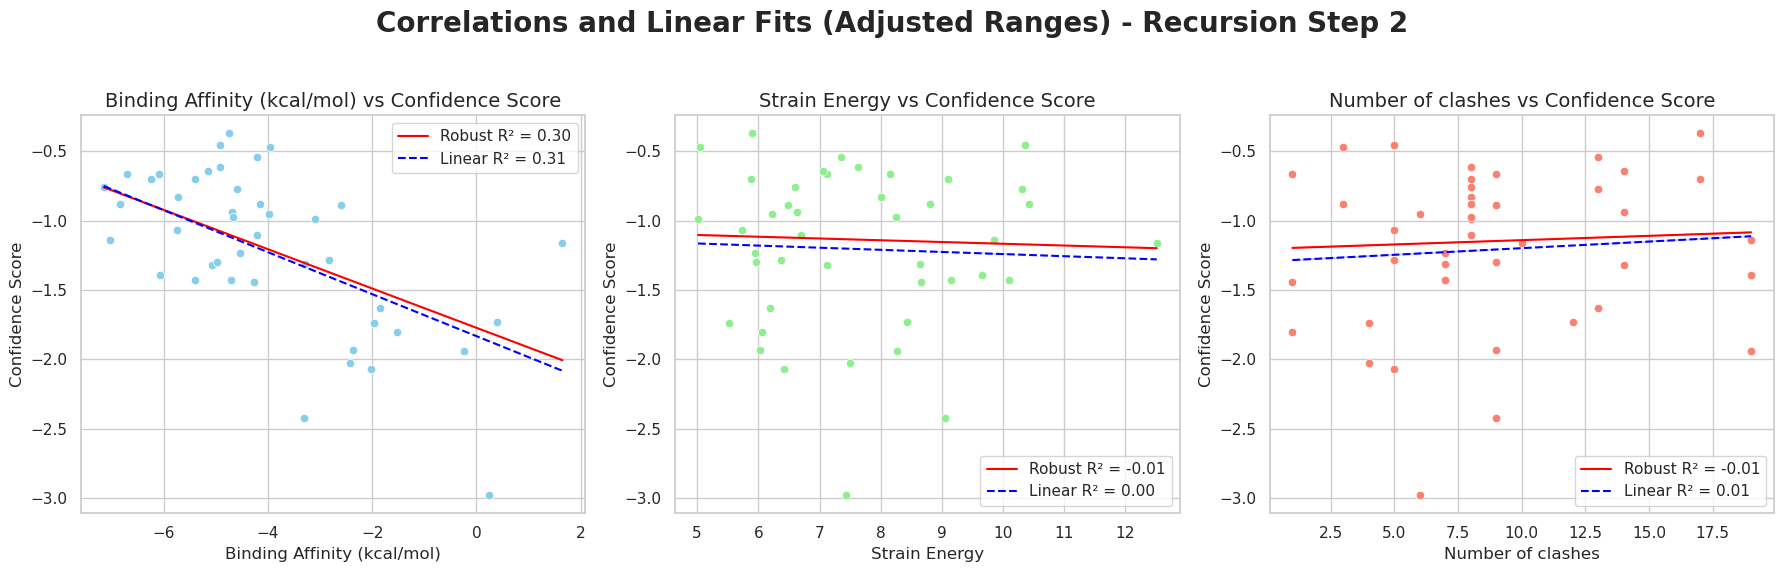

Total number of data points for recursion step 3/5: 24


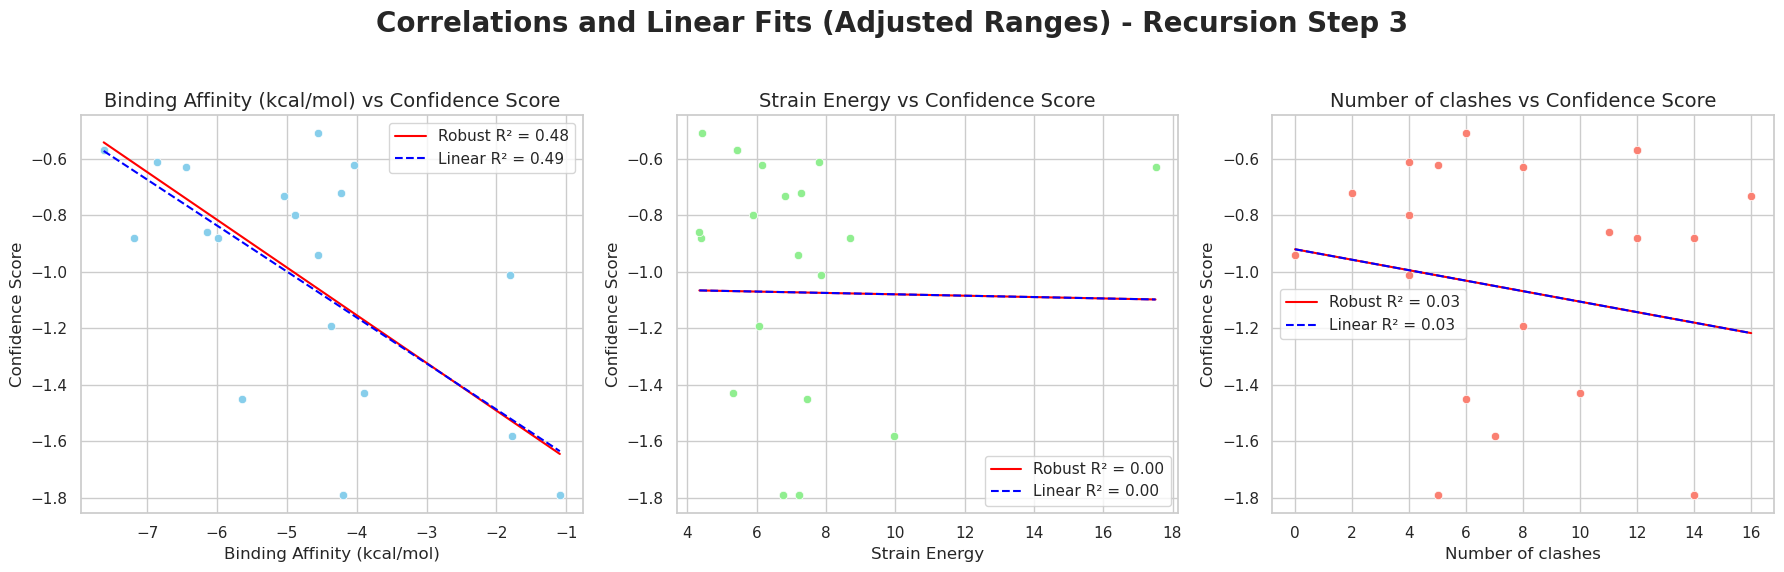

Total number of data points for recursion step 4/5: 13


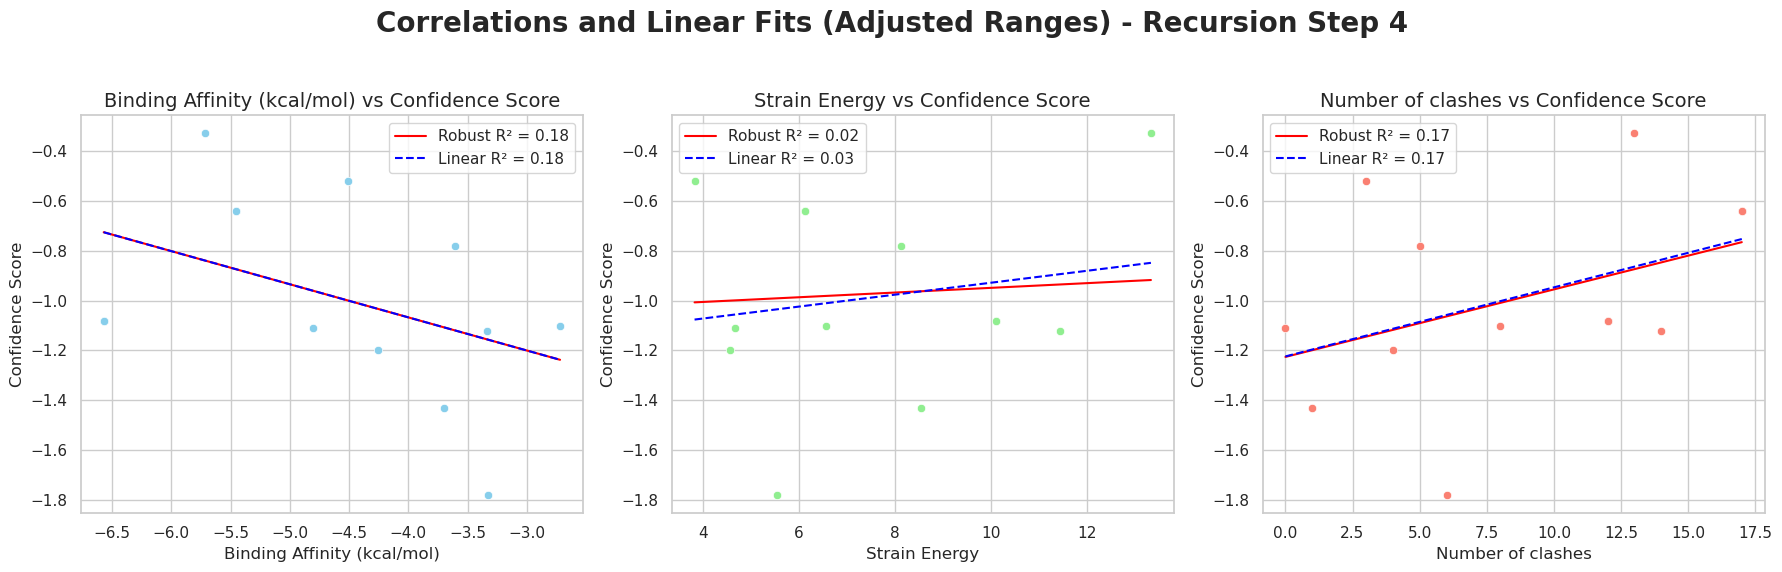

Total number of data points for recursion step 5/5: 7


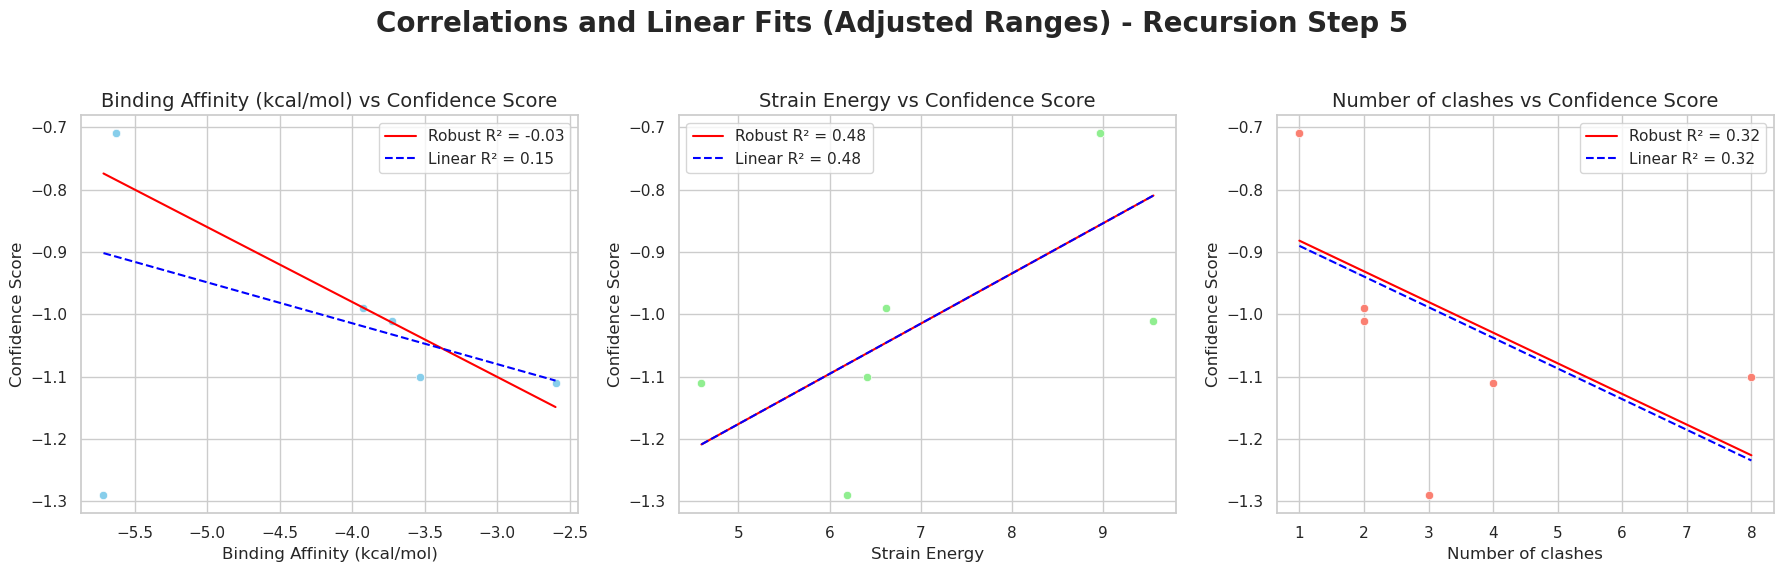

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm

def plot_correlation_with_fit(data, recursion_step):
    # Filter data based on the specified ranges
    filtered_data = data[
        (data['Confidence Score'] >= -5) & (data['Confidence Score'] <= 5) &
        (data['Binding Affinity (kcal/mol)'] >= -20) & (data['Binding Affinity (kcal/mol)'] <= 20) &
        (data['Strain Energy'] >= -20) & (data['Strain Energy'] <= 20)
    ]

    # Preparing the figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations and Linear Fits (Adjusted Ranges) - Recursion Step {recursion_step}', fontsize=20, fontweight='bold')

    # Defining metrics pairs for correlation
    metrics_pairs = [
        ('Binding Affinity (kcal/mol)', 'Confidence Score'),
        ('Strain Energy', 'Confidence Score'),
        ('Number of clashes', 'Confidence Score')
    ]

    colors = ['skyblue', 'lightgreen', 'salmon']

    for i, (x_metric, y_metric) in enumerate(metrics_pairs):
        # Scatter plot
        sns.scatterplot(data=filtered_data, x=x_metric, y=y_metric, ax=axes[i], color=colors[i])
        
        # Robust linear model
        X = sm.add_constant(filtered_data[x_metric])  # Adding a constant for the intercept
        robust_model = sm.RLM(filtered_data[y_metric], X, M=sm.robust.norms.HuberT())
        robust_results = robust_model.fit()
        
        # Calculate R^2 score for robust model
        y_pred_robust = robust_results.predict(X)
        r2_robust = r2_score(filtered_data[y_metric], y_pred_robust)
        
        # Linear model
        coef = np.polyfit(filtered_data[x_metric], filtered_data[y_metric], 1)
        poly1d_fn = np.poly1d(coef) 
        
        # Calculate R^2 score for linear model
        y_pred_linear = poly1d_fn(filtered_data[x_metric])
        r2_linear = r2_score(filtered_data[y_metric], y_pred_linear)
        
        # Plot robust fit and linear fit
        sns.lineplot(x=filtered_data[x_metric], y=y_pred_robust, ax=axes[i], color='red', label=f'Robust R² = {r2_robust:.2f}')
        sns.lineplot(x=filtered_data[x_metric], y=poly1d_fn(filtered_data[x_metric]), ax=axes[i], color='blue', label=f'Linear R² = {r2_linear:.2f}', linestyle='--')
        
        axes[i].set_title(f'{x_metric} vs {y_metric}', fontsize=14)
        axes[i].set_xlabel(x_metric, fontsize=12)
        axes[i].set_ylabel(y_metric, fontsize=12)
        axes[i].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_correlation_with_fit(data, step)


## Comparison of Same Size Recursived Proteins

Now we are comparising the the Proteins which completed 5/5 Recursion step. First we seperate the results in `Recursion Step Done` values. Each `csv` file must be same number of `Protein ID`!

In [11]:
def filter_data_for_recursion_step(recursion_step, base_dir, filtered_proteins_file, summary_file_template, output_file_template):
    # Load the file with filtered Protein IDs
    filtered_proteins_df = pd.read_csv(filtered_proteins_file)
    filtered_proteins = filtered_proteins_df['Protein ID']
    
    # Format the file name for the current recursion step
    summary_file_path = summary_file_template.format(recursion_step)
    
    # Load the summary data for the current recursion step
    summary_data = pd.read_csv(summary_file_path)

    filtered_data = data[
        (data['Recursion Step Done'] == recursion_step) &
        (data['Binding Affinity (kcal/mol)'] < 20) &
        (data['Number of clashes'] < 20) &
        (data['Strain Energy'] < 20) &
        (data['Confidence Score'] > -10)
    ]
    
    # Filter the summary data for the current recursion step
    filtered_summary_new = summary_data[summary_data['Protein ID'].isin(filtered_proteins) & 
        (summary_data['Recursion Step Done'] == f'{recursion_step}/5') & 
        (summary_data['Binding Affinity (kcal/mol)'] < 1000)
        
        ]
    
    # Save the filtered data to a new CSV file
    output_file_path = output_file_template.format(recursion_step)
    filtered_summary_new.to_csv(output_file_path, index=False)
    
    print(f"Filtered data for recursion step {recursion_step}/5 saved to: {output_file_path}")

# Base directory and file patterns
base_dir = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/'
filtered_proteins_file = base_dir + 'filtered_summary_gene_id_lip_ms_rec_5.csv'
summary_file_template = base_dir + 'summary_gene_id_lip_ms.csv' 
output_file_template = base_dir + 'filtered_proteins_from_summary_gene_id_lip_ms_rec_{}.csv'

# Loop through each recursion step
for step in range(1, 6):
    filter_data_for_recursion_step(step, base_dir, filtered_proteins_file, summary_file_template, output_file_template)


Filtered data for recursion step 1/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/filtered_proteins_from_summary_gene_id_lip_ms_rec_1.csv
Filtered data for recursion step 2/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/filtered_proteins_from_summary_gene_id_lip_ms_rec_2.csv
Filtered data for recursion step 3/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/filtered_proteins_from_summary_gene_id_lip_ms_rec_3.csv
Filtered data for recursion step 4/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/filtered_proteins_from_summary_gene_id_lip_ms_rec_4.csv
Filtered data for recursion step 5/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/filtered_proteins_from_summary_gene_id_lip_ms_rec_5.csv


## Read Each Seperated Files (Each Shows Recursion Steps)

In [12]:
# Loop over the recursion steps and read each file
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    print(f'First few rows of the dataframe for recursion step {step}/5:')
    display(data.head())

Total number of data points for recursion step 1/5: 51
First few rows of the dataframe for recursion step 1/5:


gene_name interpro_id                  af_id             Protein ID  \
0      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
1      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
2      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
3      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
4      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   

  Recursion Step Done  Ligand Description  Binding Affinity (kcal/mol)  \
0                 1/5                 NaN                    -5.836058   
1                 1/5                 NaN                    -5.836058   
2                 1/5                 NaN                    -5.836058   
3                 1/5                 NaN                    -5.836058   
4                 1/5                 NaN                    -5.836058   

   Number of clashes  Strain Energy  Confidence Score  ... GeneID  \
0                  8       6.196821             -1.03  ...   ldha   
1                  8       6.196821             -1.03  ...   ldha   
2                  8       6.196821             -1.03  ...   ldha   
3                  8       6.196821             -1.03  ...   ldha   
4                  8       6.196821             -1.03  ...   ldha   

                                 Protein description  Protein name  \
0  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
1  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
2  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
3  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
4  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   

                             GO.Cellular.Component  \
0  nucleus,cytosol,membrane,extracellular exosome;   
1  nucleus,cytosol,membrane,extracellular exosome;   
2  nucleus,cytosol,membrane,extracellular exosome;   
3  nucleus,cytosol,membrane,extracellular exosome;   
4  nucleus,cytosol,membrane,extracellular exosome;   

                               GO.Molecular.Function  \
0  L-lactate dehydrogenase activity,protein bindi...   
1  L-lactate dehydrogenase activity,protein bindi...   
2  L-lactate dehydrogenase activity,protein bindi...   
3  L-lactate dehydrogenase activity,protein bindi...   
4  L-lactate dehydrogenase activity,protein bindi...   

                               GO.Biological.Process  sequence coverage  \
0  response to hypoxia,lactate metabolic process,...          88%;88%-3   
1  response to hypoxia,lactate metabolic process,...          88%;88%-3   
2  response to hypoxia,lactate metabolic process,...      87.3%;87.3%-3   
3  response to hypoxia,lactate metabolic process,...      87.3%;87.3%-3   
4  response to hypoxia,lactate metabolic process,...          88%;88%-3   

                        Peptide sequence correlation index    EC50 (uM)  
0                            _KFIIPNVVK_          0.790959  1212.566989  
1                     _KDLADELALVDVIEDK_          0.623764   903.772487  
2  _NRVIGSGC[Carbamidomethyl (C)]NLDSAR_          0.522257  8817.443856  
3           _SVADLAESIM[Oxidation (M)]K_          0.471124  1202.873068  
4                       _IVSGKDYNVTANSK_          0.460411  1039.384484  

[5 rows x 27 columns]

Total number of data points for recursion step 2/5: 51
First few rows of the dataframe for recursion step 2/5:


gene_name interpro_id                  af_id             Protein ID  \
0      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
1      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
2      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
3      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
4      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   

  Recursion Step Done                                 Ligand Description  \
0                 2/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1                 2/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2                 2/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3                 2/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4                 2/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -5.739118                  8       8.009741   
1                    -5.739118                  8       8.009741   
2                    -5.739118                  8       8.009741   
3                    -5.739118                  8       8.009741   
4                    -5.739118                  8       8.009741   

   Confidence Score  ... GeneID  \
0             -0.83  ...   ldha   
1             -0.83  ...   ldha   
2             -0.83  ...   ldha   
3             -0.83  ...   ldha   
4             -0.83  ...   ldha   

                                 Protein description  Protein name  \
0  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
1  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
2  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
3  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
4  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   

                             GO.Cellular.Component  \
0  nucleus,cytosol,membrane,extracellular exosome;   
1  nucleus,cytosol,membrane,extracellular exosome;   
2  nucleus,cytosol,membrane,extracellular exosome;   
3  nucleus,cytosol,membrane,extracellular exosome;   
4  nucleus,cytosol,membrane,extracellular exosome;   

                               GO.Molecular.Function  \
0  L-lactate dehydrogenase activity,protein bindi...   
1  L-lactate dehydrogenase activity,protein bindi...   
2  L-lactate dehydrogenase activity,protein bindi...   
3  L-lactate dehydrogenase activity,protein bindi...   
4  L-lactate dehydrogenase activity,protein bindi...   

                               GO.Biological.Process  sequence coverage  \
0  response to hypoxia,lactate metabolic process,...          88%;88%-3   
1  response to hypoxia,lactate metabolic process,...          88%;88%-3   
2  response to hypoxia,lactate metabolic process,...      87.3%;87.3%-3   
3  response to hypoxia,lactate metabolic process,...      87.3%;87.3%-3   
4  response to hypoxia,lactate metabolic process,...          88%;88%-3   

                        Peptide sequence correlation index    EC50 (uM)  
0                            _KFIIPNVVK_          0.790959  1212.566989  
1                     _KDLADELALVDVIEDK_          0.623764   903.772487  
2  _NRVIGSGC[Carbamidomethyl (C)]NLDSAR_          0.522257  8817.443856  
3           _SVADLAESIM[Oxidation (M)]K_          0.471124  1202.873068  
4                       _IVSGKDYNVTANSK_          0.460411  1039.384484  

[5 rows x 27 columns]

Total number of data points for recursion step 3/5: 51
First few rows of the dataframe for recursion step 3/5:


gene_name interpro_id                  af_id             Protein ID  \
0      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
1      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
2      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
3      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
4      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   

  Recursion Step Done                                 Ligand Description  \
0                 3/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1                 3/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2                 3/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3                 3/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4                 3/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -4.882176                  4       5.883193   
1                    -4.882176                  4       5.883193   
2                    -4.882176                  4       5.883193   
3                    -4.882176                  4       5.883193   
4                    -4.882176                  4       5.883193   

   Confidence Score  ... GeneID  \
0              -0.8  ...   ldha   
1              -0.8  ...   ldha   
2              -0.8  ...   ldha   
3              -0.8  ...   ldha   
4              -0.8  ...   ldha   

                                 Protein description  Protein name  \
0  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
1  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
2  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
3  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
4  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   

                             GO.Cellular.Component  \
0  nucleus,cytosol,membrane,extracellular exosome;   
1  nucleus,cytosol,membrane,extracellular exosome;   
2  nucleus,cytosol,membrane,extracellular exosome;   
3  nucleus,cytosol,membrane,extracellular exosome;   
4  nucleus,cytosol,membrane,extracellular exosome;   

                               GO.Molecular.Function  \
0  L-lactate dehydrogenase activity,protein bindi...   
1  L-lactate dehydrogenase activity,protein bindi...   
2  L-lactate dehydrogenase activity,protein bindi...   
3  L-lactate dehydrogenase activity,protein bindi...   
4  L-lactate dehydrogenase activity,protein bindi...   

                               GO.Biological.Process  sequence coverage  \
0  response to hypoxia,lactate metabolic process,...          88%;88%-3   
1  response to hypoxia,lactate metabolic process,...          88%;88%-3   
2  response to hypoxia,lactate metabolic process,...      87.3%;87.3%-3   
3  response to hypoxia,lactate metabolic process,...      87.3%;87.3%-3   
4  response to hypoxia,lactate metabolic process,...          88%;88%-3   

                        Peptide sequence correlation index    EC50 (uM)  
0                            _KFIIPNVVK_          0.790959  1212.566989  
1                     _KDLADELALVDVIEDK_          0.623764   903.772487  
2  _NRVIGSGC[Carbamidomethyl (C)]NLDSAR_          0.522257  8817.443856  
3           _SVADLAESIM[Oxidation (M)]K_          0.471124  1202.873068  
4                       _IVSGKDYNVTANSK_          0.460411  1039.384484  

[5 rows x 27 columns]

Total number of data points for recursion step 4/5: 51
First few rows of the dataframe for recursion step 4/5:


gene_name interpro_id                  af_id             Protein ID  \
0      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
1      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
2      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
3      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
4      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   

  Recursion Step Done                                 Ligand Description  \
0                 4/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1                 4/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2                 4/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3                 4/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4                 4/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -6.571077                 12      10.095067   
1                    -6.571077                 12      10.095067   
2                    -6.571077                 12      10.095067   
3                    -6.571077                 12      10.095067   
4                    -6.571077                 12      10.095067   

   Confidence Score  ... GeneID  \
0             -1.08  ...   ldha   
1             -1.08  ...   ldha   
2             -1.08  ...   ldha   
3             -1.08  ...   ldha   
4             -1.08  ...   ldha   

                                 Protein description  Protein name  \
0  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
1  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
2  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
3  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
4  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   

                             GO.Cellular.Component  \
0  nucleus,cytosol,membrane,extracellular exosome;   
1  nucleus,cytosol,membrane,extracellular exosome;   
2  nucleus,cytosol,membrane,extracellular exosome;   
3  nucleus,cytosol,membrane,extracellular exosome;   
4  nucleus,cytosol,membrane,extracellular exosome;   

                               GO.Molecular.Function  \
0  L-lactate dehydrogenase activity,protein bindi...   
1  L-lactate dehydrogenase activity,protein bindi...   
2  L-lactate dehydrogenase activity,protein bindi...   
3  L-lactate dehydrogenase activity,protein bindi...   
4  L-lactate dehydrogenase activity,protein bindi...   

                               GO.Biological.Process  sequence coverage  \
0  response to hypoxia,lactate metabolic process,...          88%;88%-3   
1  response to hypoxia,lactate metabolic process,...          88%;88%-3   
2  response to hypoxia,lactate metabolic process,...      87.3%;87.3%-3   
3  response to hypoxia,lactate metabolic process,...      87.3%;87.3%-3   
4  response to hypoxia,lactate metabolic process,...          88%;88%-3   

                        Peptide sequence correlation index    EC50 (uM)  
0                            _KFIIPNVVK_          0.790959  1212.566989  
1                     _KDLADELALVDVIEDK_          0.623764   903.772487  
2  _NRVIGSGC[Carbamidomethyl (C)]NLDSAR_          0.522257  8817.443856  
3           _SVADLAESIM[Oxidation (M)]K_          0.471124  1202.873068  
4                       _IVSGKDYNVTANSK_          0.460411  1039.384484  

[5 rows x 27 columns]

Total number of data points for recursion step 5/5: 51
First few rows of the dataframe for recursion step 5/5:


gene_name interpro_id                  af_id             Protein ID  \
0      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
1      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
2      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
3      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   
4      ldha      P00338  AF-P00338-F1-model_v3  AF-P00338-F1-model_v3   

  Recursion Step Done                                 Ligand Description  \
0                 5/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1                 5/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2                 5/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3                 5/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4                 5/5  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                     -5.62681                  1       8.968754   
1                     -5.62681                  1       8.968754   
2                     -5.62681                  1       8.968754   
3                     -5.62681                  1       8.968754   
4                     -5.62681                  1       8.968754   

   Confidence Score  ... GeneID  \
0             -0.71  ...   ldha   
1             -0.71  ...   ldha   
2             -0.71  ...   ldha   
3             -0.71  ...   ldha   
4             -0.71  ...   ldha   

                                 Protein description  Protein name  \
0  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
1  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
2  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
3  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   
4  L-lactate dehydrogenase A chain;Isoform 3 of L...    LDHA_HUMAN   

                             GO.Cellular.Component  \
0  nucleus,cytosol,membrane,extracellular exosome;   
1  nucleus,cytosol,membrane,extracellular exosome;   
2  nucleus,cytosol,membrane,extracellular exosome;   
3  nucleus,cytosol,membrane,extracellular exosome;   
4  nucleus,cytosol,membrane,extracellular exosome;   

                               GO.Molecular.Function  \
0  L-lactate dehydrogenase activity,protein bindi...   
1  L-lactate dehydrogenase activity,protein bindi...   
2  L-lactate dehydrogenase activity,protein bindi...   
3  L-lactate dehydrogenase activity,protein bindi...   
4  L-lactate dehydrogenase activity,protein bindi...   

                               GO.Biological.Process  sequence coverage  \
0  response to hypoxia,lactate metabolic process,...          88%;88%-3   
1  response to hypoxia,lactate metabolic process,...          88%;88%-3   
2  response to hypoxia,lactate metabolic process,...      87.3%;87.3%-3   
3  response to hypoxia,lactate metabolic process,...      87.3%;87.3%-3   
4  response to hypoxia,lactate metabolic process,...          88%;88%-3   

                        Peptide sequence correlation index    EC50 (uM)  
0                            _KFIIPNVVK_          0.790959  1212.566989  
1                     _KDLADELALVDVIEDK_          0.623764   903.772487  
2  _NRVIGSGC[Carbamidomethyl (C)]NLDSAR_          0.522257  8817.443856  
3           _SVADLAESIM[Oxidation (M)]K_          0.471124  1202.873068  
4                       _IVSGKDYNVTANSK_          0.460411  1039.384484  

[5 rows x 27 columns]

## Data Distributions of Each Recursive Step

Total number of data points for recursion step 1/5: 51


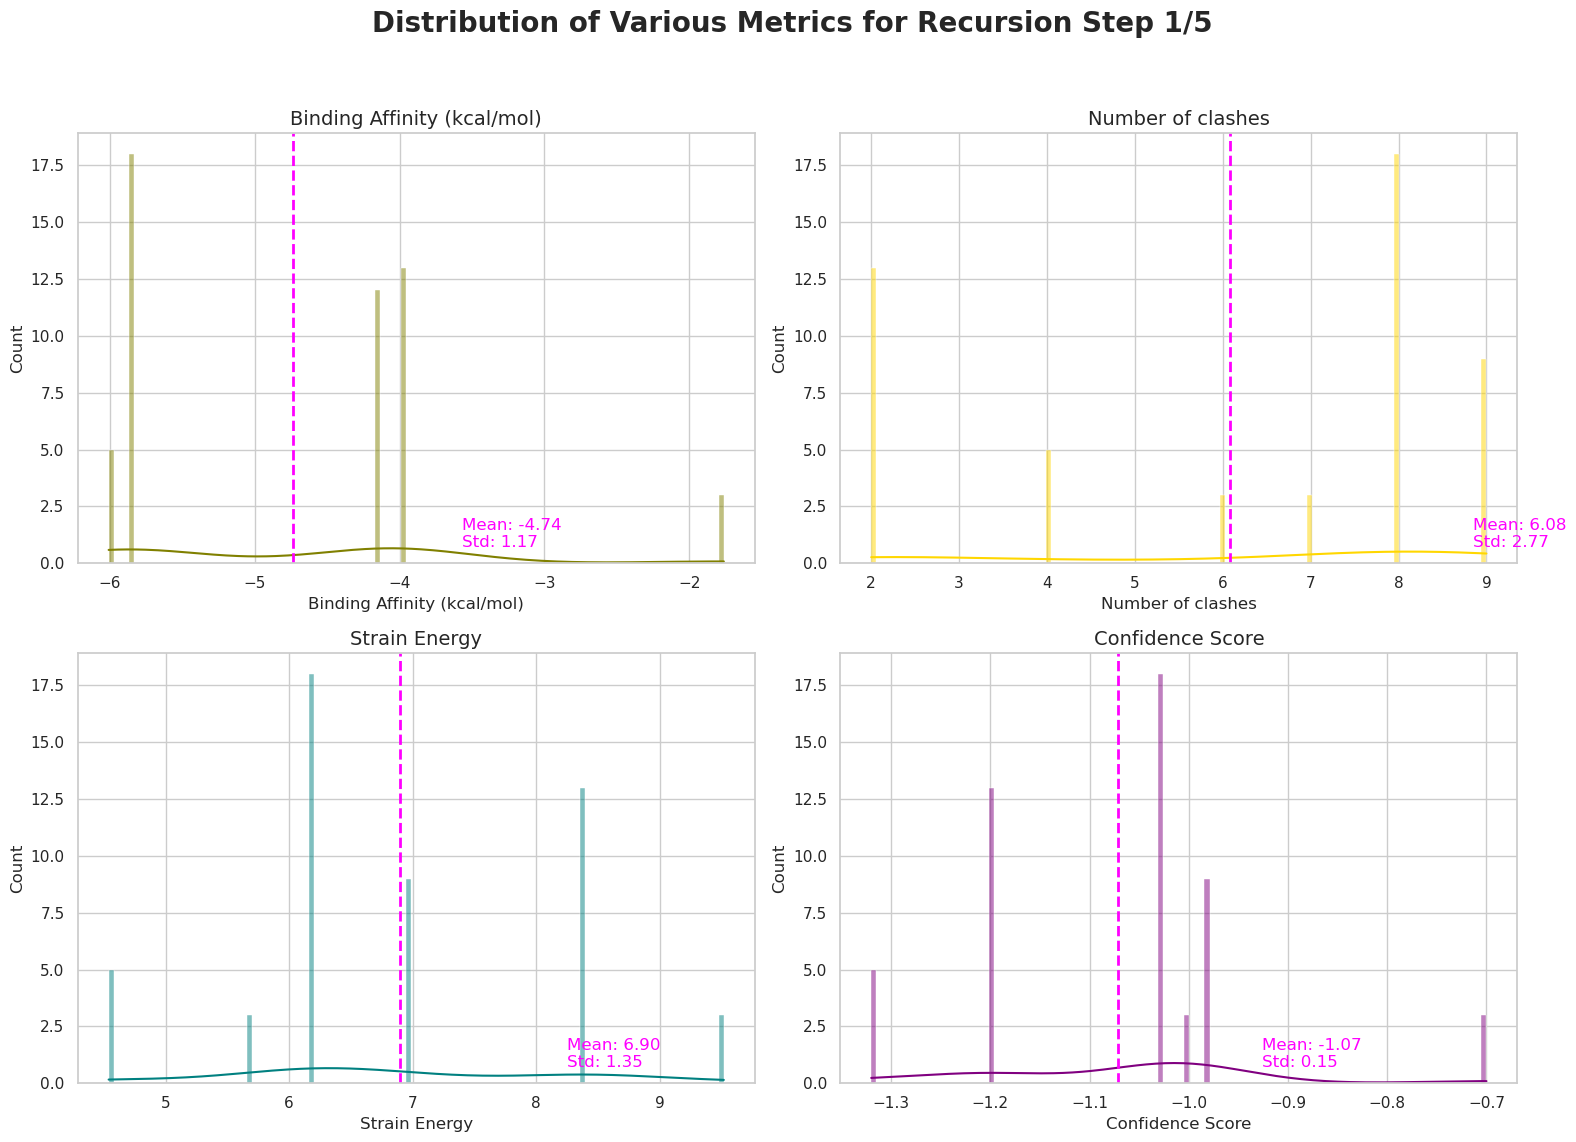

Total number of data points for recursion step 2/5: 51


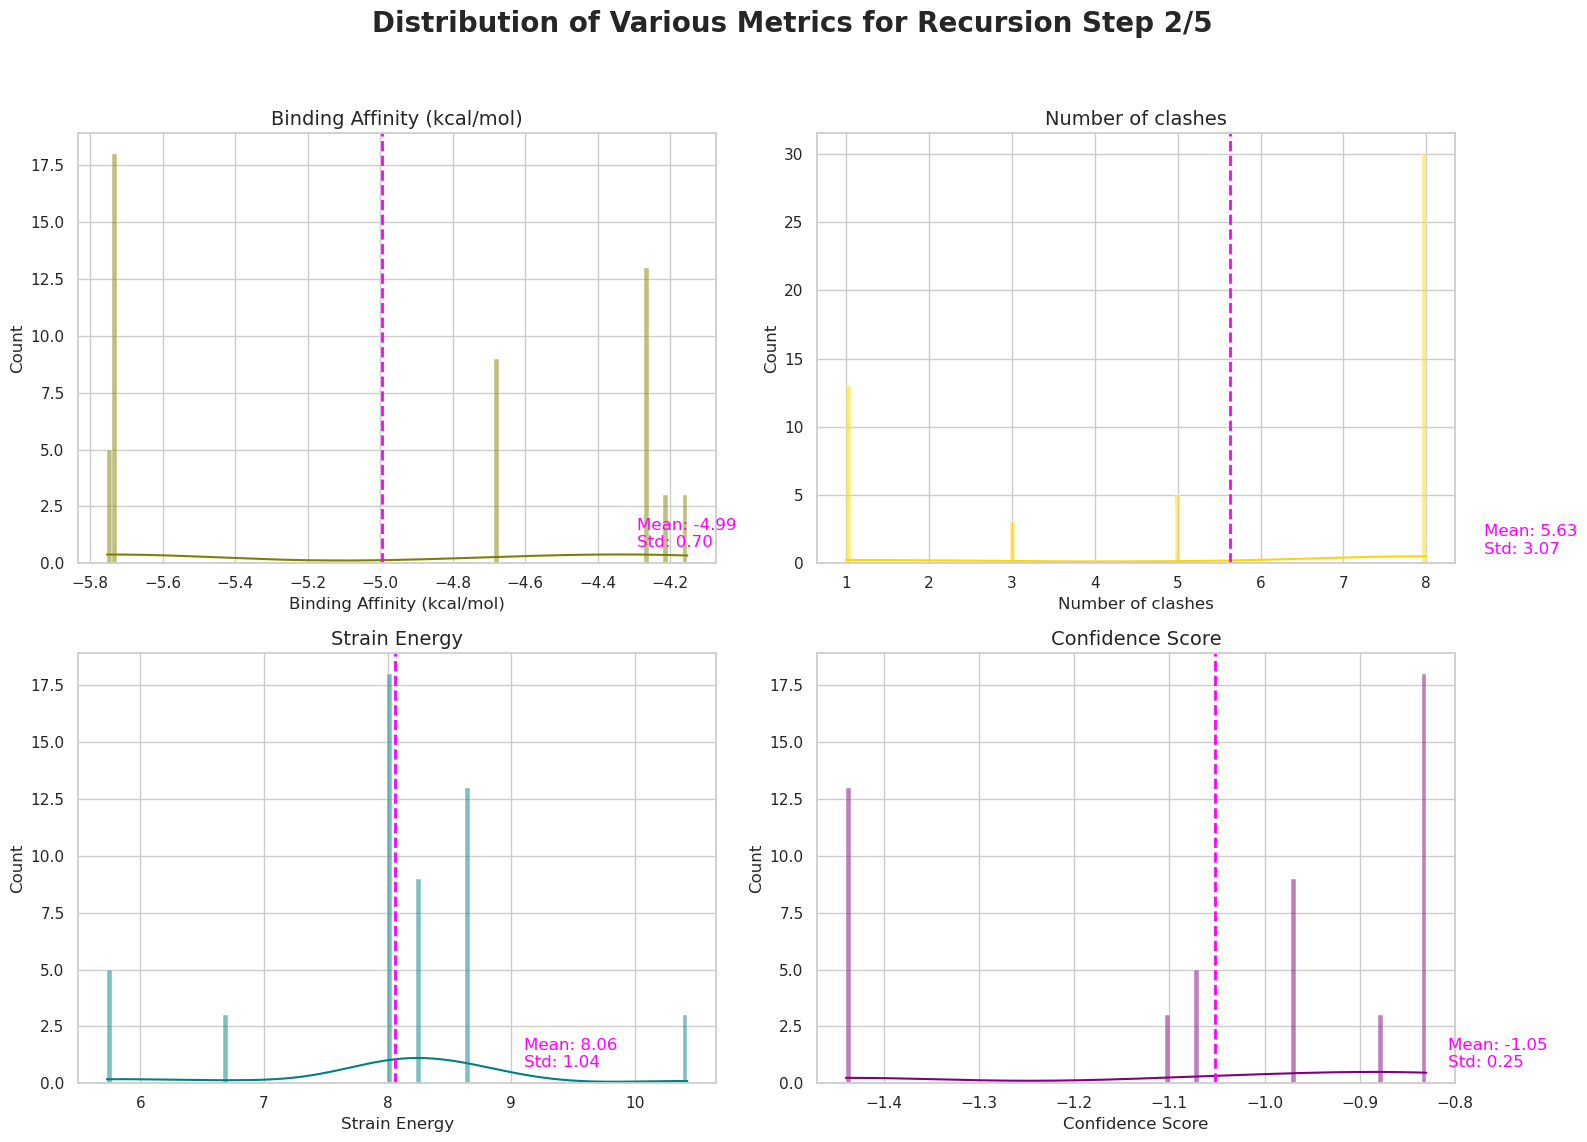

Total number of data points for recursion step 3/5: 51


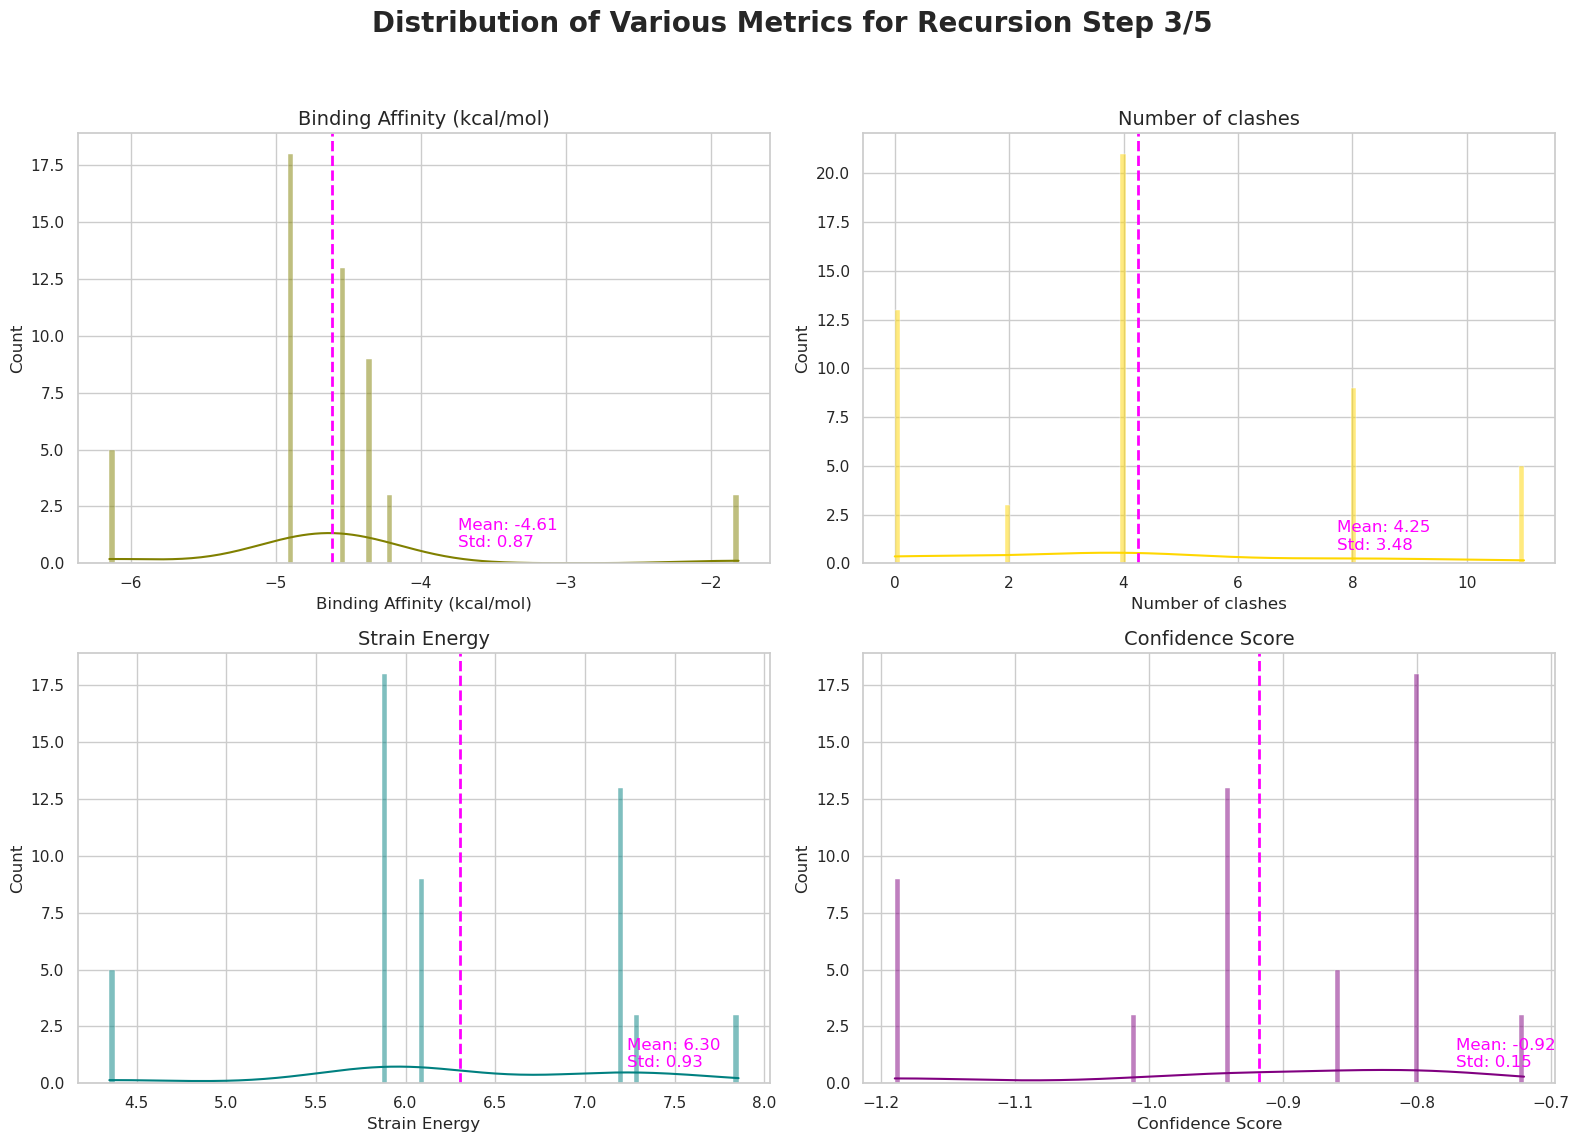

Total number of data points for recursion step 4/5: 51


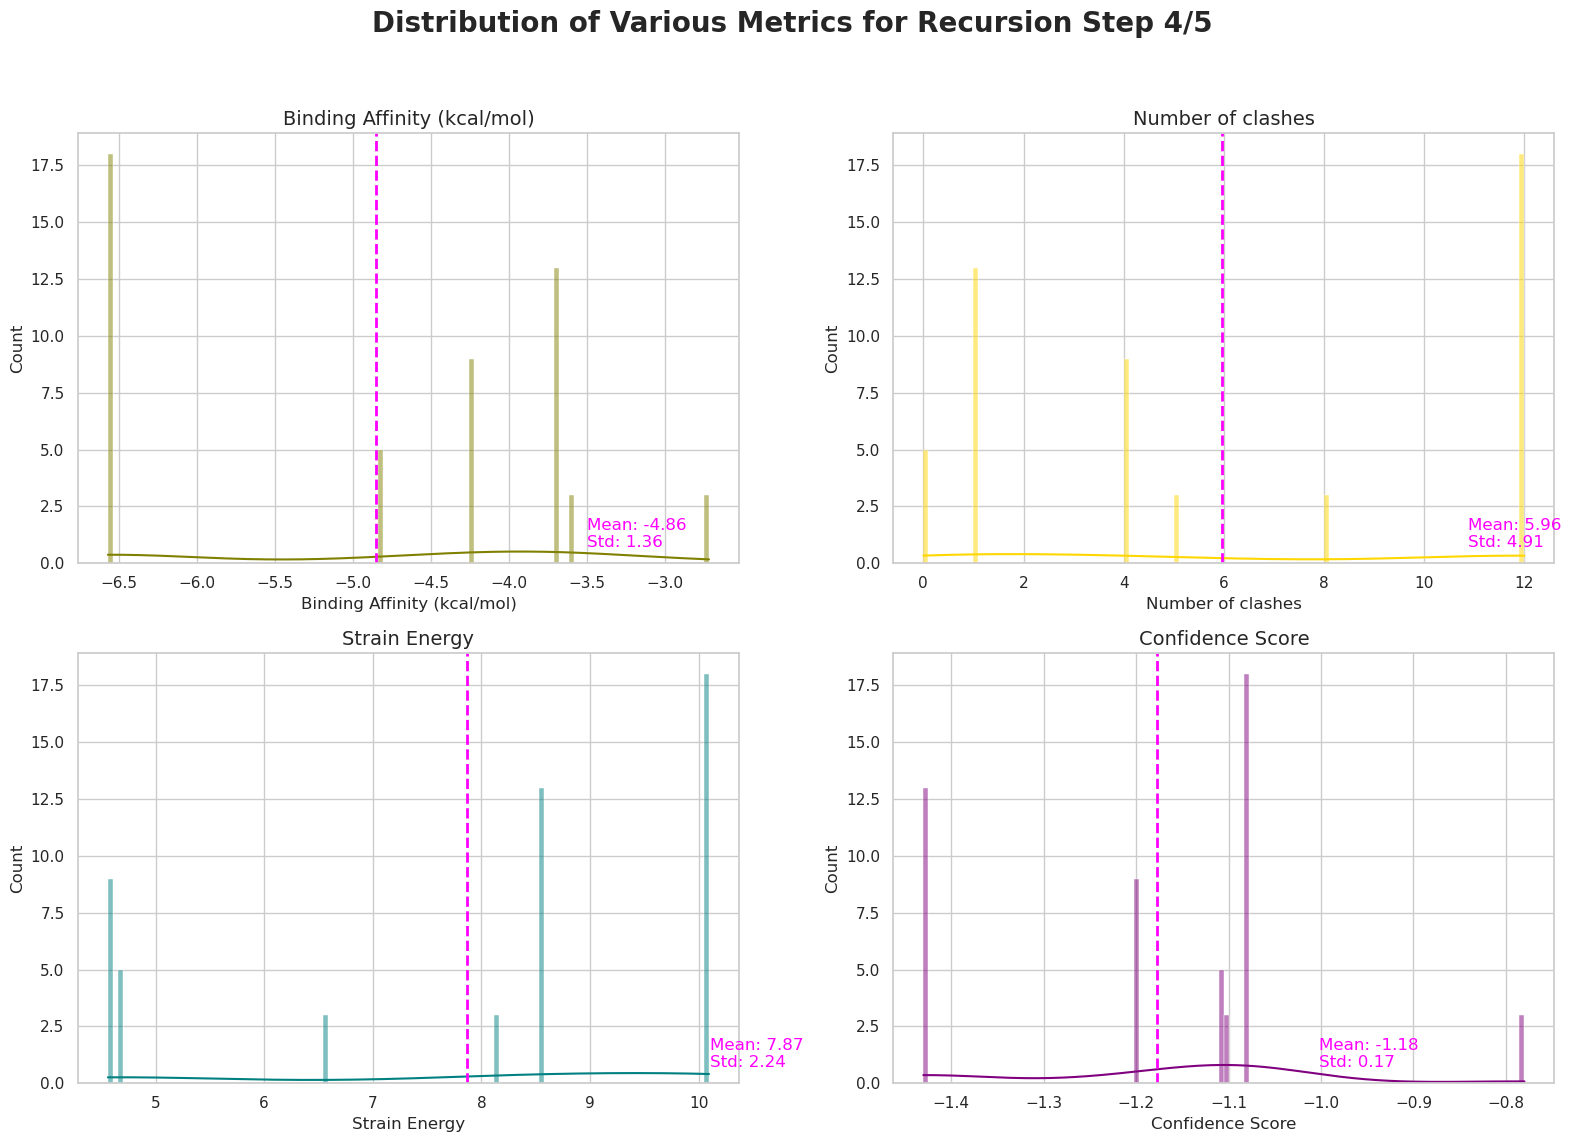

Total number of data points for recursion step 5/5: 51


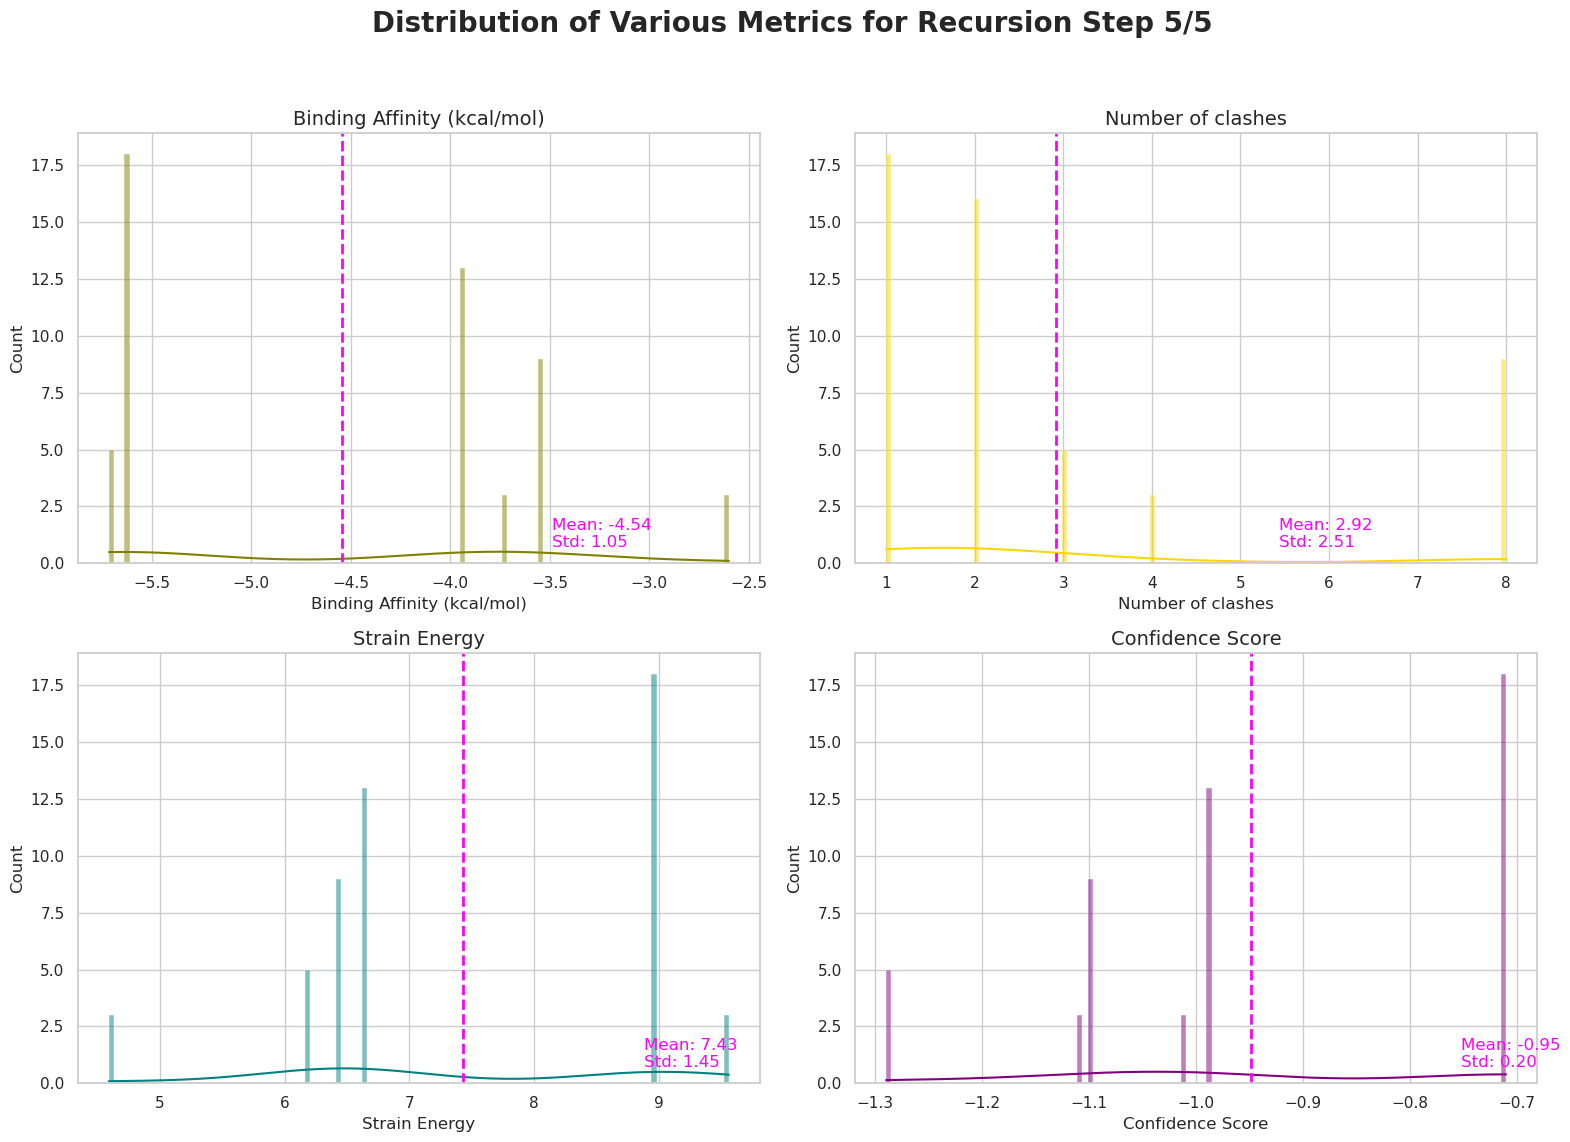

In [13]:
# Function to plot distributions of metrics from a given dataset
def plot_metrics_distributions(data, figure_title):
    # Set the overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Prepare the figure with a larger size for better readability
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Increased figure size for better legibility
    fig.suptitle(figure_title, fontsize=20, fontweight='bold')

    # Define a common bin size for comparable scales
    common_bins = 120  # Example bin size, adjust based on your data distribution

    # List of metrics to plot
    metrics = ['Binding Affinity (kcal/mol)', 'Number of clashes', 'Strain Energy', 'Confidence Score']
    colors = ['olive', 'gold', 'teal', 'purple']

    # Plotting distributions
    for i, metric in enumerate(metrics):
        ax = axes.flat[i]
        sns.histplot(data=data, x=metric, kde=True, ax=ax, color=colors[i], bins=common_bins)
        ax.set_title(metric, fontsize=14)
        ax.grid(True)

        # Calculate mean and std, and annotate on the plots
        mean_value = data[metric].mean()
        std_value = data[metric].std()
        ax.axvline(mean_value, color='magenta', linestyle='dashed', linewidth=2)
        ax.text(mean_value + std_value, 0.7, f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}', color='magenta', ha='left')

    # Adjust layout for a clean look and ensure the titles and labels don't overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show plot
    plt.show()


# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_metrics_distributions(data, f'Distribution of Various Metrics for Recursion Step {step}/5')


## Data Distribution Ranges of Each Recursive Step

Total number of data points for recursion step 1/5: 51


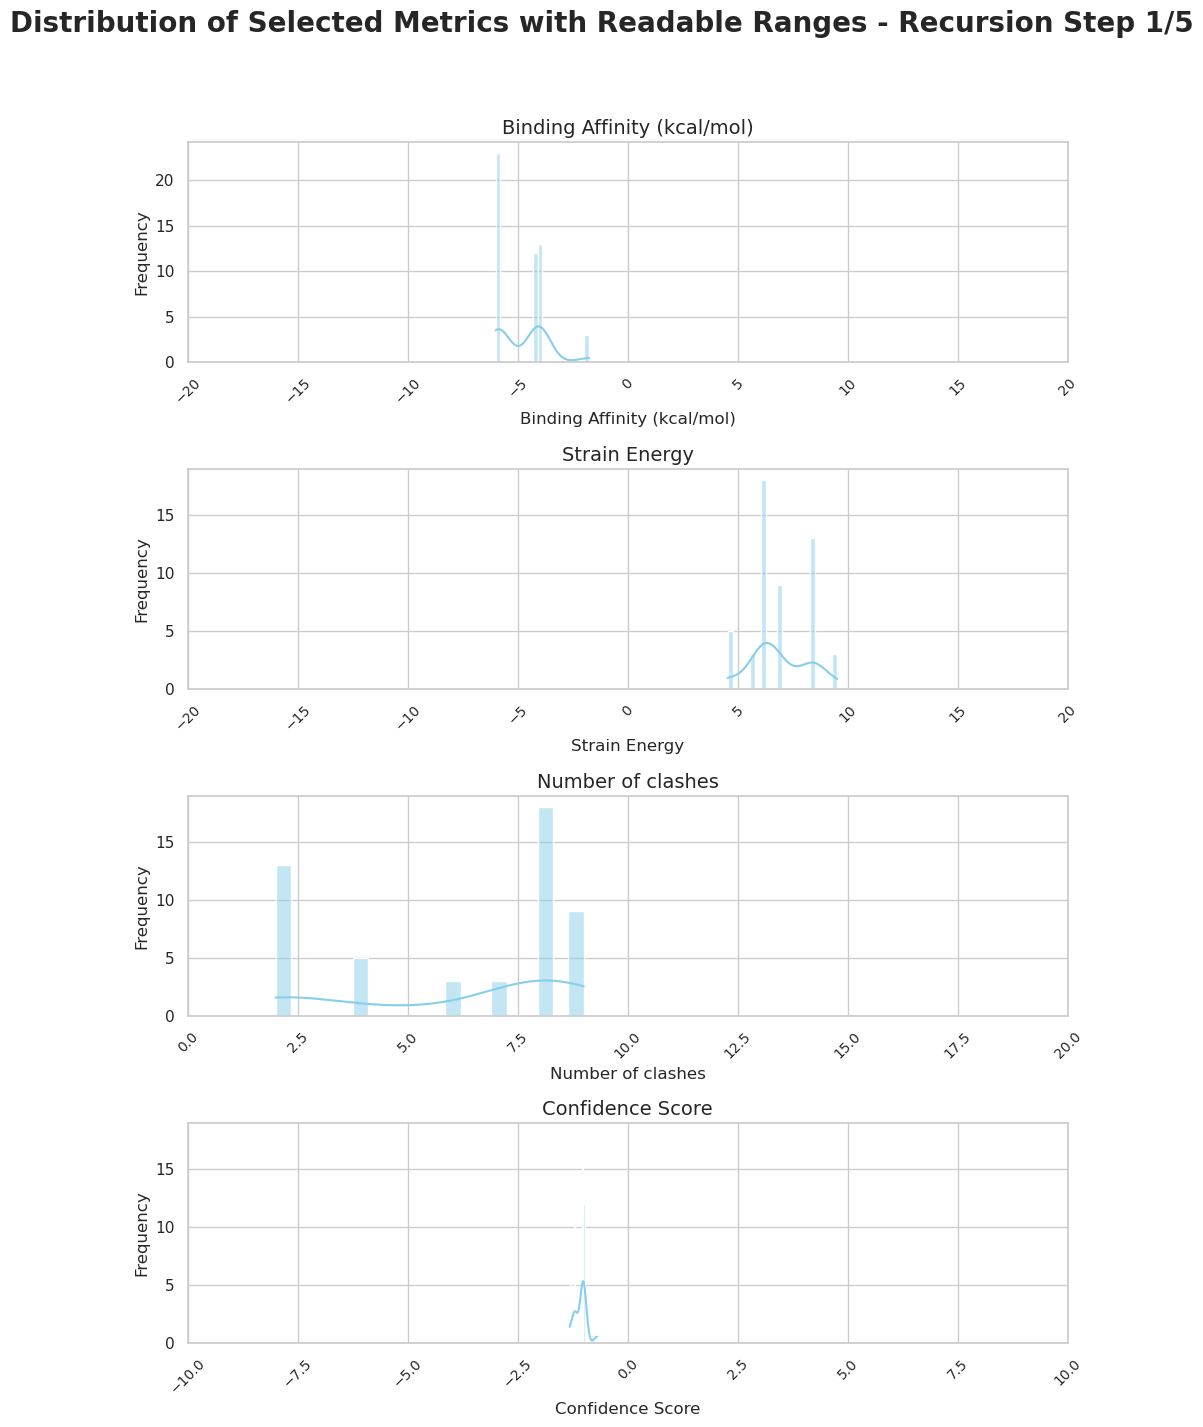

Total number of data points for recursion step 2/5: 51


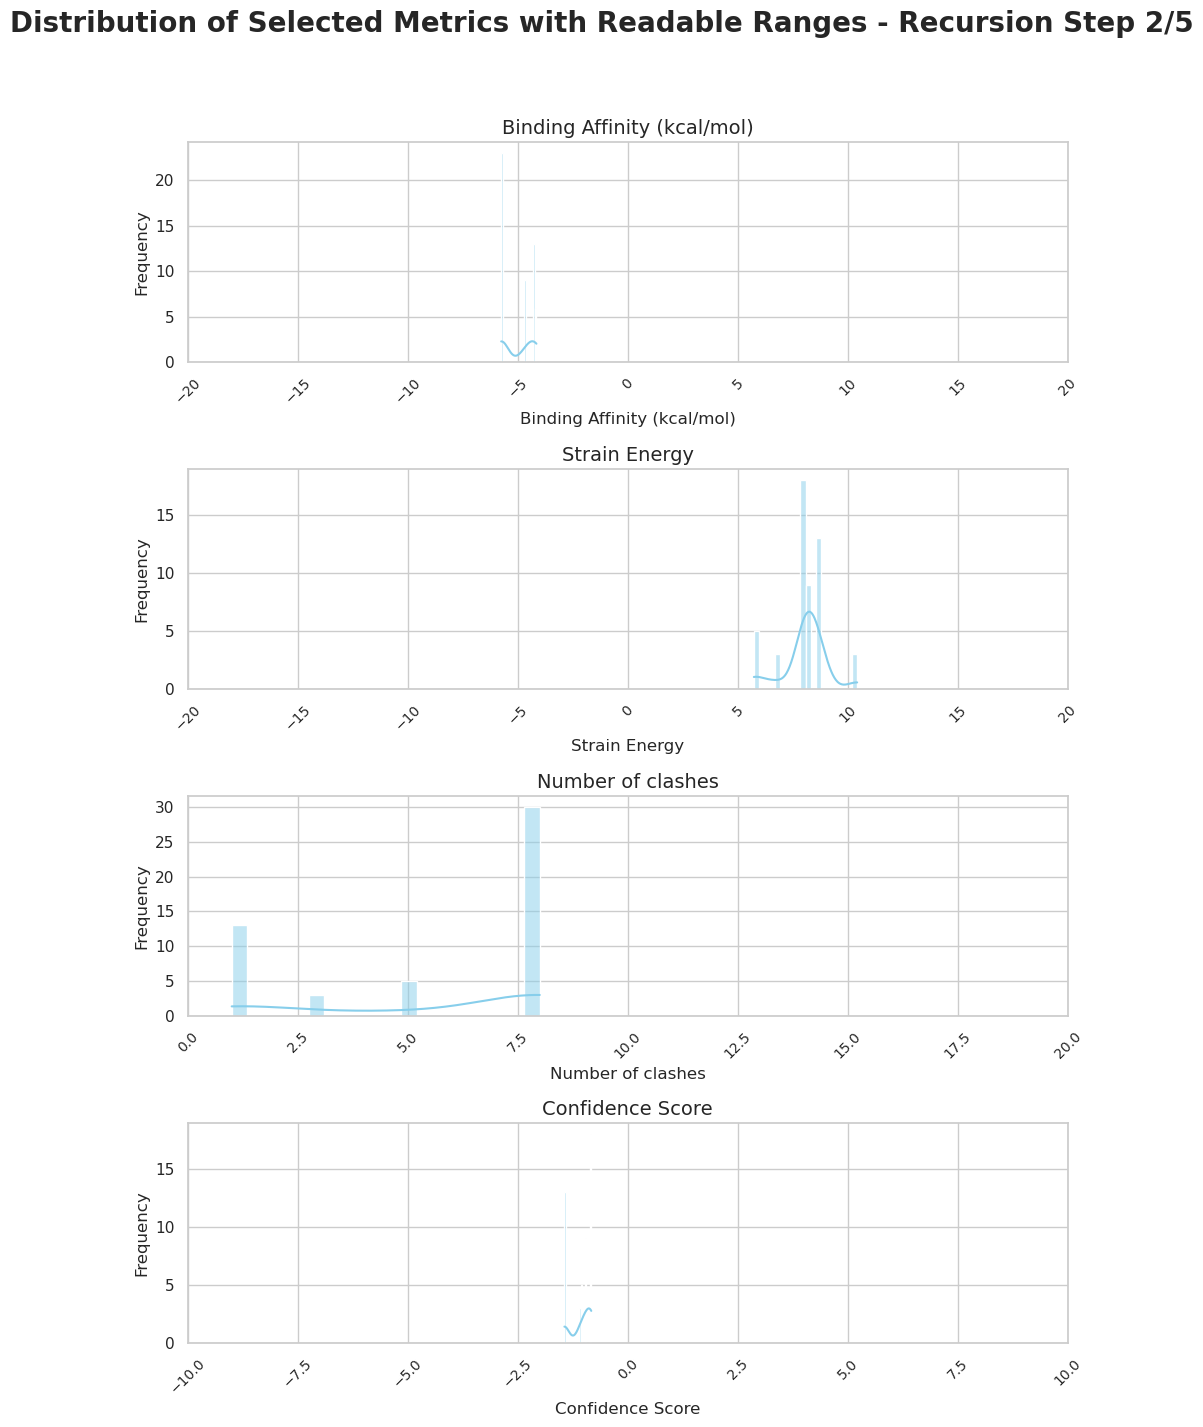

Total number of data points for recursion step 3/5: 51


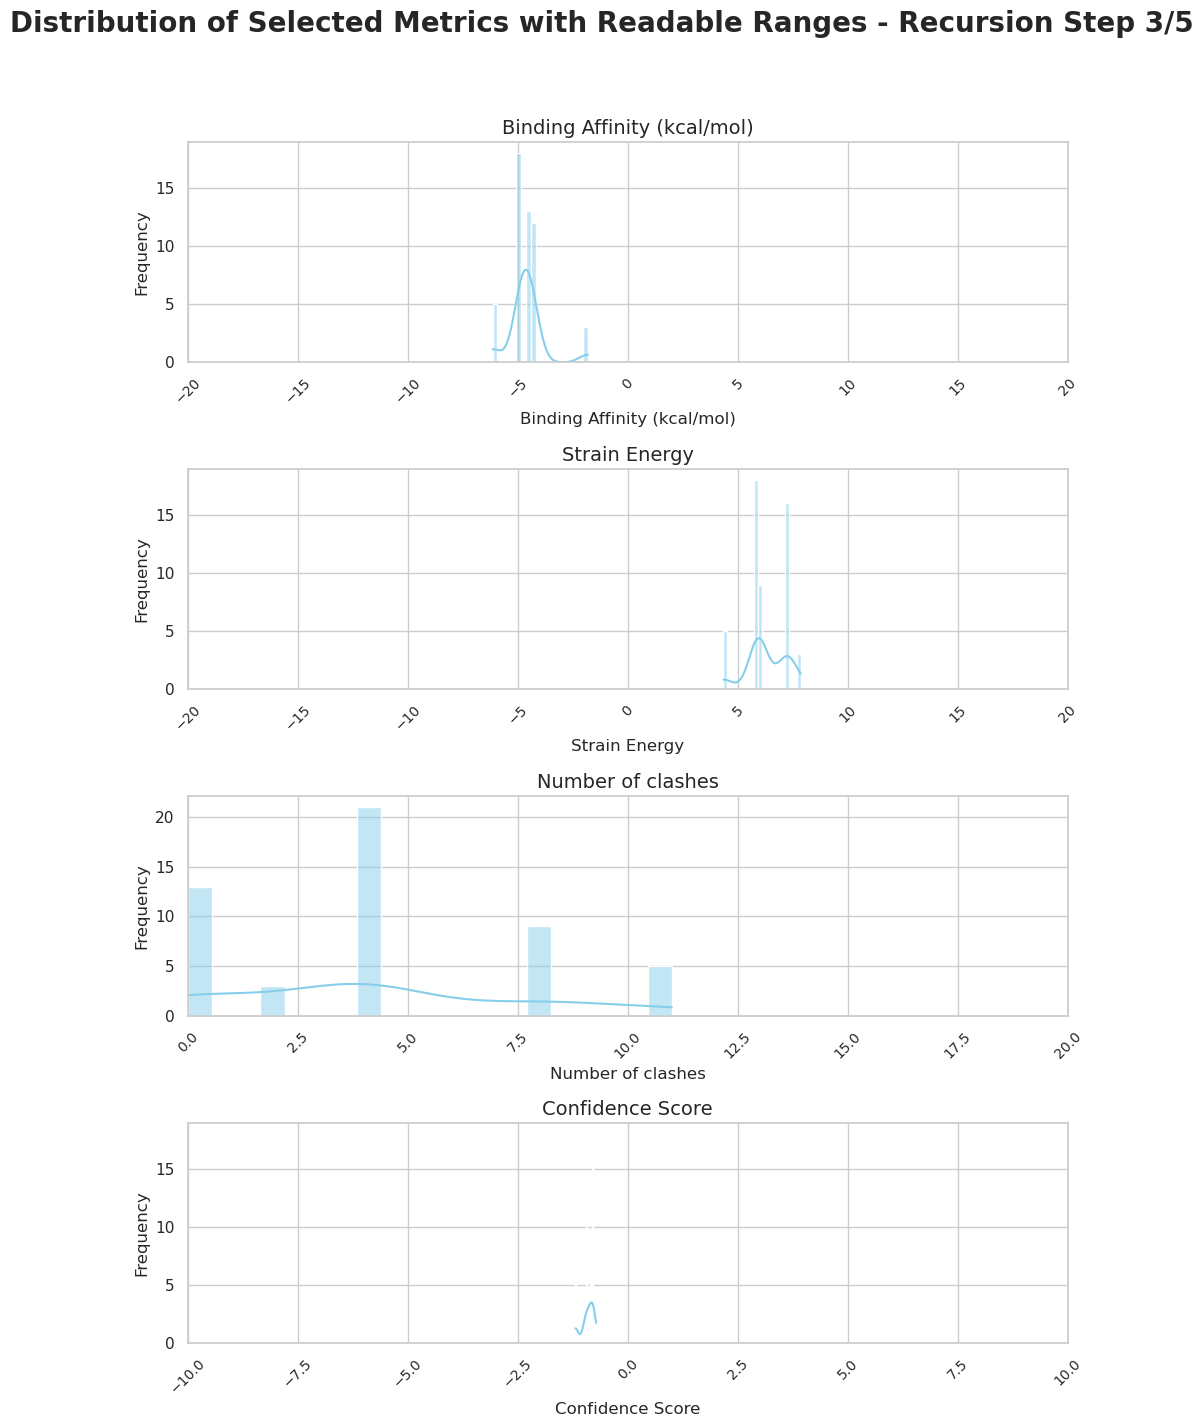

Total number of data points for recursion step 4/5: 51


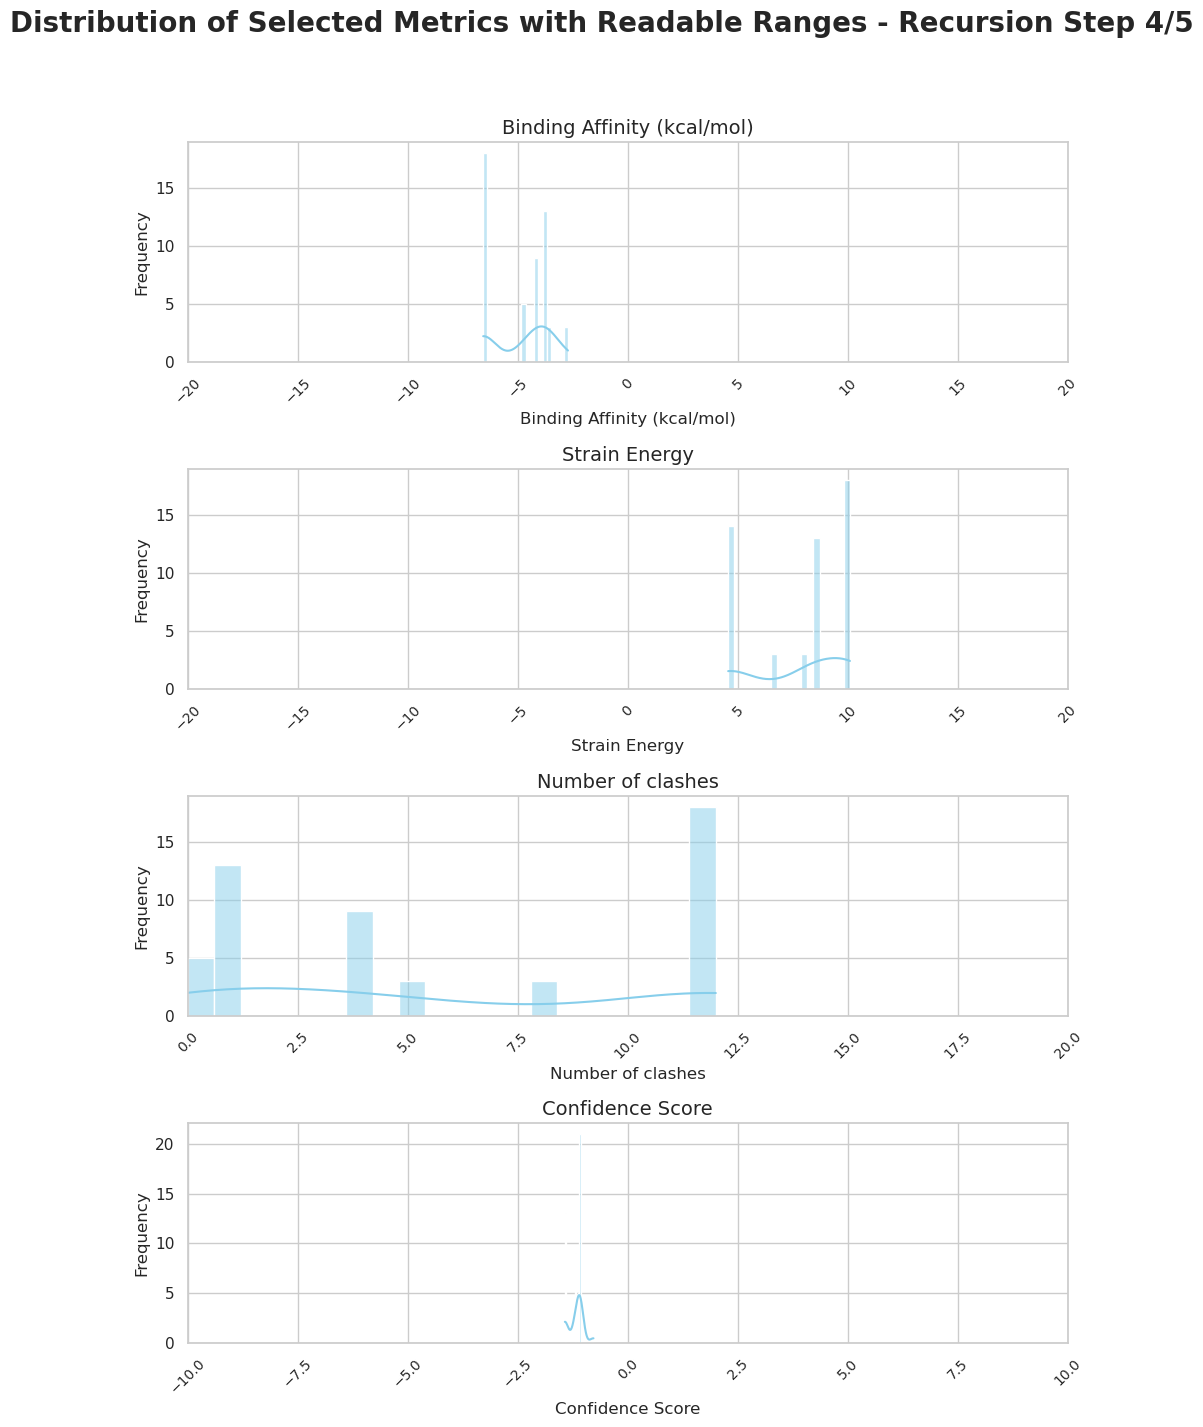

Total number of data points for recursion step 5/5: 51


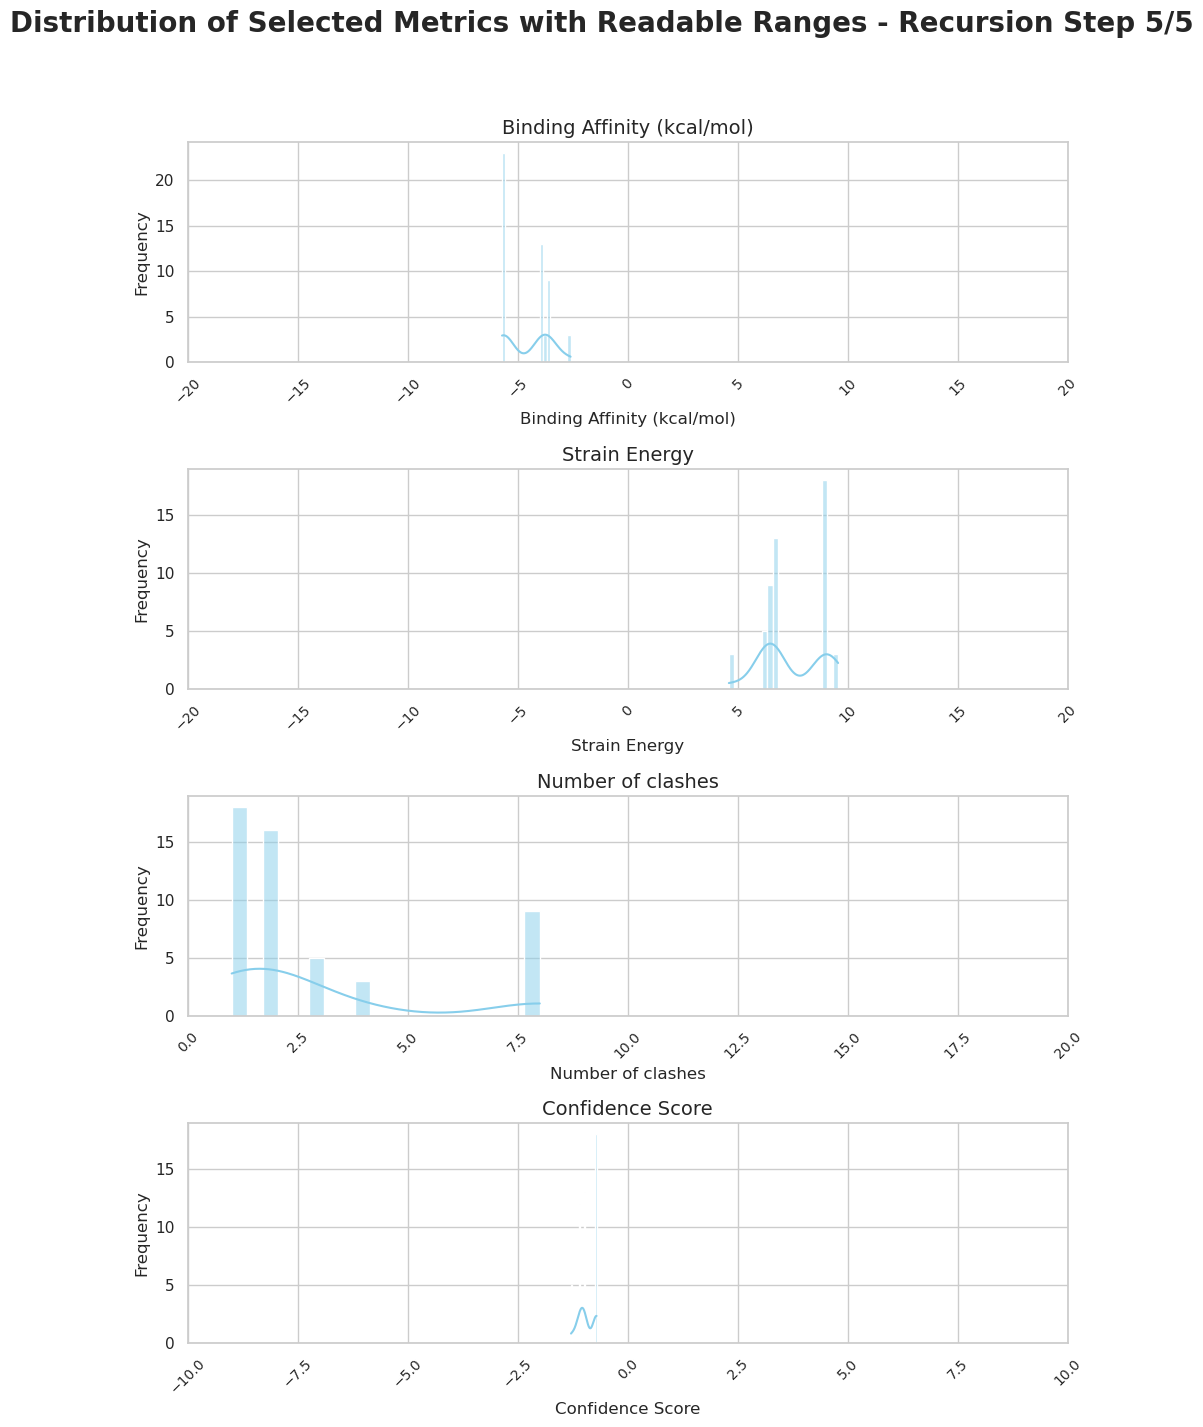

In [14]:
# Function to plot histograms with readable ranges for a given dataset
def plot_histograms_with_readable_ranges(data, title_suffix):
    # Enhancing overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Initializing a larger figure for clearer detail
    fig, axes = plt.subplots(4, 1, figsize=(10, 15))  # Using a vertical layout for better x-axis label readability

    # Titles and customization for improved readability
    fig.suptitle(f'Distribution of Selected Metrics with Readable Ranges - {title_suffix}', fontsize=20, fontweight='bold')

    # Adjusting bin sizes and x-axis limits for clarity
    metrics_info = {
        'Binding Affinity (kcal/mol)': {'bins': 20, 'ax': axes[0], 'xlim': (-20, 20)},
        'Strain Energy': {'bins': 20, 'ax': axes[1], 'xlim': (-20, 20)},
        'Number of clashes': {'bins': 20, 'ax': axes[2], 'xlim': (0, 20)},
        'Confidence Score': {'bins': 20, 'ax': axes[3], 'xlim': (-10, 10)}
    }

    for metric, info in metrics_info.items():
        sns.histplot(data=data, x=metric, kde=True, ax=info['ax'], bins=info['bins'], color='skyblue')
        info['ax'].set_title(metric, fontsize=14)
        info['ax'].set_xlabel(metric, fontsize=12)
        info['ax'].set_ylabel('Frequency', fontsize=12)
        info['ax'].set_xlim(info['xlim'])  # Adjusting x-axis limits for focusing on interesting ranges
        info['ax'].tick_params(axis='x', labelsize=10, rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_histograms_with_readable_ranges(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) of Each Recursive Step

- This is all data without selecting range values

Total number of data points for recursion step 1/5: 51


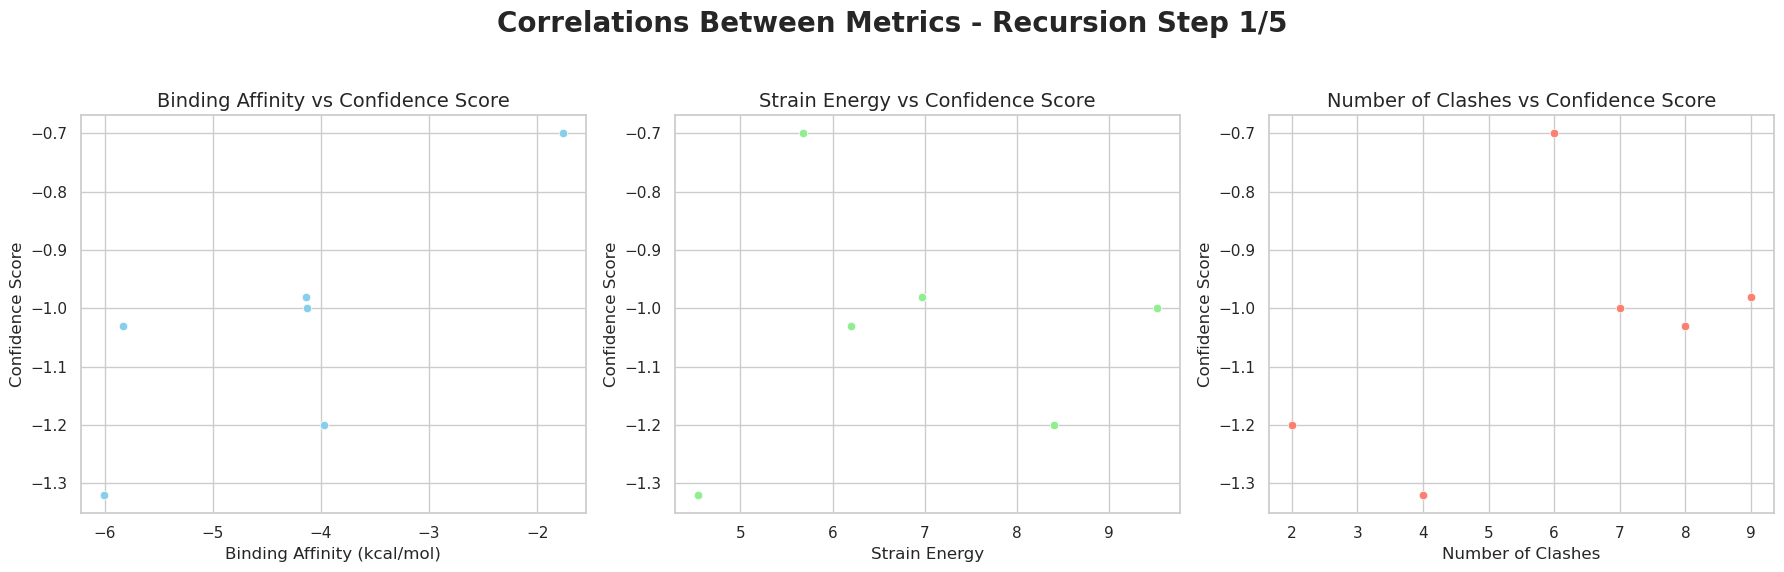

Total number of data points for recursion step 2/5: 51


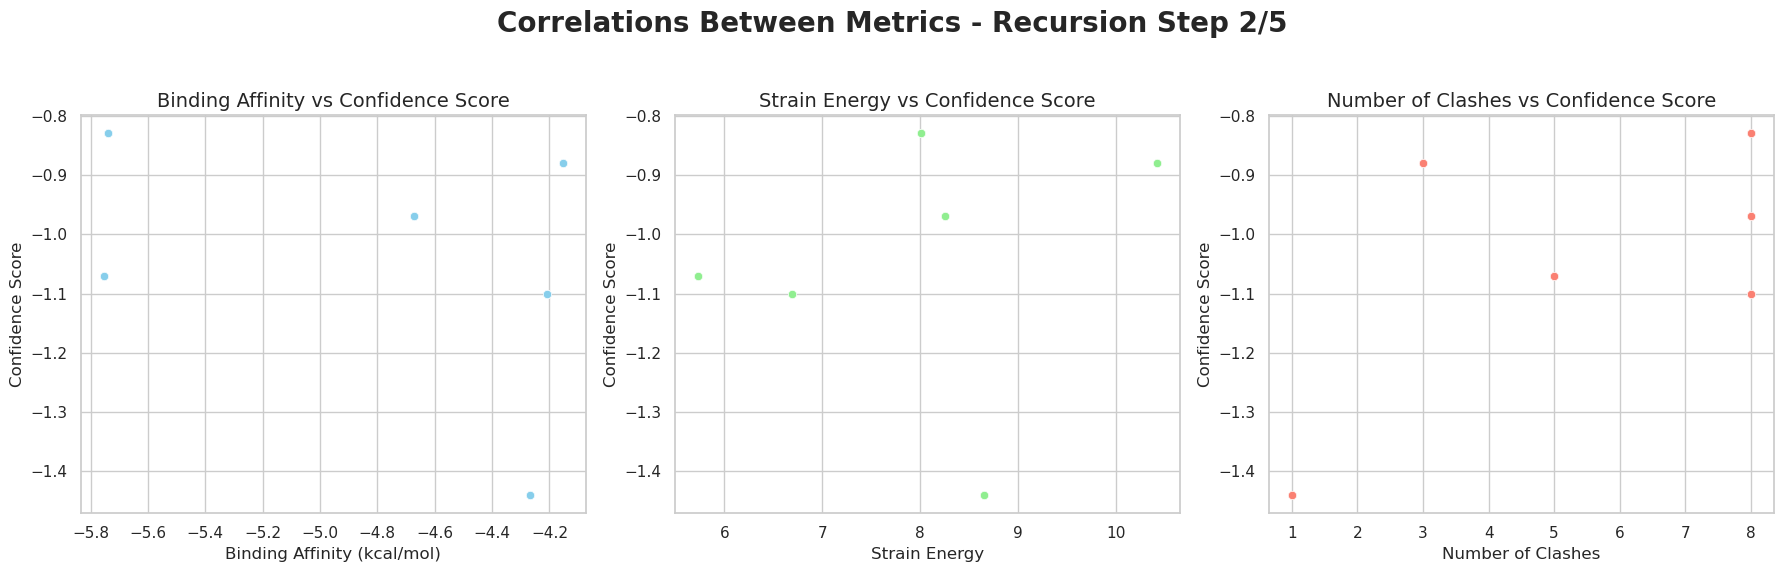

Total number of data points for recursion step 3/5: 51


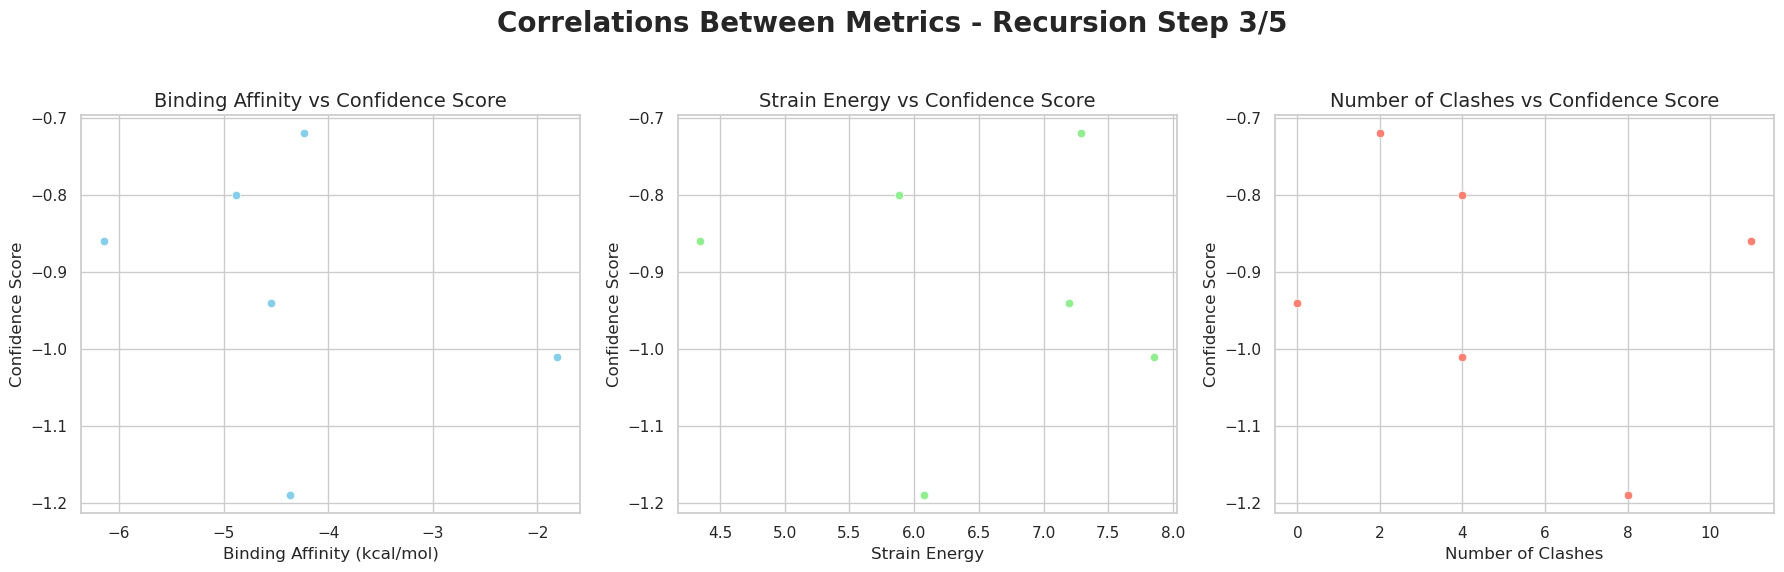

Total number of data points for recursion step 4/5: 51


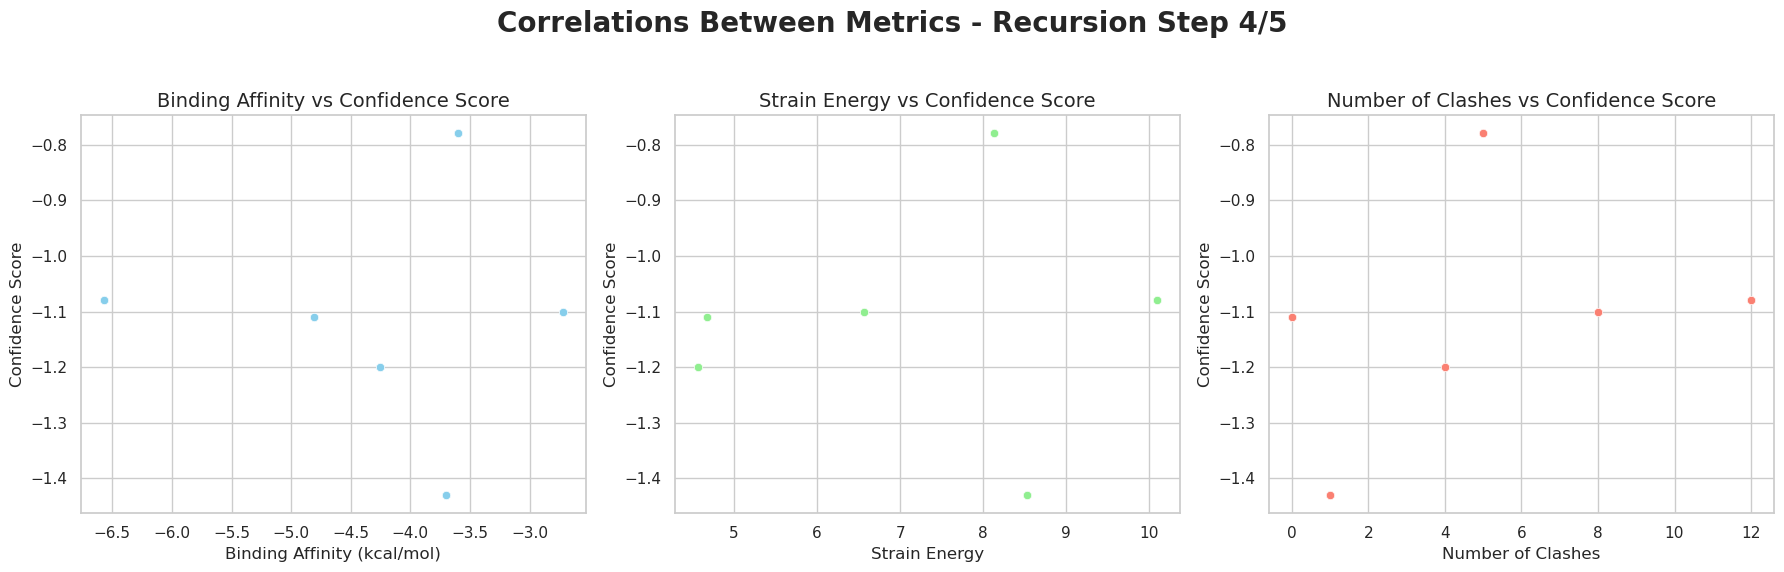

Total number of data points for recursion step 5/5: 51


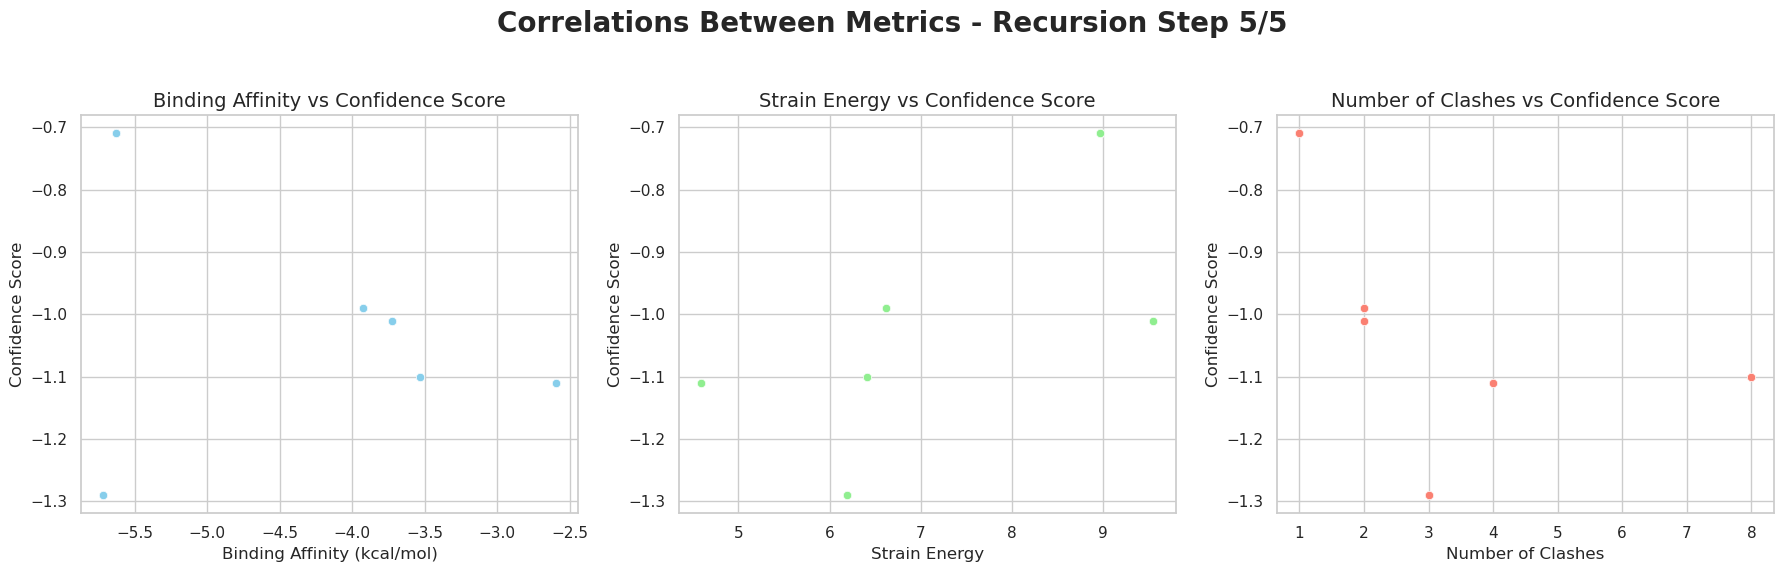

In [15]:
def plot_correlations(data, title_suffix):
    # Plotting correlations for the specified pairs of metrics
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations Between Metrics - {title_suffix}', fontsize=20, fontweight='bold')

    # Binding Affinity (kcal/mol) vs Confidence Score
    sns.scatterplot(data=data, x='Binding Affinity (kcal/mol)', y='Confidence Score', ax=axes[0], color='skyblue')
    axes[0].set_title('Binding Affinity vs Confidence Score', fontsize=14)
    axes[0].set_xlabel('Binding Affinity (kcal/mol)', fontsize=12)
    axes[0].set_ylabel('Confidence Score', fontsize=12)

    # Strain Energy vs Confidence Score
    sns.scatterplot(data=data, x='Strain Energy', y='Confidence Score', ax=axes[1], color='lightgreen')
    axes[1].set_title('Strain Energy vs Confidence Score', fontsize=14)
    axes[1].set_xlabel('Strain Energy', fontsize=12)
    axes[1].set_ylabel('Confidence Score', fontsize=12)

    # Number of clashes vs Confidence Score
    sns.scatterplot(data=data, x='Number of clashes', y='Confidence Score', ax=axes[2], color='salmon')
    axes[2].set_title('Number of Clashes vs Confidence Score', fontsize=14)
    axes[2].set_xlabel('Number of Clashes', fontsize=12)
    axes[2].set_ylabel('Confidence Score', fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and plot correlations for each step
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_correlations(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) of Each Recursive Step

- This is all data with selecting range values

Total number of data points for recursion step 1/5: 51


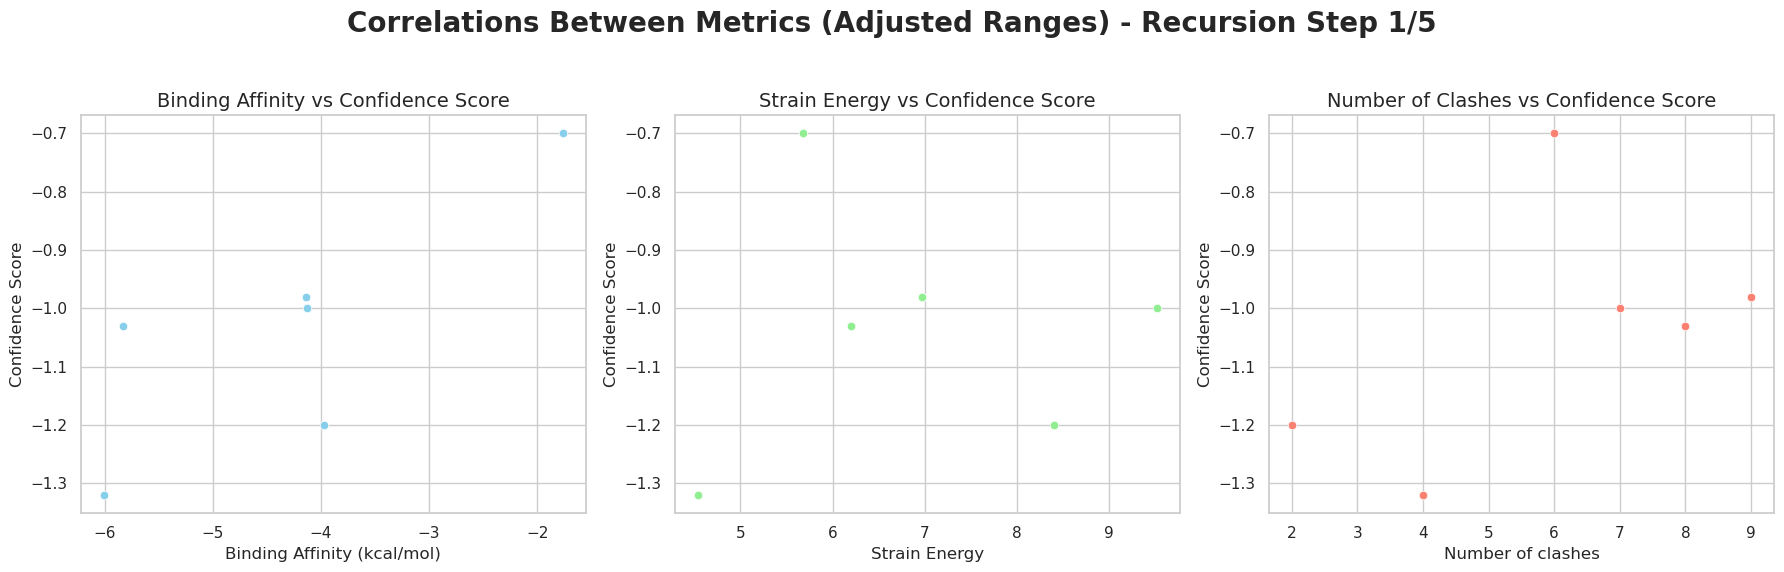

Total number of data points for recursion step 2/5: 51


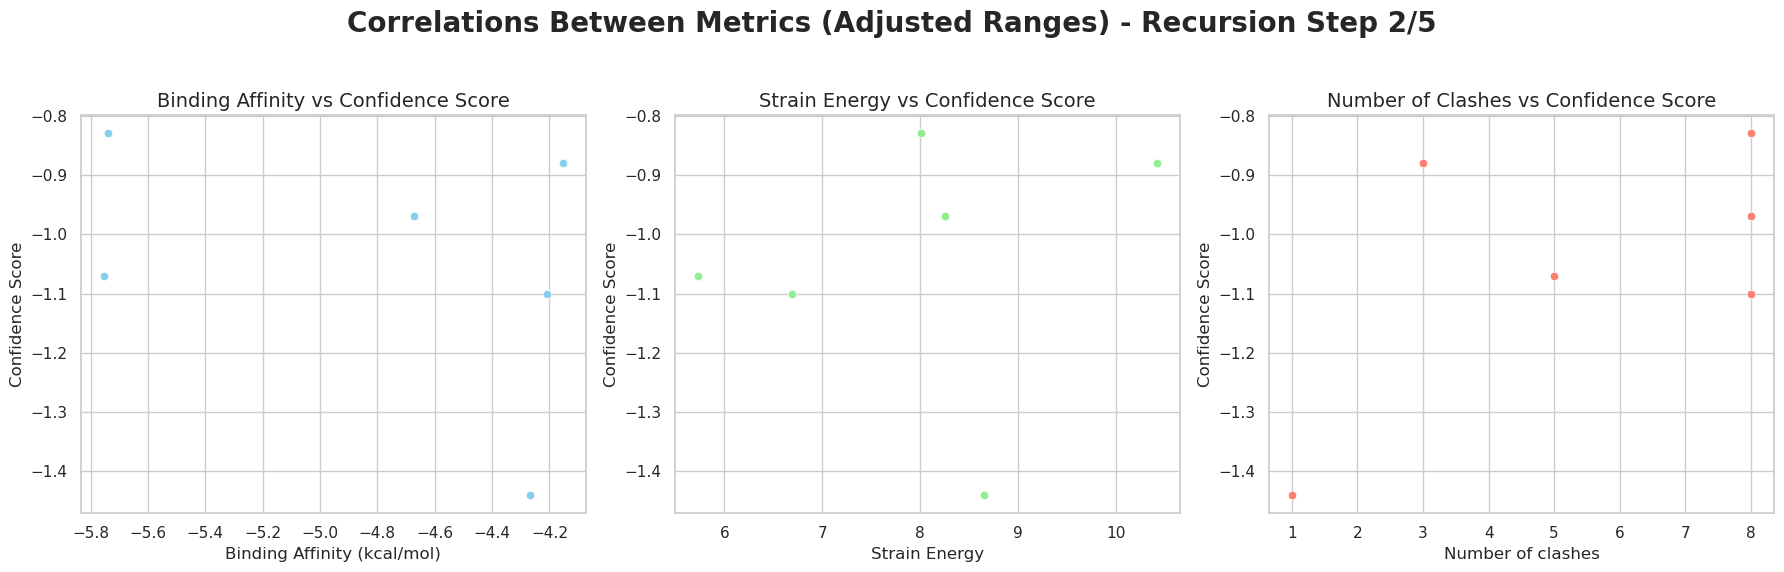

Total number of data points for recursion step 3/5: 51


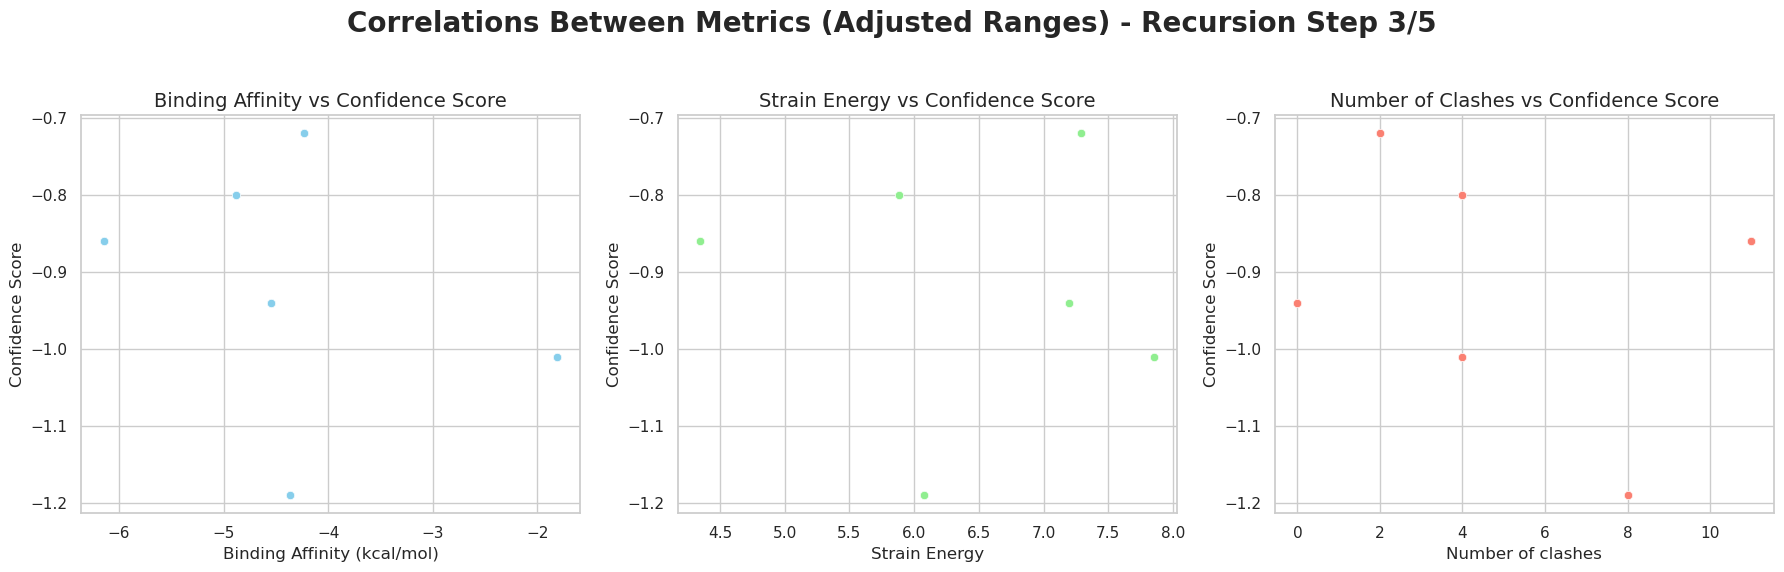

Total number of data points for recursion step 4/5: 51


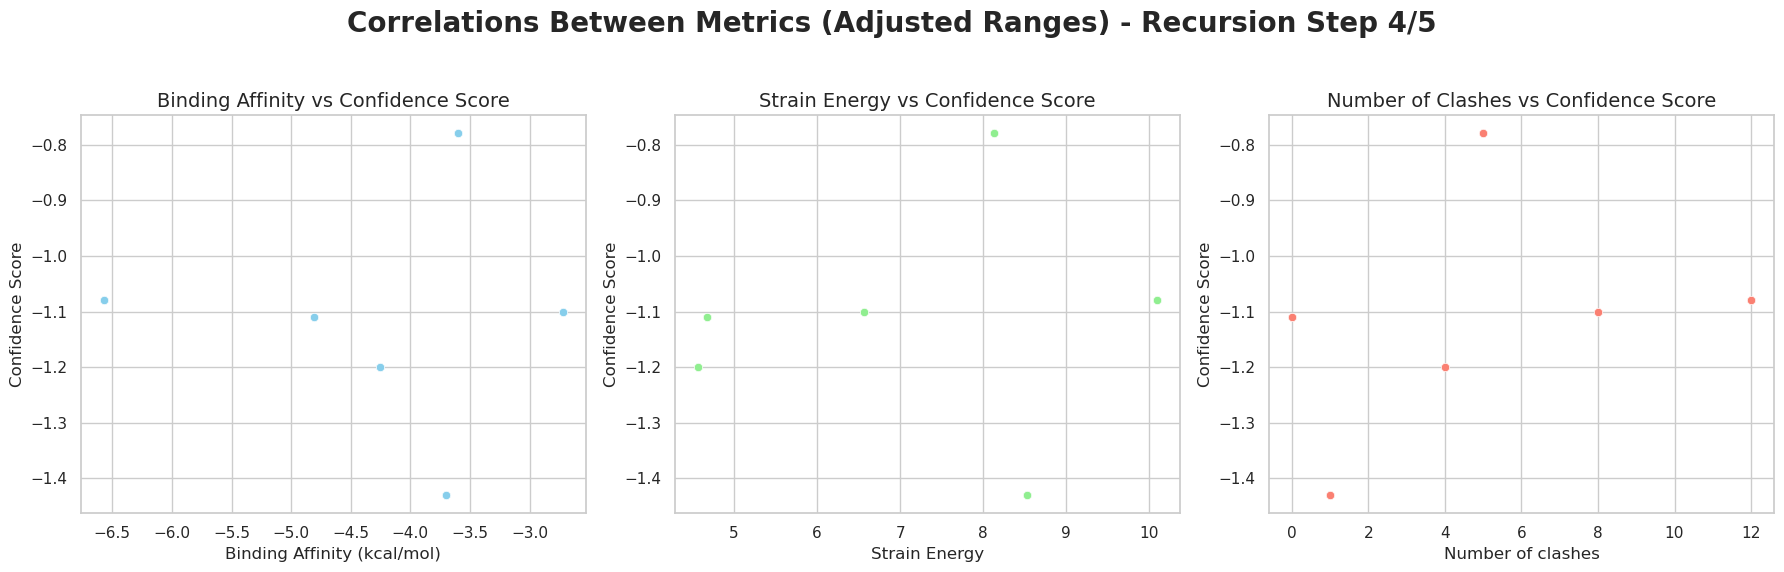

Total number of data points for recursion step 5/5: 51


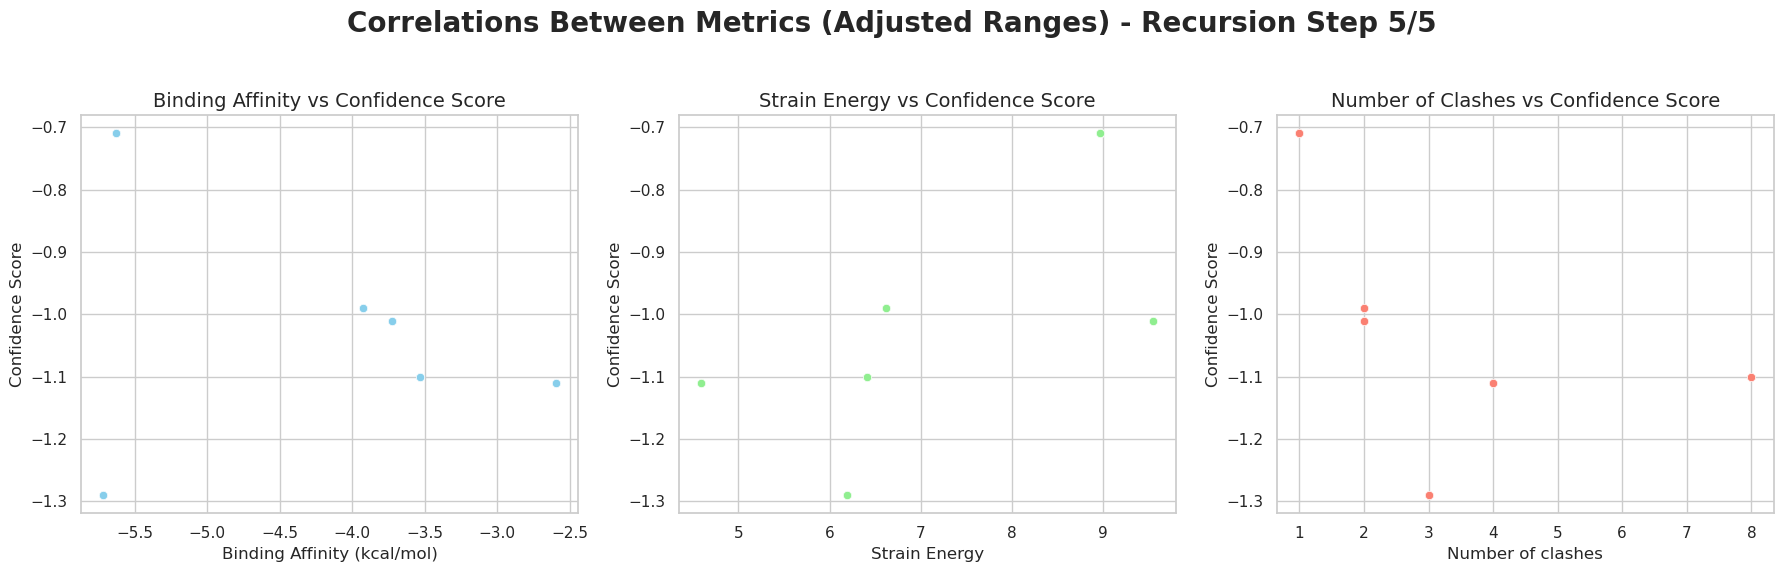

In [16]:
def filter_and_plot_correlations(data, title_suffix):
    # Filter the data for the given ranges
    filtered_data = data[
        (data['Confidence Score'] >= -5) & (data['Confidence Score'] <= 5) &
        (data['Binding Affinity (kcal/mol)'] >= -20) & (data['Binding Affinity (kcal/mol)'] <= 20) &
        (data['Strain Energy'] >= -20) & (data['Strain Energy'] <= 20)
    ]

    # Plotting correlations for the specified pairs of metrics with all adjusted ranges
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations Between Metrics (Adjusted Ranges) - {title_suffix}', fontsize=20, fontweight='bold')

    # Binding Affinity (kcal/mol) vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Binding Affinity (kcal/mol)', y='Confidence Score', ax=axes[0], color='skyblue')
    axes[0].set_title('Binding Affinity vs Confidence Score', fontsize=14)

    # Strain Energy vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Strain Energy', y='Confidence Score', ax=axes[1], color='lightgreen')
    axes[1].set_title('Strain Energy vs Confidence Score', fontsize=14)

    # Number of clashes vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Number of clashes', y='Confidence Score', ax=axes[2], color='salmon')
    axes[2].set_title('Number of Clashes vs Confidence Score', fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and apply the filter and plotting function
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    filter_and_plot_correlations(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) of Each Recursive Step

- This is all data with selecting range values 
- Best lines with `R^2` values

Total number of data points for recursion step 1/5: 51


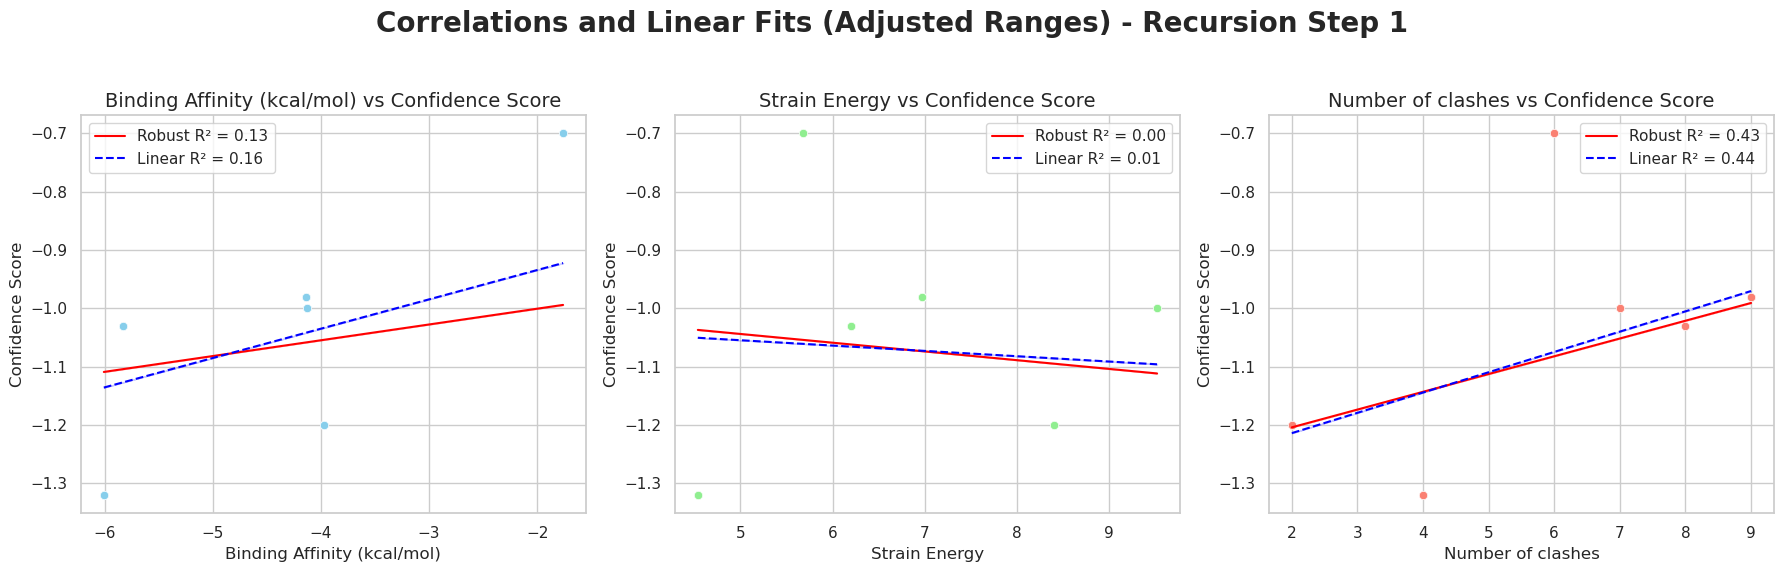

Total number of data points for recursion step 2/5: 51


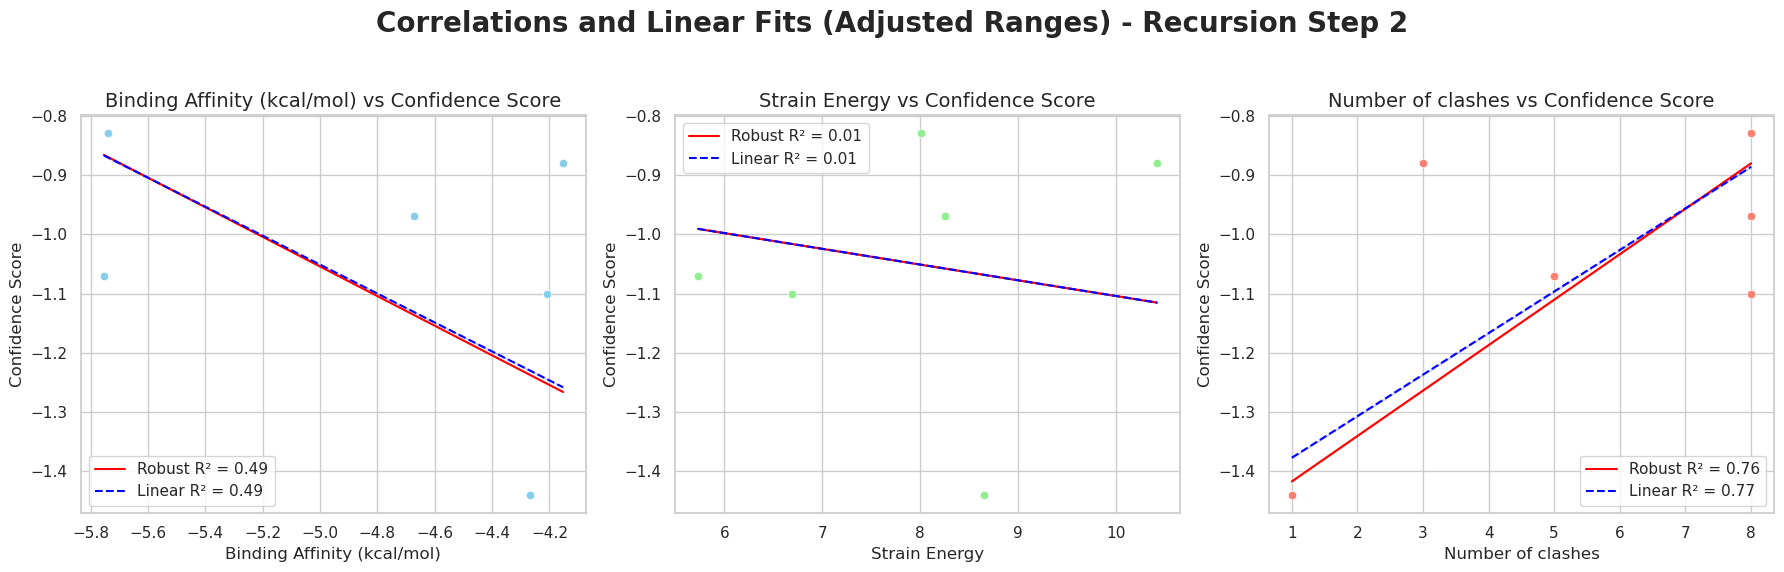

Total number of data points for recursion step 3/5: 51


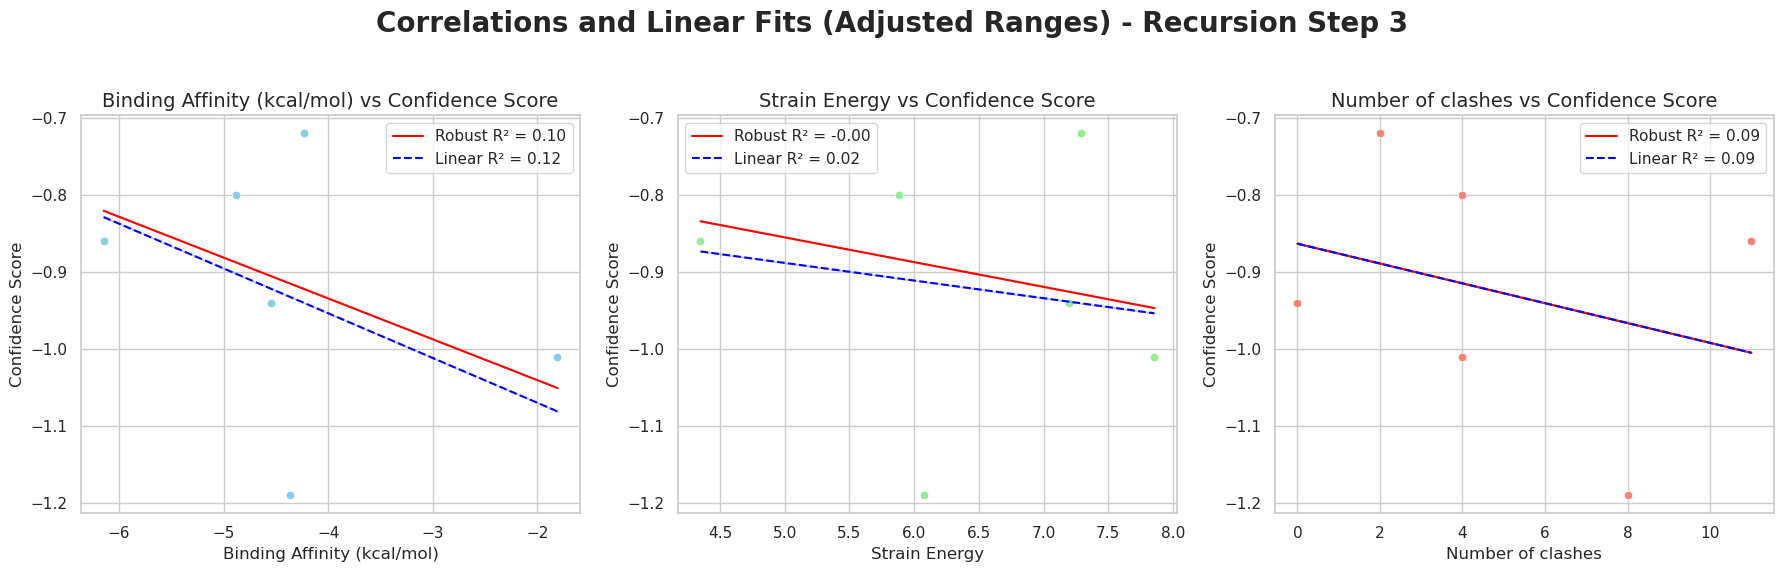

Total number of data points for recursion step 4/5: 51


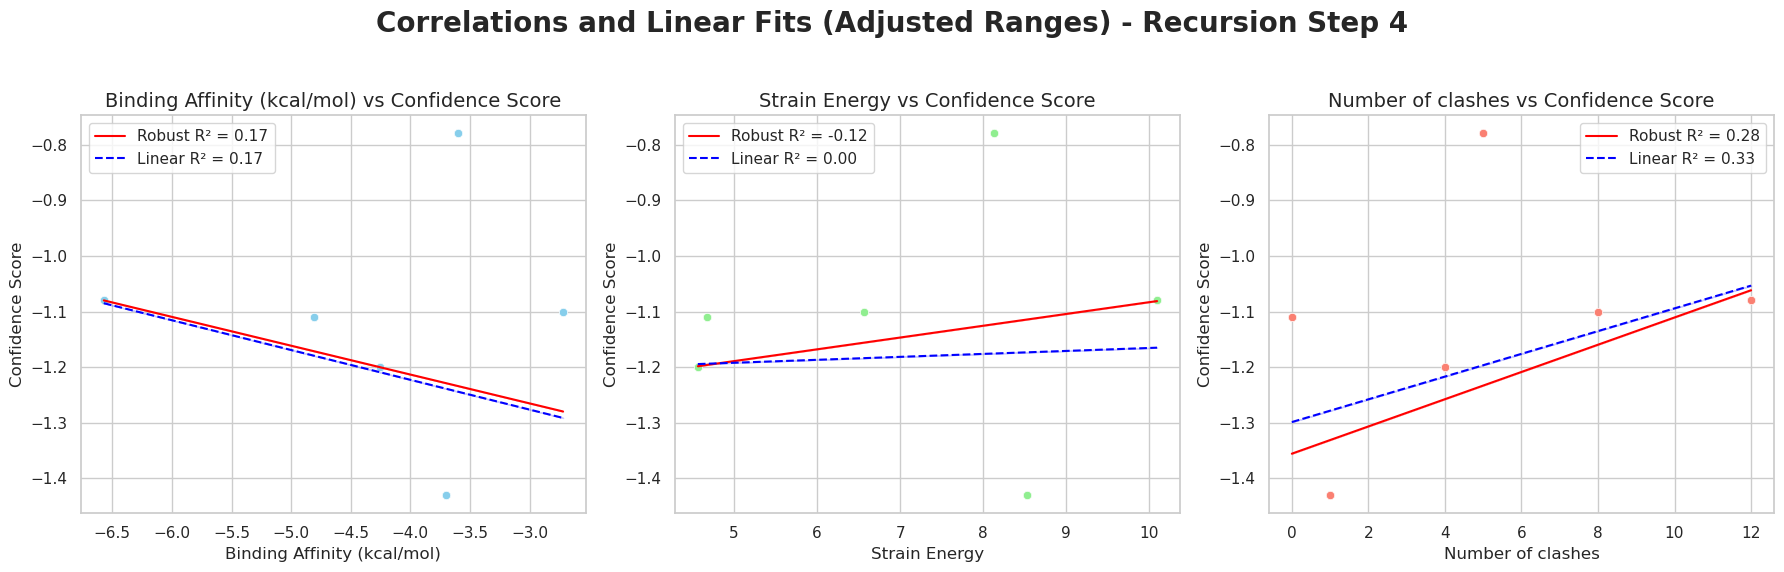

Total number of data points for recursion step 5/5: 51


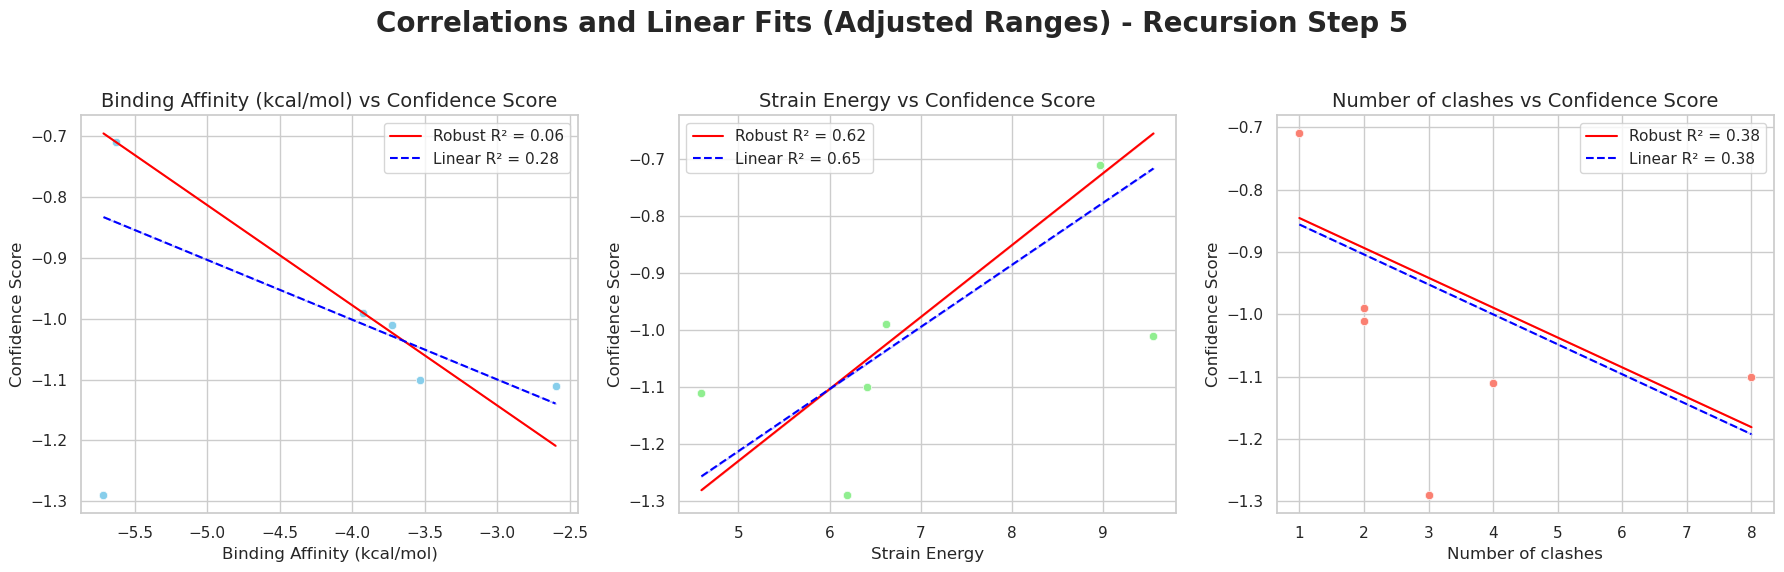

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm

def plot_correlation_with_fit(data, recursion_step):
    # Filter data based on the specified ranges
    filtered_data = data[
        (data['Confidence Score'] >= -5) & (data['Confidence Score'] <= 5) &
        (data['Binding Affinity (kcal/mol)'] >= -20) & (data['Binding Affinity (kcal/mol)'] <= 20) &
        (data['Strain Energy'] >= -20) & (data['Strain Energy'] <= 20)
    ]

    # Preparing the figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations and Linear Fits (Adjusted Ranges) - Recursion Step {recursion_step}', fontsize=20, fontweight='bold')

    # Defining metrics pairs for correlation
    metrics_pairs = [
        ('Binding Affinity (kcal/mol)', 'Confidence Score'),
        ('Strain Energy', 'Confidence Score'),
        ('Number of clashes', 'Confidence Score')
    ]

    colors = ['skyblue', 'lightgreen', 'salmon']

    for i, (x_metric, y_metric) in enumerate(metrics_pairs):
        # Scatter plot
        sns.scatterplot(data=filtered_data, x=x_metric, y=y_metric, ax=axes[i], color=colors[i])
        
        # Robust linear model
        X = sm.add_constant(filtered_data[x_metric])  # Adding a constant for the intercept
        robust_model = sm.RLM(filtered_data[y_metric], X, M=sm.robust.norms.HuberT())
        robust_results = robust_model.fit()
        
        # Calculate R^2 score for robust model
        y_pred_robust = robust_results.predict(X)
        r2_robust = r2_score(filtered_data[y_metric], y_pred_robust)
        
        # Linear model
        coef = np.polyfit(filtered_data[x_metric], filtered_data[y_metric], 1)
        poly1d_fn = np.poly1d(coef) 
        
        # Calculate R^2 score for linear model
        y_pred_linear = poly1d_fn(filtered_data[x_metric])
        r2_linear = r2_score(filtered_data[y_metric], y_pred_linear)
        
        # Plot robust fit and linear fit
        sns.lineplot(x=filtered_data[x_metric], y=y_pred_robust, ax=axes[i], color='red', label=f'Robust R² = {r2_robust:.2f}')
        sns.lineplot(x=filtered_data[x_metric], y=poly1d_fn(filtered_data[x_metric]), ax=axes[i], color='blue', label=f'Linear R² = {r2_linear:.2f}', linestyle='--')
        
        axes[i].set_title(f'{x_metric} vs {y_metric}', fontsize=14)
        axes[i].set_xlabel(x_metric, fontsize=12)
        axes[i].set_ylabel(y_metric, fontsize=12)
        axes[i].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_correlation_with_fit(data, step)


## Box Plots (Binding Affinity, Strain Energy, Number of Clashes) of Each Recursive Step

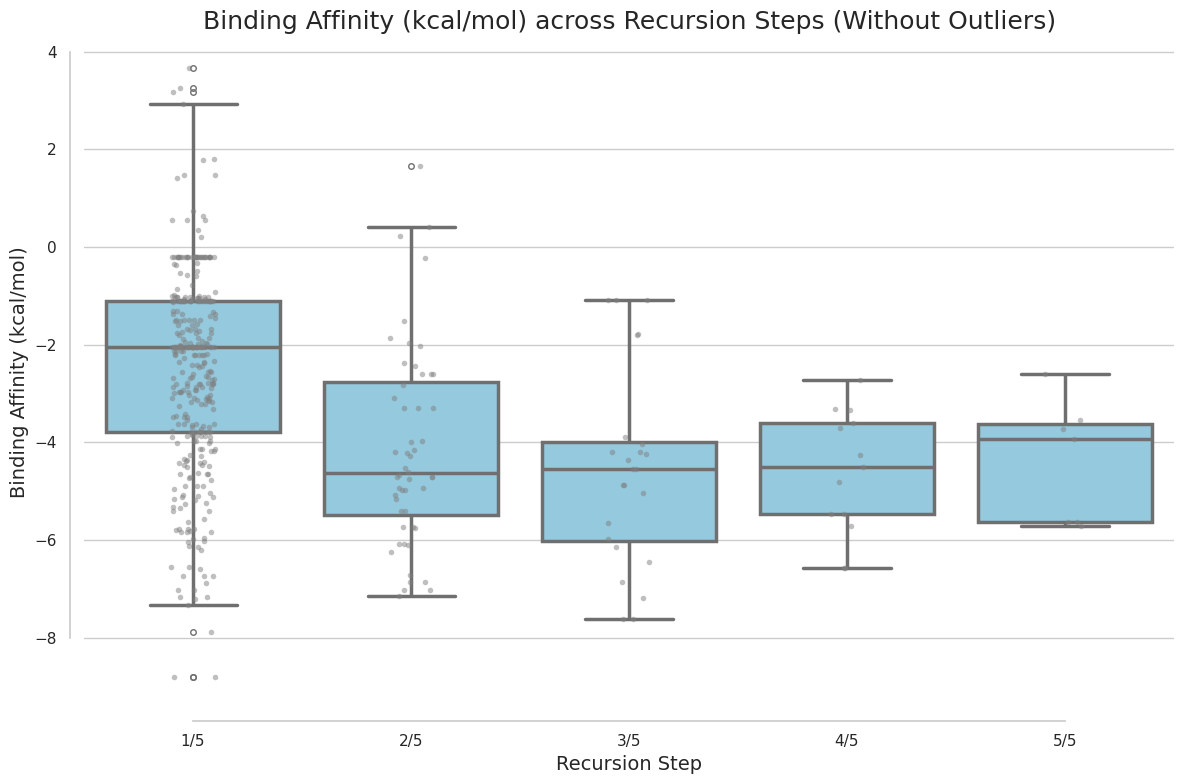

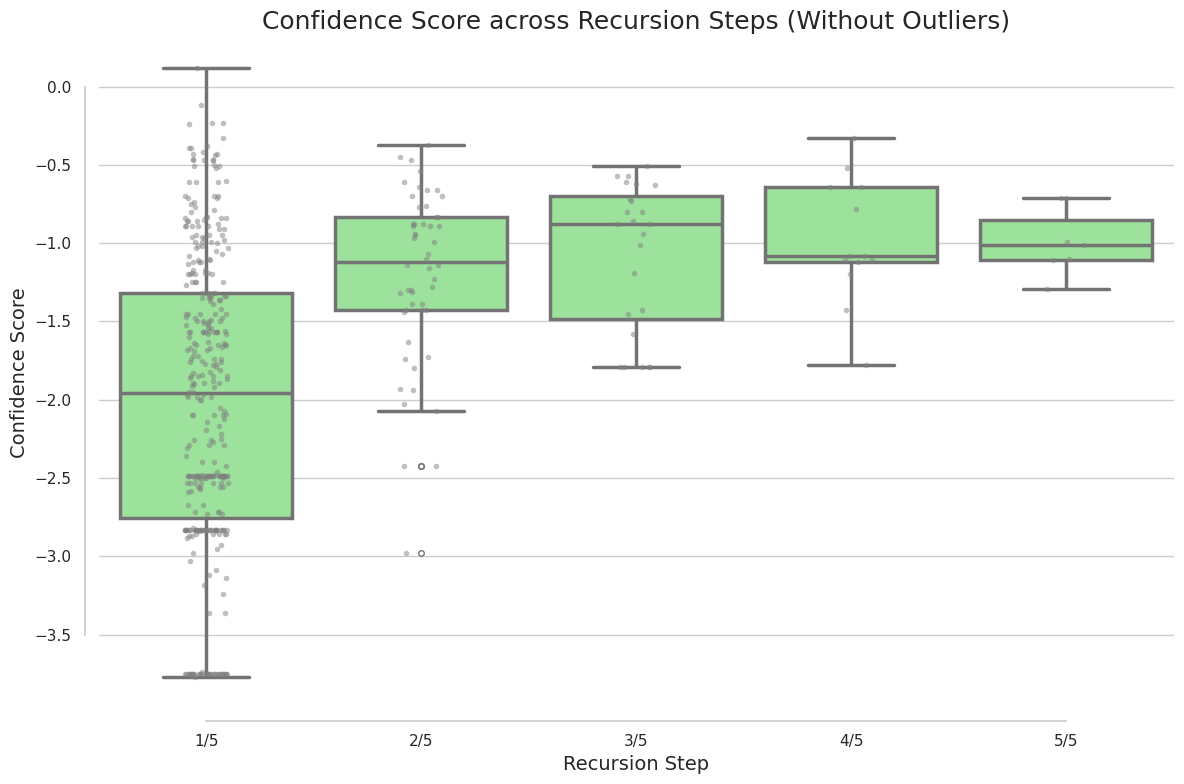

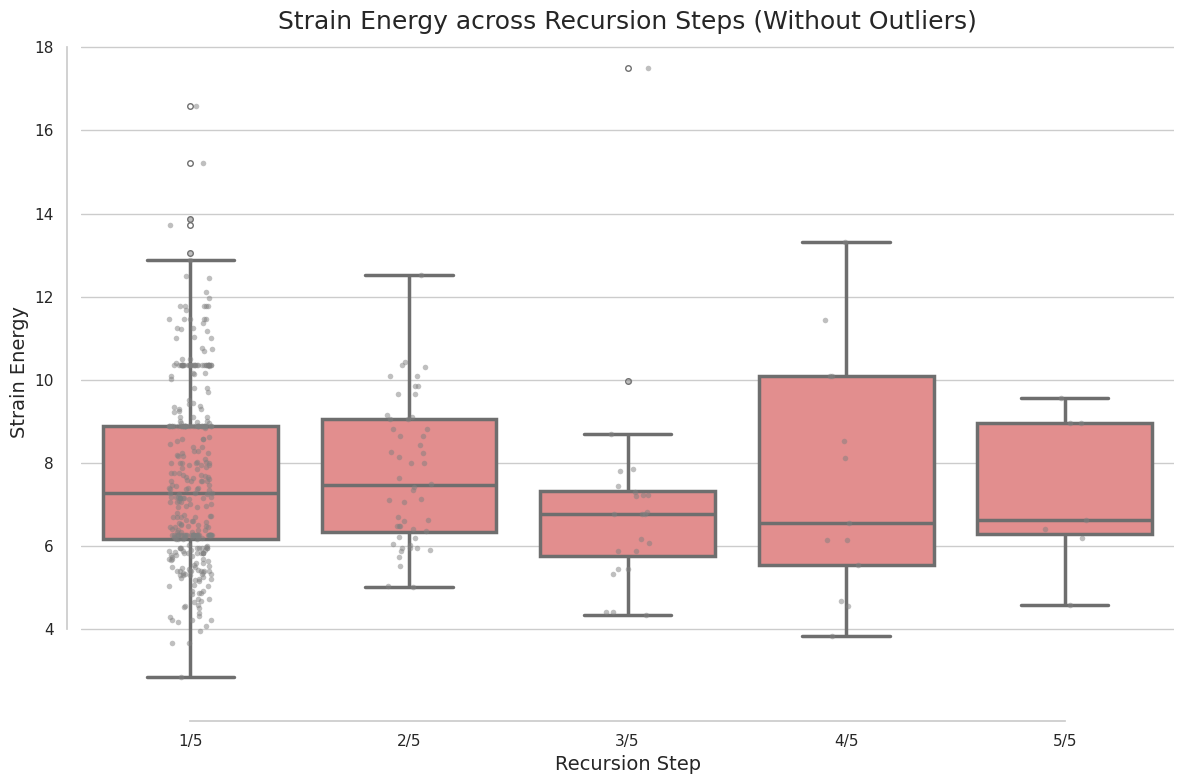

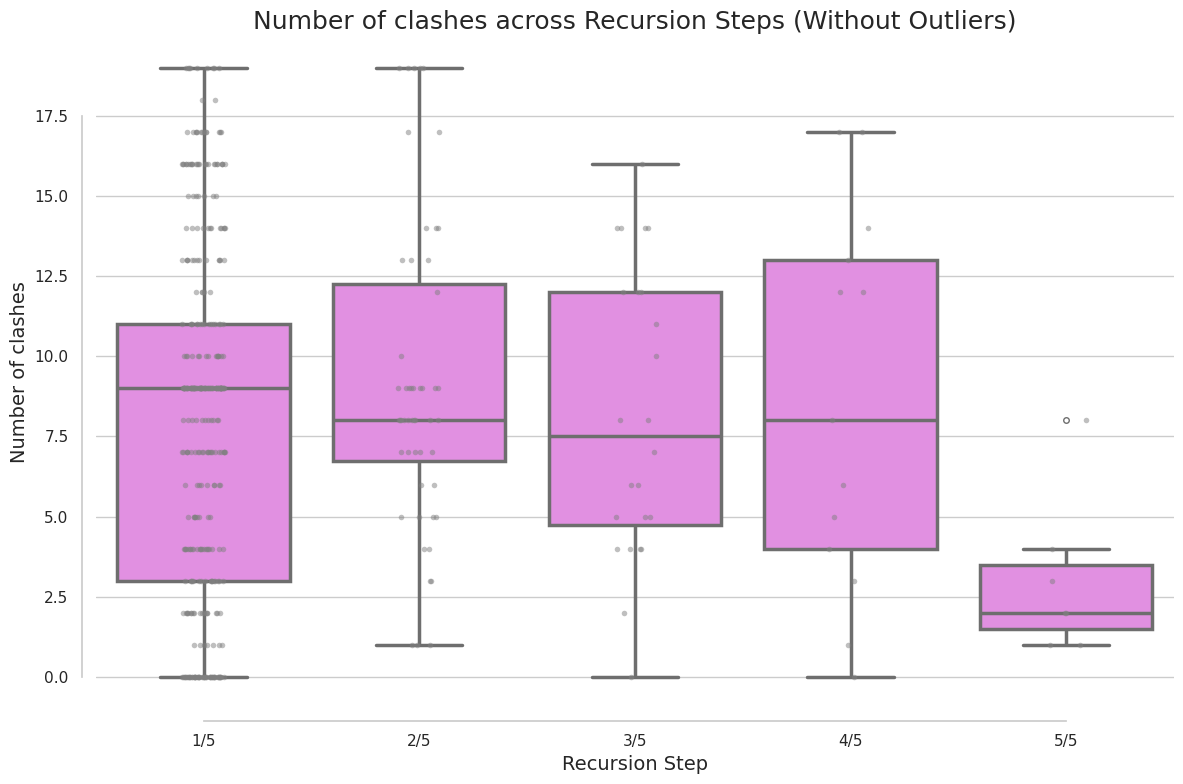

In [18]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.1)
    Q3 = df[column_name].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Function to plot a fancy boxplot for a given column
def plot_fancy_boxplot(data, column_name, recursion_steps, color):
    cleaned_data = remove_outliers(data, column_name)
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, fliersize=4, linewidth=2.5, color=color)
    sns.stripplot(x='Recursion Step', y=column_name, data=cleaned_data, jitter=True, size=4, color='gray', alpha=0.5)
    plt.title(f'{column_name} across Recursion Steps (Without Outliers)', fontsize=18)
    plt.xlabel('Recursion Step', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.show()

# Load the data and concatenate it with recursion step labels
base_dir = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/AlphaFold/data/'
output_file_template = 'filtered_summary_gene_id_lip_ms_rec_{}.csv'
all_data = pd.DataFrame()

for step in range(1, 6):
    file_path = f'{base_dir}{output_file_template.format(step)}'
    df = pd.read_csv(file_path)
    df['Recursion Step'] = f'{step}/5'
    all_data = pd.concat([all_data, df])

# List of columns to create boxplots for
columns_to_plot = [
    'Binding Affinity (kcal/mol)', 
    'Confidence Score', 
    'Strain Energy', 
    'Number of clashes'
]

colors = {
    'Binding Affinity (kcal/mol)': 'skyblue', 
    'Confidence Score': 'lightgreen', 
    'Strain Energy': 'lightcoral', 
    'Number of clashes': 'violet'
}

# Plot fancy boxplots for all specified columns with colors
for column in columns_to_plot:
    plot_fancy_boxplot(all_data, column, range(1, 6), colors[column])

## Violin Plots (Binding Affinity, Strain Energy, Number of Clashes) of Each Recursive Step

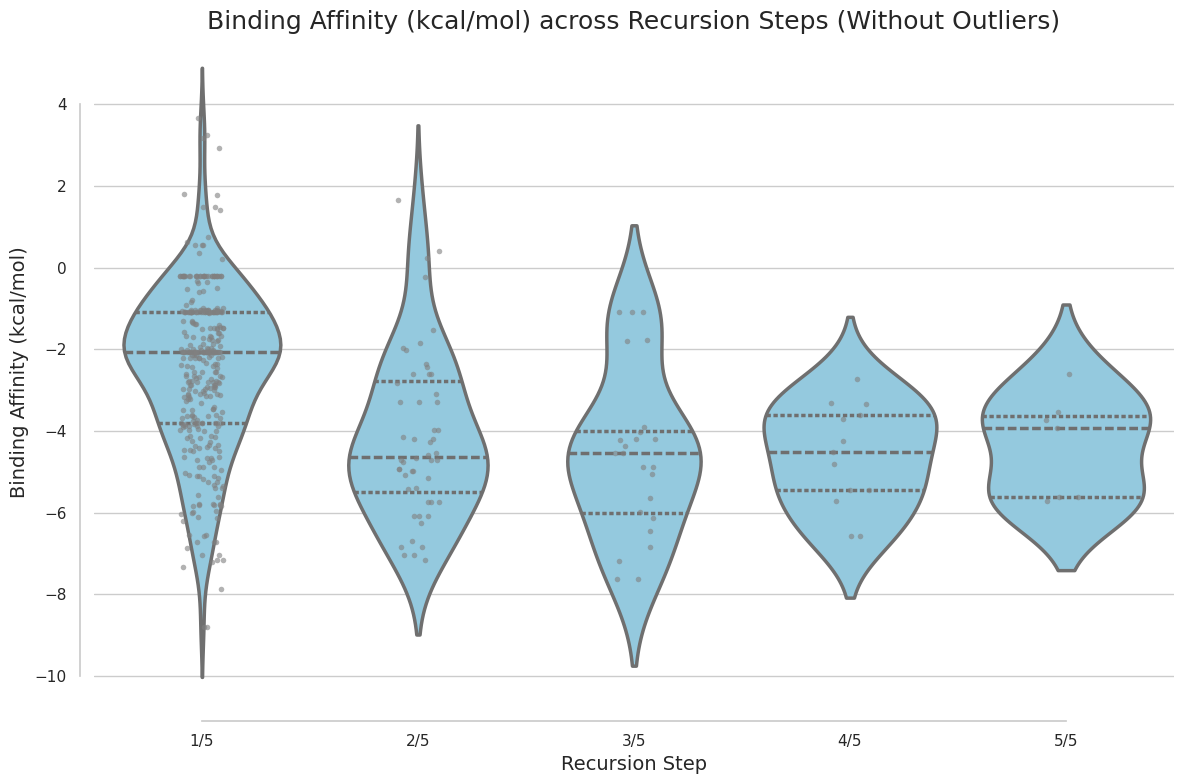

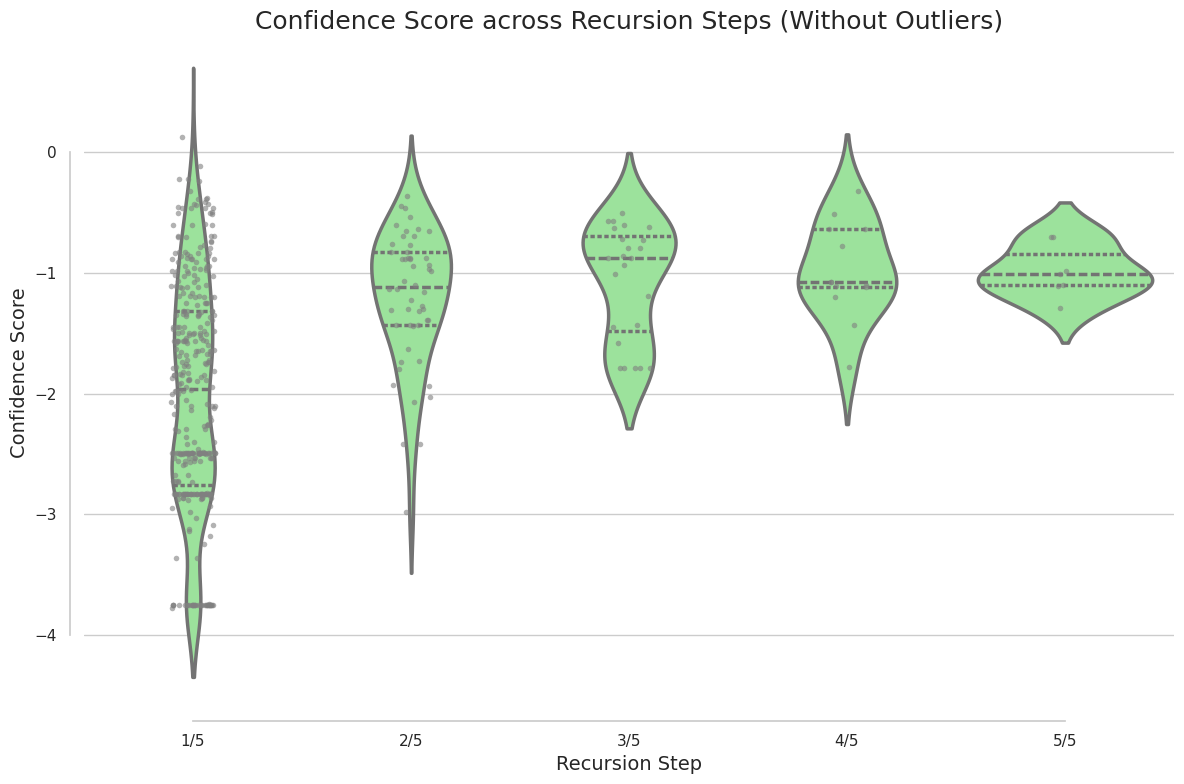

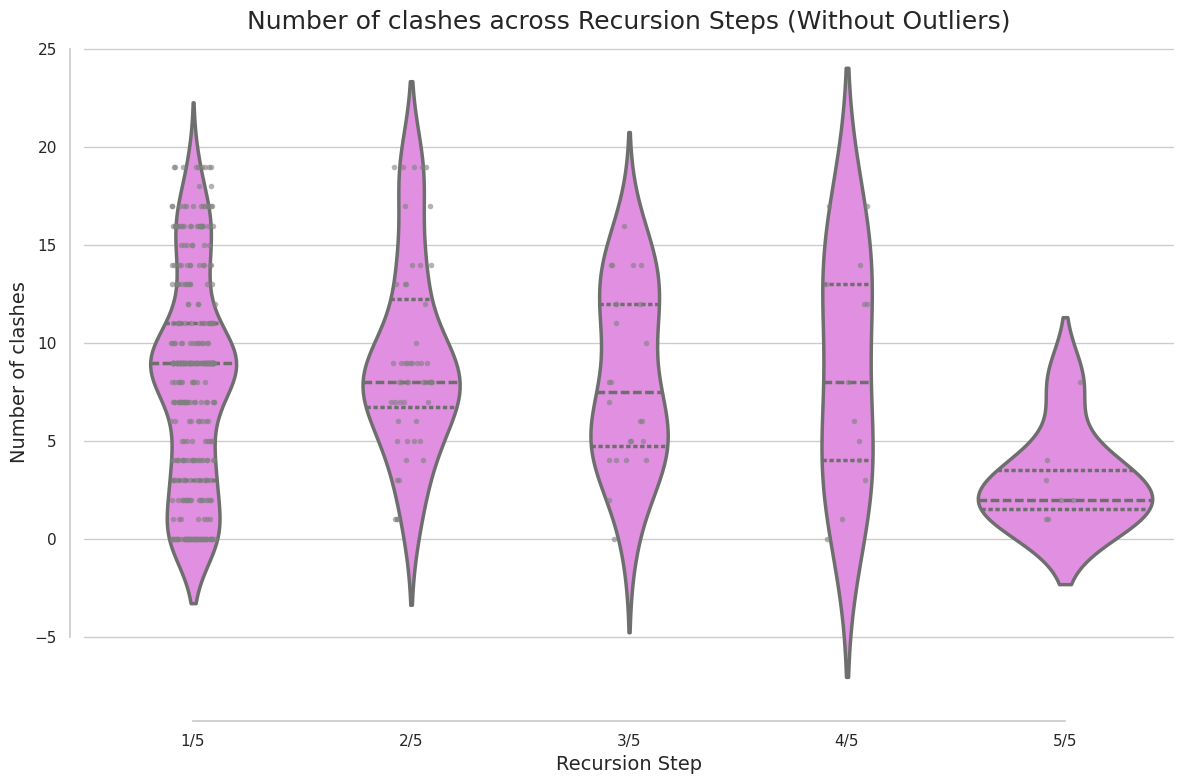

In [19]:
# Function to plot a fancy violin plot for a given column
def plot_fancy_violin_plot(data, column_name, recursion_steps, color):
    cleaned_data = remove_outliers(data, column_name)
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', linewidth=2.5, color=color)
    sns.stripplot(x='Recursion Step', y=column_name, data=cleaned_data, jitter=True, size=4, color='grey', alpha=0.6)
    plt.title(f'{column_name} across Recursion Steps (Without Outliers)', fontsize=18)
    plt.xlabel('Recursion Step', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.show()

# Assuming 'base_dir' and 'output_file_template' have been defined and the data has been loaded.
# Assuming 'all_data' DataFrame is ready and contains 'Recursion Step' column

# List of columns to create violin plots for
columns_to_plot = [
    'Binding Affinity (kcal/mol)', 
    'Confidence Score', 
    'Strain Energy', 
    'Number of clashes'
]

colors = {
    'Binding Affinity (kcal/mol)': 'skyblue', 
    'Confidence Score': 'lightgreen', 
    'Strain Energy': 'lightcoral', 
    'Number of clashes': 'violet'
}

# Plot fancy boxplots for all specified columns with colors
for column in columns_to_plot:
    plot_fancy_violin_plot(all_data, column, range(1, 6), colors[column])


## Comparative Analysis (t-tests, ANOVA, Kruskal-Wallis test, Tukey HSD test)

In [20]:
import scipy.stats as stats

# Function to perform t-tests between recursion steps for a given column
def perform_t_tests(data, column_name):
    unique_steps = data['Recursion Step'].unique()
    for i in range(len(unique_steps)):
        for j in range(i+1, len(unique_steps)):
            step_i = data[data['Recursion Step'] == unique_steps[i]][column_name]
            step_j = data[data['Recursion Step'] == unique_steps[j]][column_name]
            t_stat, p_val = stats.ttest_ind(step_i, step_j, equal_var=False)
            print(f"T-test between {unique_steps[i]} and {unique_steps[j]} for {column_name}:")
            print(f"T-statistic: {t_stat}, P-value: {p_val}")
            print("\n")

# Function to perform ANOVA across all recursion steps for a given column
def perform_anova(data, column_name):
    data_groups = [data[data['Recursion Step'] == step][column_name] for step in data['Recursion Step'].unique()]
    f_stat, p_val = stats.f_oneway(*data_groups)
    print(f"ANOVA for {column_name}:")
    print(f"F-statistic: {f_stat}, P-value: {p_val}")
    print("\n")

# Function to perform non-parametric Kruskal-Wallis test across all recursion steps for a given column
def perform_kruskal_wallis(data, column_name):
    data_groups = [data[data['Recursion Step'] == step][column_name] for step in data['Recursion Step'].unique()]
    h_stat, p_val = stats.kruskal(*data_groups)
    print(f"Kruskal-Wallis test for {column_name}:")
    print(f"H-statistic: {h_stat}, P-value: {p_val}")
    print("\n")

# Assuming 'all_data' DataFrame is ready and contains 'Recursion Step' column


column_to_analyze = [
    'Binding Affinity (kcal/mol)', 
    'Confidence Score', 
    'Strain Energy', 
    'Number of clashes'
]

for column in column_to_analyze:
    # Perform t-tests
    perform_t_tests(all_data, column)

    # Perform ANOVA
    perform_anova(all_data, column)

    # Perform Kruskal-Wallis test
    perform_kruskal_wallis(all_data, column)




T-test between 1/5 and 2/5 for Binding Affinity (kcal/mol):
T-statistic: 5.929552053708637, P-value: 6.822201701659013e-08


T-test between 1/5 and 3/5 for Binding Affinity (kcal/mol):
T-statistic: 5.237672263054782, P-value: 1.2693186708826617e-05


T-test between 1/5 and 4/5 for Binding Affinity (kcal/mol):
T-statistic: 6.185946776917925, P-value: 1.098973787492348e-05


T-test between 1/5 and 5/5 for Binding Affinity (kcal/mol):
T-statistic: 4.298333085024785, P-value: 0.0033168328569979986


T-test between 2/5 and 3/5 for Binding Affinity (kcal/mol):
T-statistic: 0.8178695886805799, P-value: 0.4177391922917145


T-test between 2/5 and 4/5 for Binding Affinity (kcal/mol):
T-statistic: 1.058889658793272, P-value: 0.29827237860836686


T-test between 2/5 and 5/5 for Binding Affinity (kcal/mol):
T-statistic: 0.4573714414377761, P-value: 0.6564721865311023


T-test between 3/5 and 4/5 for Binding Affinity (kcal/mol):
T-statistic: 0.12743674761106674, P-value: 0.8993442303406172


T-test

/tmp/ipykernel_1133030/498102362.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, palette="Set3")


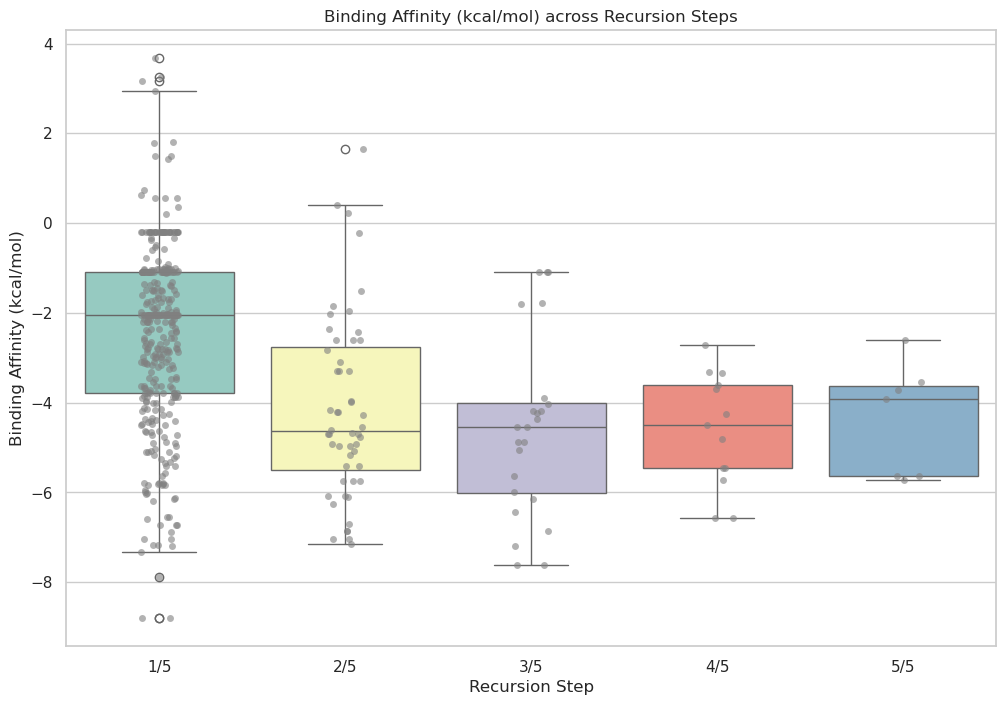

/tmp/ipykernel_1133030/498102362.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', palette="Set2")


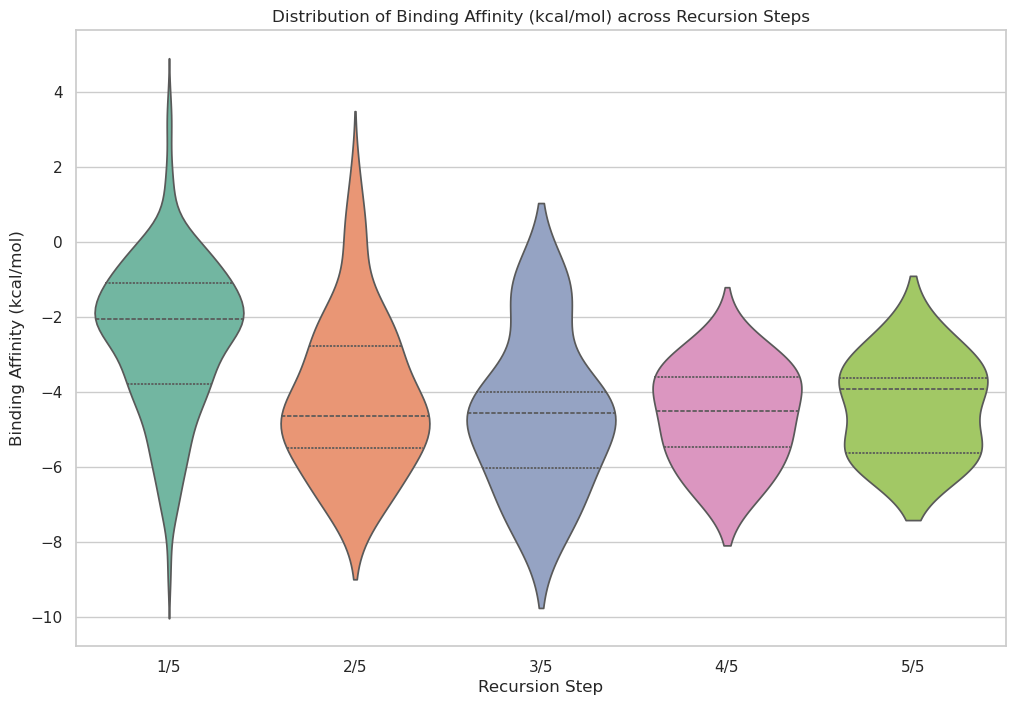

ANOVA for Binding Affinity (kcal/mol): F-value = 11.346381699573014, P-value = 8.57504431496017e-09
Significant differences found. Consider conducting post-hoc tests for pairwise comparisons.
Conducting post-hoc test...
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1/5    2/5  -1.6223    0.0 -2.4243 -0.8202   True
   1/5    3/5   -2.029    0.0 -3.1695 -0.8885   True
   1/5    4/5  -2.0978 0.0018 -3.6255 -0.5702   True
   1/5    5/5  -1.8739 0.0959 -3.9392  0.1915  False
   2/5    3/5  -0.4067   0.92 -1.7425  0.9291  False
   2/5    4/5  -0.4756 0.9375 -2.1541  1.2029  False
   2/5    5/5  -0.2516 0.9978 -2.4309  1.9277  False
   3/5    4/5  -0.0688    1.0 -1.9329  1.7953  False
   3/5    5/5   0.1551 0.9998 -2.1701  2.4804  False
   4/5    5/5    0.224 0.9992 -2.3137  2.7617  False
----------------------------------------------------


/tmp/ipykernel_1133030/498102362.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, palette="Set3")


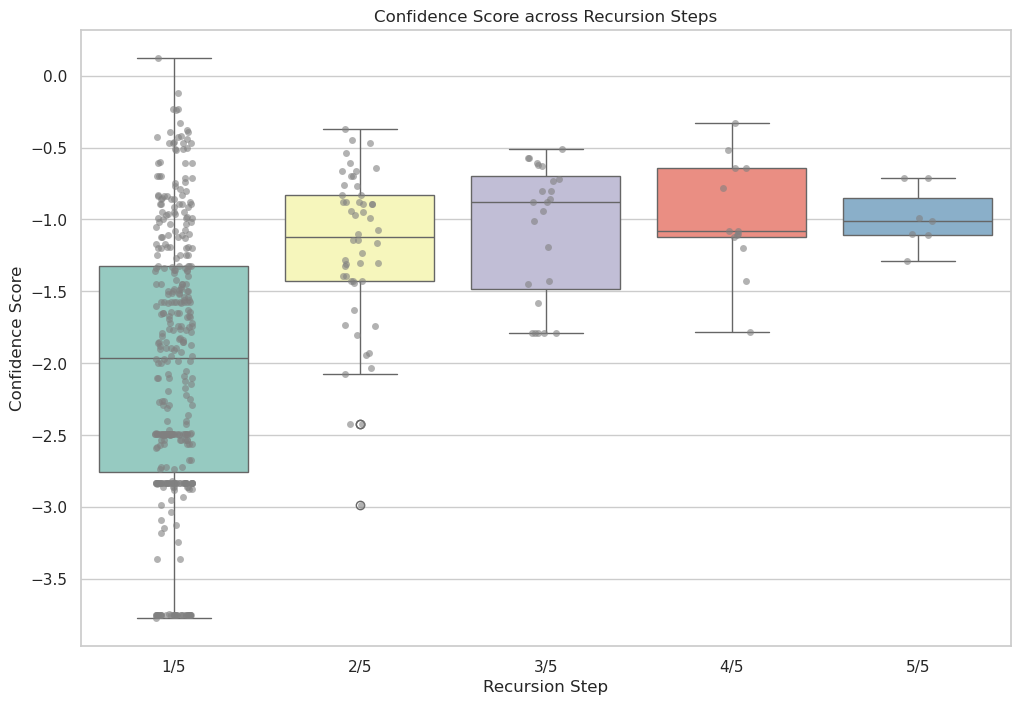

/tmp/ipykernel_1133030/498102362.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', palette="Set2")


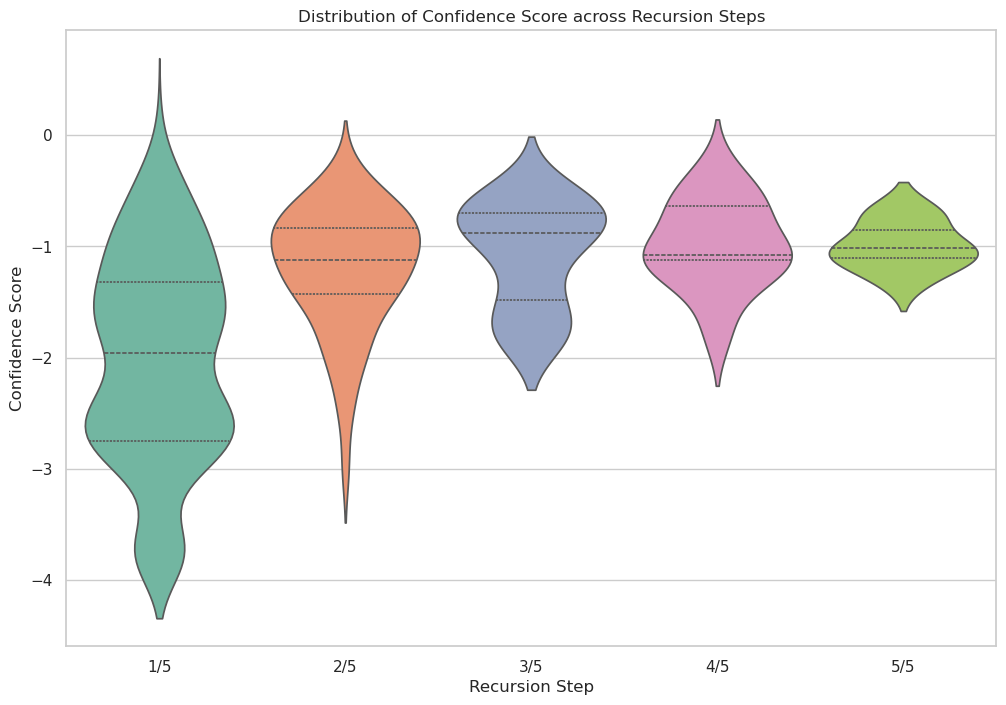

ANOVA for Confidence Score: F-value = 8.905238736484316, P-value = 6.188534397855208e-07
Significant differences found. Consider conducting post-hoc tests for pairwise comparisons.
Conducting post-hoc test...
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1/5    2/5   0.8075    0.0  0.4564 1.1587   True
   1/5    3/5   0.9412    0.0  0.4417 1.4407   True
   1/5    4/5   1.0279 0.0003  0.3588 1.6971   True
   1/5    5/5   1.0247 0.0174    0.12 1.9295   True
   2/5    3/5   0.1337 0.9709 -0.4516 0.7189  False
   2/5    4/5   0.2204 0.9242  -0.515 0.9558  False
   2/5    5/5   0.2172 0.9714 -0.7376  1.172  False
   3/5    4/5   0.0867 0.9984   -0.73 0.9034  False
   3/5    5/5   0.0835 0.9994 -0.9352 1.1023  False
   4/5    5/5  -0.0032    1.0  -1.115 1.1086  False
---------------------------------------------------


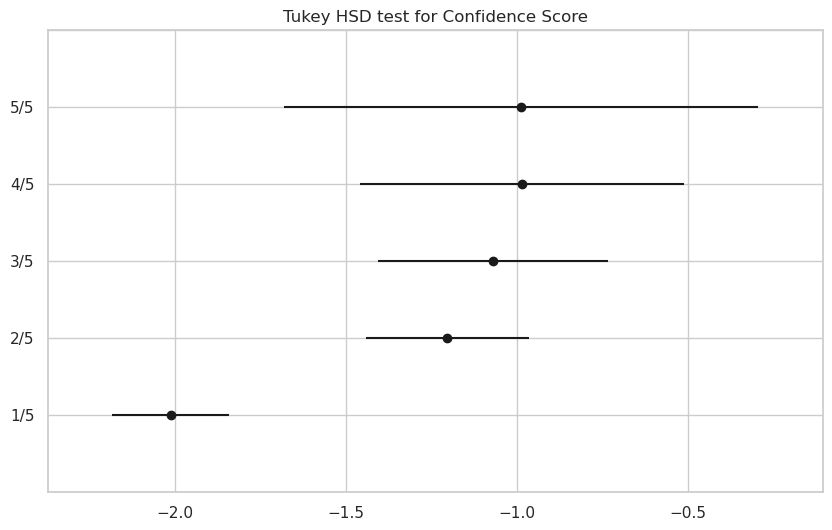

/tmp/ipykernel_1133030/498102362.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, palette="Set3")


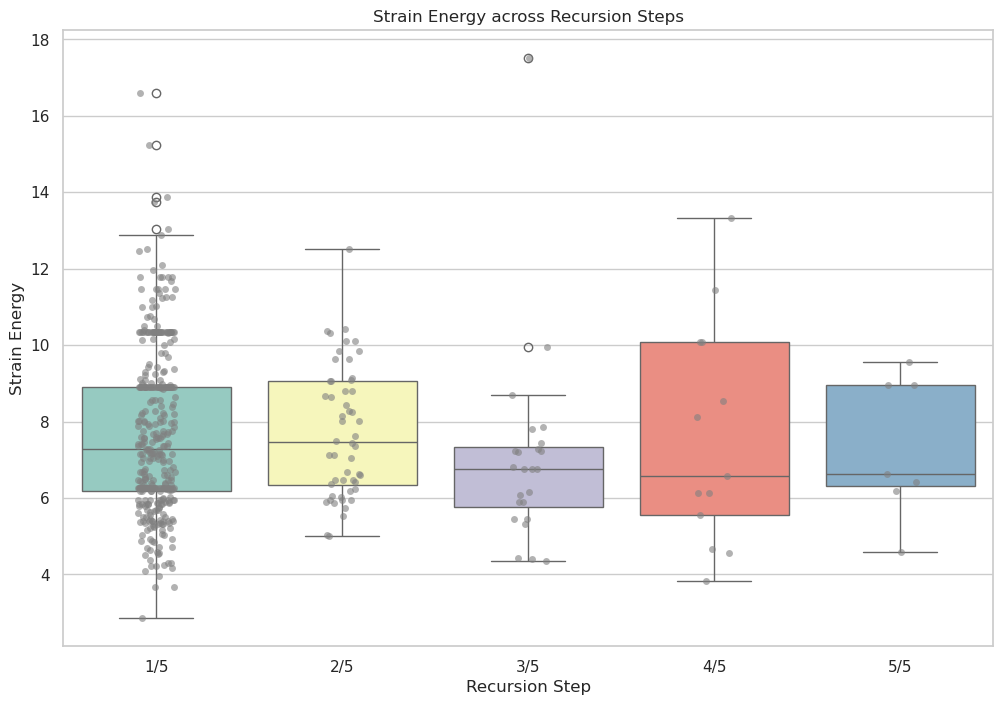

/tmp/ipykernel_1133030/498102362.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', palette="Set2")


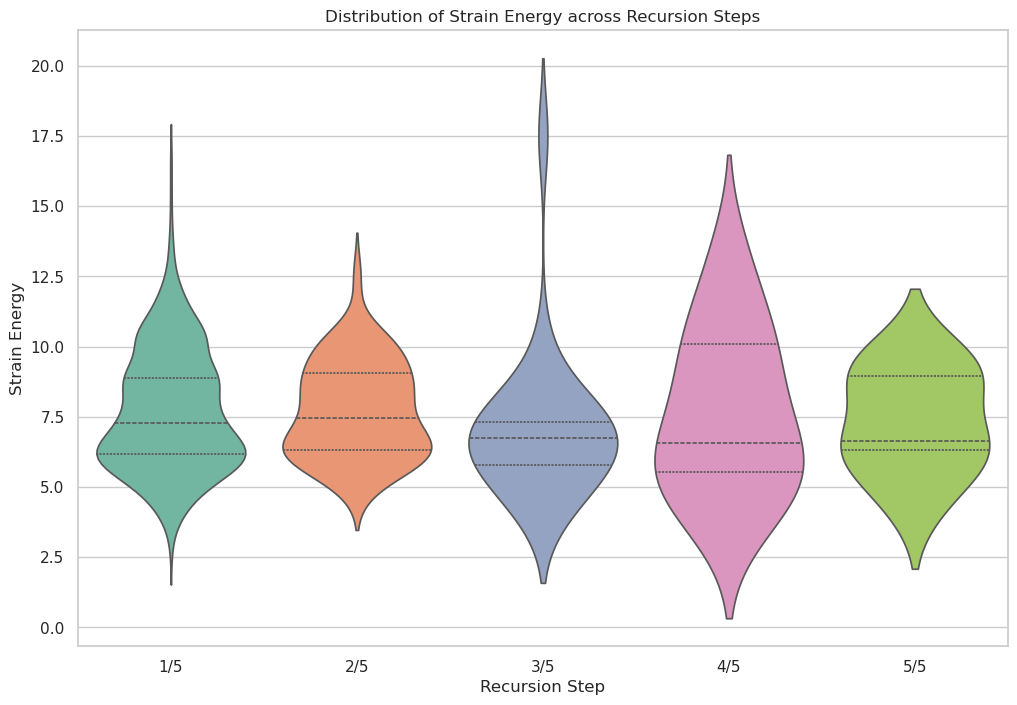

ANOVA for Strain Energy: F-value = 0.6086869100813358, P-value = 0.6565625030309747
No significant differences found across Recursion Steps.


/tmp/ipykernel_1133030/498102362.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, palette="Set3")


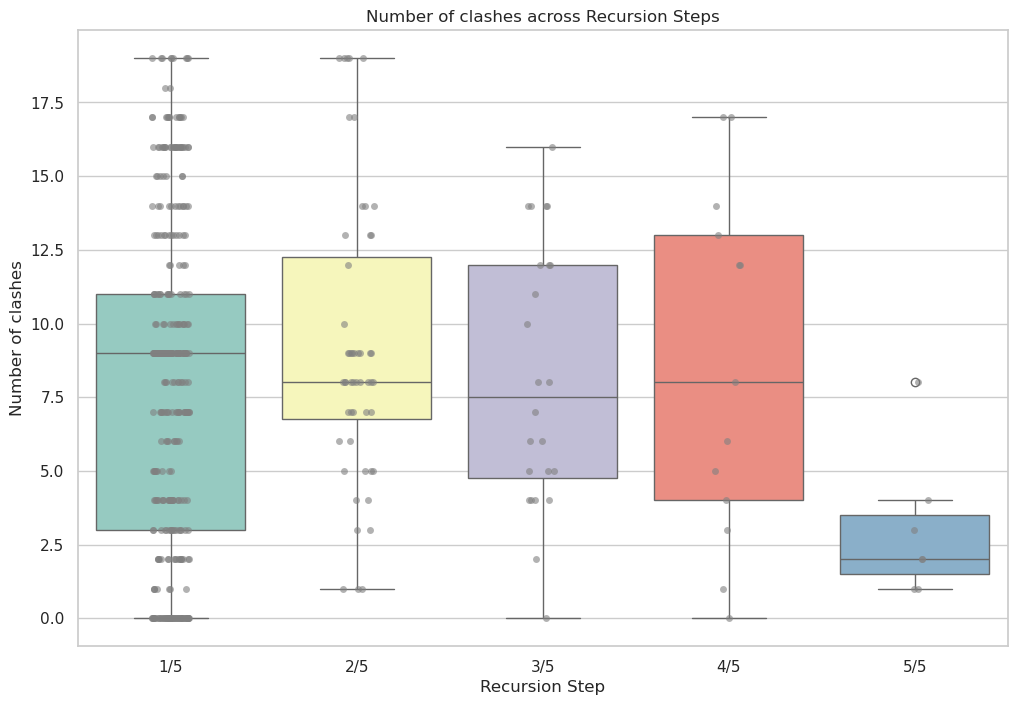

/tmp/ipykernel_1133030/498102362.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', palette="Set2")


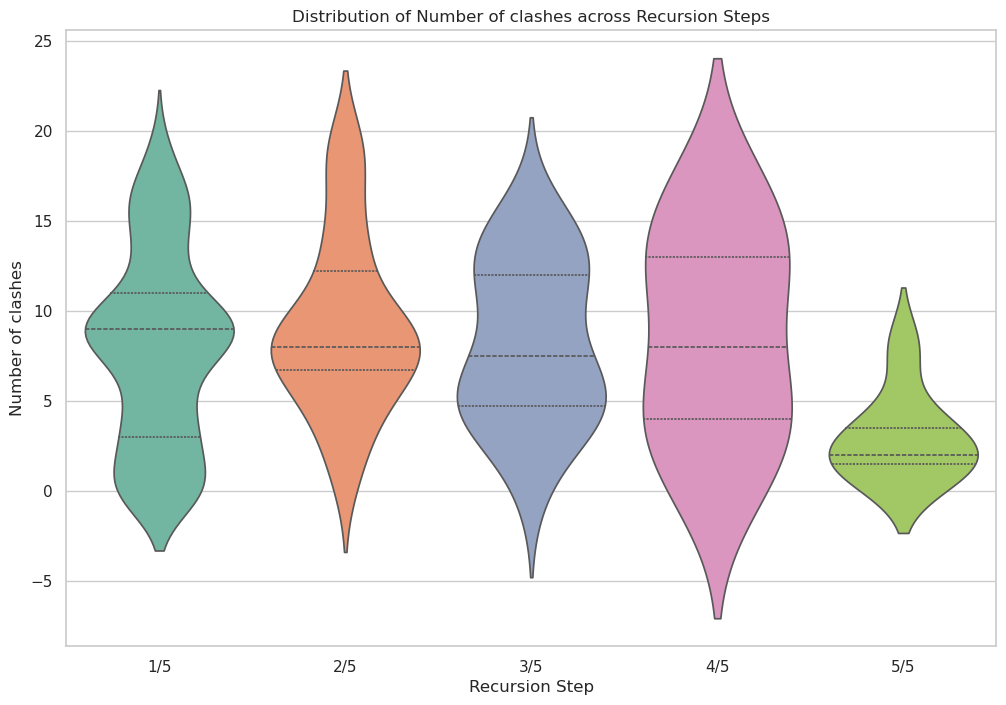

ANOVA for Number of clashes: F-value = 2.2872291938093534, P-value = 0.05914615257112364
No significant differences found across Recursion Steps.


In [21]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Assuming 'all_data' is your DataFrame and it includes 'Recursion Step' and the metric of interest

def tukey_hsd_posthoc_test(data, column_name):
    # Perform the Tukey HSD test
    tukey_result = pairwise_tukeyhsd(endog=data[column_name], 
                                     groups=data['Recursion Step'], 
                                     alpha=0.05)  # alpha is the significance level
    
    # Print the summary of the test results
    print(tukey_result)
    
    # Plot the results
    tukey_result.plot_simultaneous()
    plt.title(f'Tukey HSD test for {column_name}')
    plt.show()
    
# Load your dataset
# Ensure 'all_data' DataFrame is prepared with 'Recursion Step' and the metrics columns

# Define a function to annotate statistical significance on plots
def annotate_significance(ax, x1, x2, max_y, text):
    y = max_y + max_y * 0.02  # Slightly above the highest data point
    ax.plot([x1, x1, x2, x2], [y, y+1, y+1, y], lw=1.5, c='black')
    ax.text((x1+x2)*.5, y+1, text, ha='center', va='bottom', color='black')

# Function to visualize and statistically compare groups
def visualize_and_compare(data, column_name):
    cleaned_data = remove_outliers(data, column_name)
    # First, visualize with boxplot
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, palette="Set3")
    sns.stripplot(x='Recursion Step', y=column_name, data=cleaned_data, color='grey', alpha=0.6, jitter=True)
    plt.title(f'{column_name} across Recursion Steps')
    plt.show()
    
    # Then, visualize with violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', palette="Set2")
    plt.title(f'Distribution of {column_name} across Recursion Steps')
    plt.show()
    
    # Perform ANOVA or Kruskal-Wallis test
    groups = [group[column_name].dropna() for name, group in data.groupby('Recursion Step')]
    if all(group.size > 1 for group in groups):  # Ensure all groups have more than one observation
        f_val, p_val = stats.f_oneway(*groups)
        print(f"ANOVA for {column_name}: F-value = {f_val}, P-value = {p_val}")
        
        if p_val < 0.05:
            print("Significant differences found. Consider conducting post-hoc tests for pairwise comparisons.")
            print("Conducting post-hoc test...")
            tukey_hsd_posthoc_test(cleaned_data, column_name)
        else:
            print("No significant differences found across Recursion Steps.")
    else:
        print("Not all groups have sufficient data for ANOVA.")



column_to_analyze = [
    'Binding Affinity (kcal/mol)', 
    'Confidence Score', 
    'Strain Energy', 
    'Number of clashes'
]

for column in column_to_analyze:
    visualize_and_compare(all_data, column)

# Note: This is a basic implementation. For post-hoc tests, consider using Tukey's HSD or pairwise t-tests with Bonferroni correction.


## PCA

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'all_data' is your DataFrame

# Outlier removal function
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.1)
    Q3 = df[column_name].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# List of features to include in PCA
features = ['Binding Affinity (kcal/mol)', 'Confidence Score', 'Strain Energy', 'Number of clashes']

# Apply outlier removal for each feature
cleaned_data = pd.DataFrame()
for feature in features:
    if cleaned_data.empty:
        cleaned_data = remove_outliers(all_data, feature)
    else:
        cleaned_data = remove_outliers(cleaned_data, feature)

# Standardizing the features
x = cleaned_data.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Performing PCA
pca = PCA(n_components=2)  # You can adjust n_components based on your needs
principalComponents = pca.fit_transform(x)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Visualizing the PCA results
plt.figure(figsize=(8,6))
plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.grid(True)
plt.show()

# Displaying explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [0.43427084 0.28433581]


## One-Sample t-Test

In [23]:
from scipy import stats

# One-sample t-test example
def one_sample_t_test(data, column_name, population_mean):
    """
    Test if the mean of the sample in `column_name` is equal to `population_mean`.
    """
    t_stat, p_val = stats.ttest_1samp(data[column_name].dropna(), population_mean)
    print(f"One-sample t-test for {column_name}:")
    print(f"T-statistic: {t_stat}, P-value: {p_val}")

features = ['Binding Affinity (kcal/mol)', 'Confidence Score', 'Strain Energy', 'Number of clashes']


for feat in features:
    one_sample_t_test(all_data, feat, 0)



One-sample t-test for Binding Affinity (kcal/mol):
T-statistic: -20.683626453390705, P-value: 5.55644315788778e-68
One-sample t-test for Confidence Score:
T-statistic: -30.45900532420999, P-value: 4.0483493869455866e-113
One-sample t-test for Strain Energy:
T-statistic: 76.7452160448503, P-value: 2.7950411743849715e-267
One-sample t-test for Number of clashes:
T-statistic: 32.816510903122655, P-value: 1.8960483400718147e-123


## ANOVA Test

In [24]:
def anova_test(data, column_name):
    """
    Test if at least one group mean of `column_name` is different from the others.
    """
    group_data = [group.dropna() for name, group in data.groupby('Recursion Step')[column_name]]
    f_stat, p_val = stats.f_oneway(*group_data)
    print(f"ANOVA for {column_name}:")
    print(f"F-statistic: {f_stat}, P-value: {p_val}")


for feat in features:
    # Example usage for 'Binding Affinity (kcal/mol)' across recursion steps
    anova_test(all_data, feat)


ANOVA for Binding Affinity (kcal/mol):
F-statistic: 11.346381699573014, P-value: 8.57504431496017e-09
ANOVA for Confidence Score:
F-statistic: 8.905238736484316, P-value: 6.188534397855208e-07
ANOVA for Strain Energy:
F-statistic: 0.6086869100813358, P-value: 0.6565625030309747
ANOVA for Number of clashes:
F-statistic: 2.2872291938093534, P-value: 0.05914615257112364
